In [2]:
!7z x facebook.tar.gz
!7z x facebook_combined.txt.gz
!7z x facebook.tar


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 732104 bytes (715 KiB)

Extracting archive: facebook.tar.gz
--
Path = facebook.tar.gz
Type = gzip
Headers Size = 10

  0% - facebook.tar                   Everything is Ok

Size:       4853760
Compressed: 732104

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 218576 bytes (214 KiB)

Extracting archive: facebook_combined.txt.gz
--
Path = facebook_combined.txt.gz
Type = gzip
Headers Size = 32

  0% - facebook_combined.txt         

In [4]:
!pip install ndlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.2/110.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 44.4 MB/s eta 0:00:00


In [5]:
import networkx as nx
import ndlib.models.epidemics as ep
import ndlib.models.opinions as op

In [7]:
graph = nx.erdos_renyi_graph(1234, 0.1234)

In [117]:
def create_models(model_type):
  models = []
  if model_type == 'ep':
    models.append(ep.SIModel(graph))
    models.append(ep.SISModel(graph))
    models.append(ep.SEISModel(graph))
    models.append(ep.SEIRModel(graph))
  else:
    models.append(op.VoterModel(graph))
    models.append(op.QVoterModel(graph))
    models.append(op.MajorityRuleModel(graph))
    models.append(op.SznajdModel(graph))
  return models

# Задача 1

In [125]:
models = create_models('ep')

In [126]:
models

In [134]:
import ndlib.models.ModelConfig as mc

def set_model_initial_status(model, fraction_infected=0.1, percentage_blocked=0.001, q=3):
      config = mc.Configuration()

      # Set model parameters based on model type
      if isinstance(model, ep.SIModel):
          config.add_model_parameter('beta', 0.012)
          config.add_model_parameter('fraction_infected', fraction_infected)

      elif isinstance(model, ep.SISModel):
          config.add_model_parameter('beta', 0.012)
          config.add_model_parameter('lambda', 0.034)
          config.add_model_parameter('fraction_infected', fraction_infected)

      elif isinstance(model, ep.SEISModel):
          config.add_model_parameter('beta', 0.012)
          config.add_model_parameter('lambda', 0.034)
          config.add_model_parameter('alpha', 0.056)
          config.add_model_parameter('fraction_infected', fraction_infected)

      elif isinstance(model, ep.SEIRModel):
          config.add_model_parameter('beta', 0.012)
          config.add_model_parameter('gamma', 0.034)
          config.add_model_parameter('alpha', 0.056)
          config.add_model_parameter('fraction_infected', fraction_infected)

      if isinstance(model, (op.VoterModel, op.SznajdModel)):
            config.add_model_parameter('percentage_blocked', percentage_blocked)
            config.add_model_parameter('fraction_infected', fraction_infected)

      elif isinstance(model, (op.QVoterModel, op.MajorityRuleModel)):
            config.add_model_parameter('q', q)
            config.add_model_parameter('fraction_infected', fraction_infected)

      # Apply configuration to the model
      model.set_initial_status(config)



In [129]:
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend

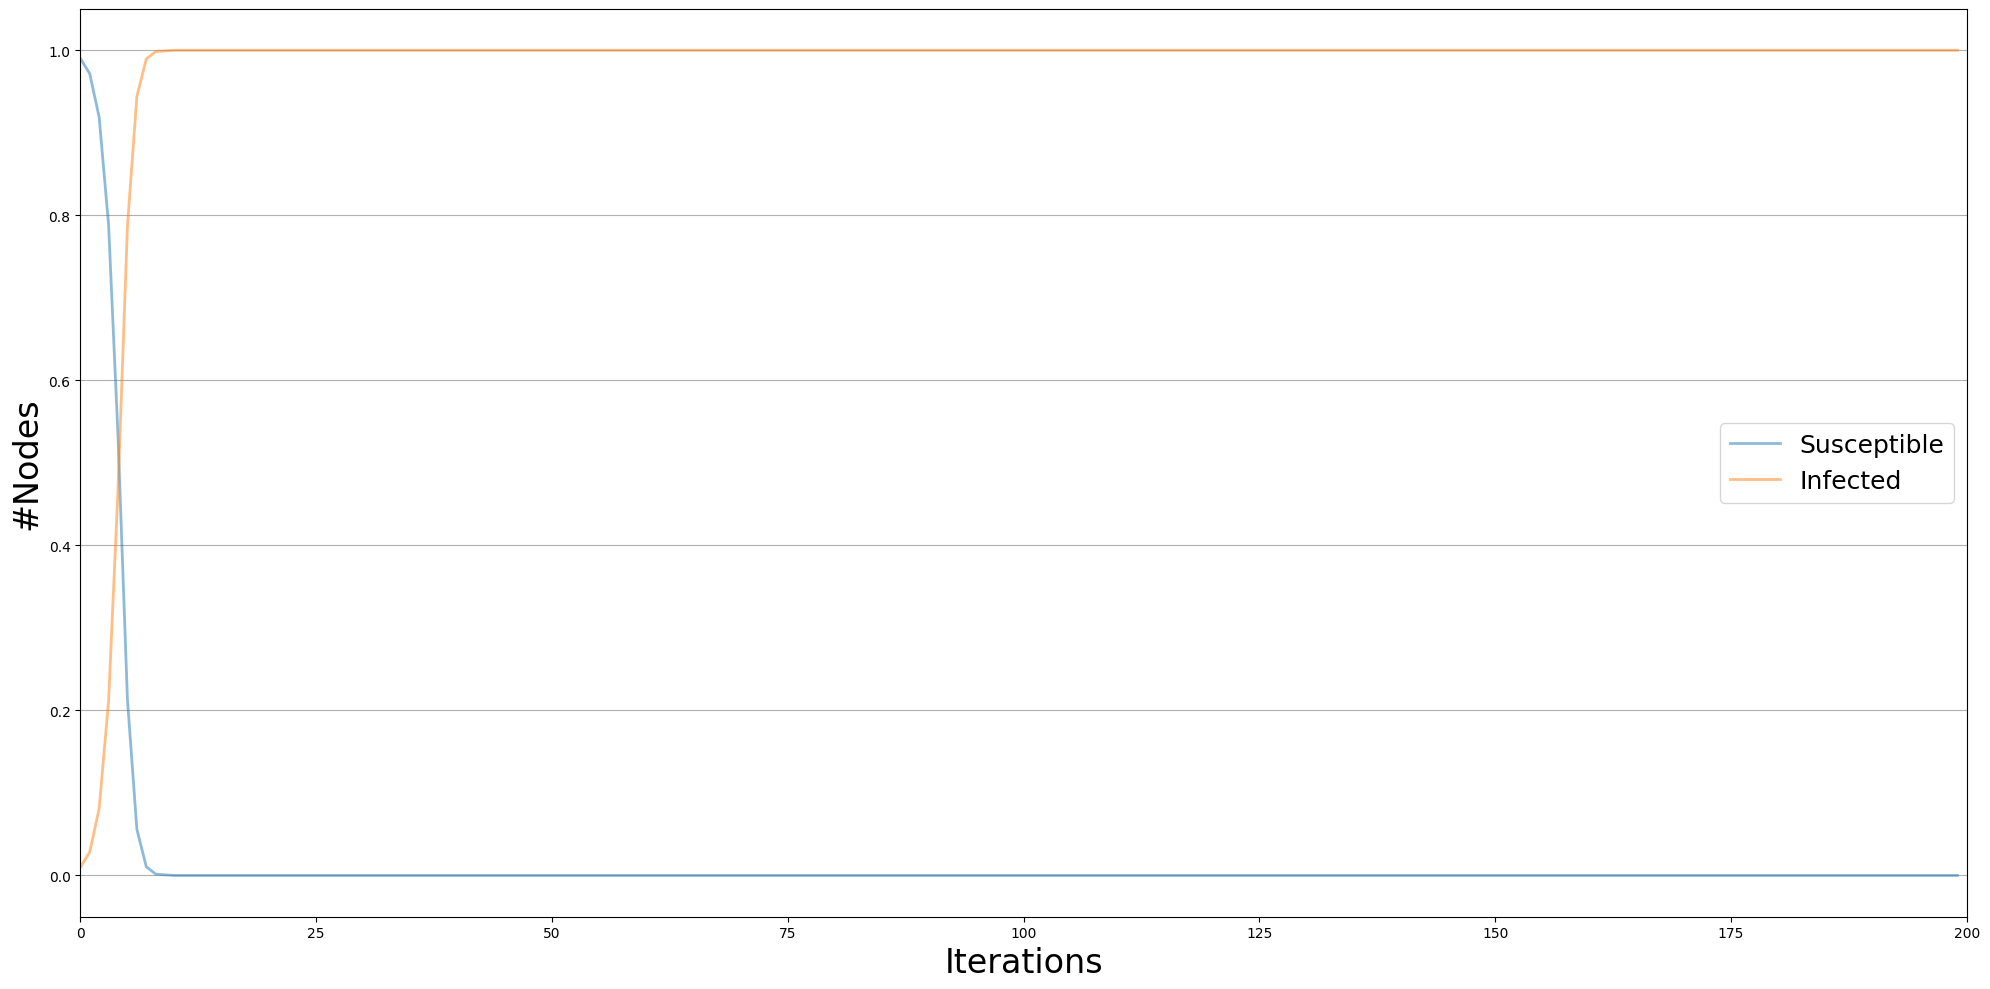

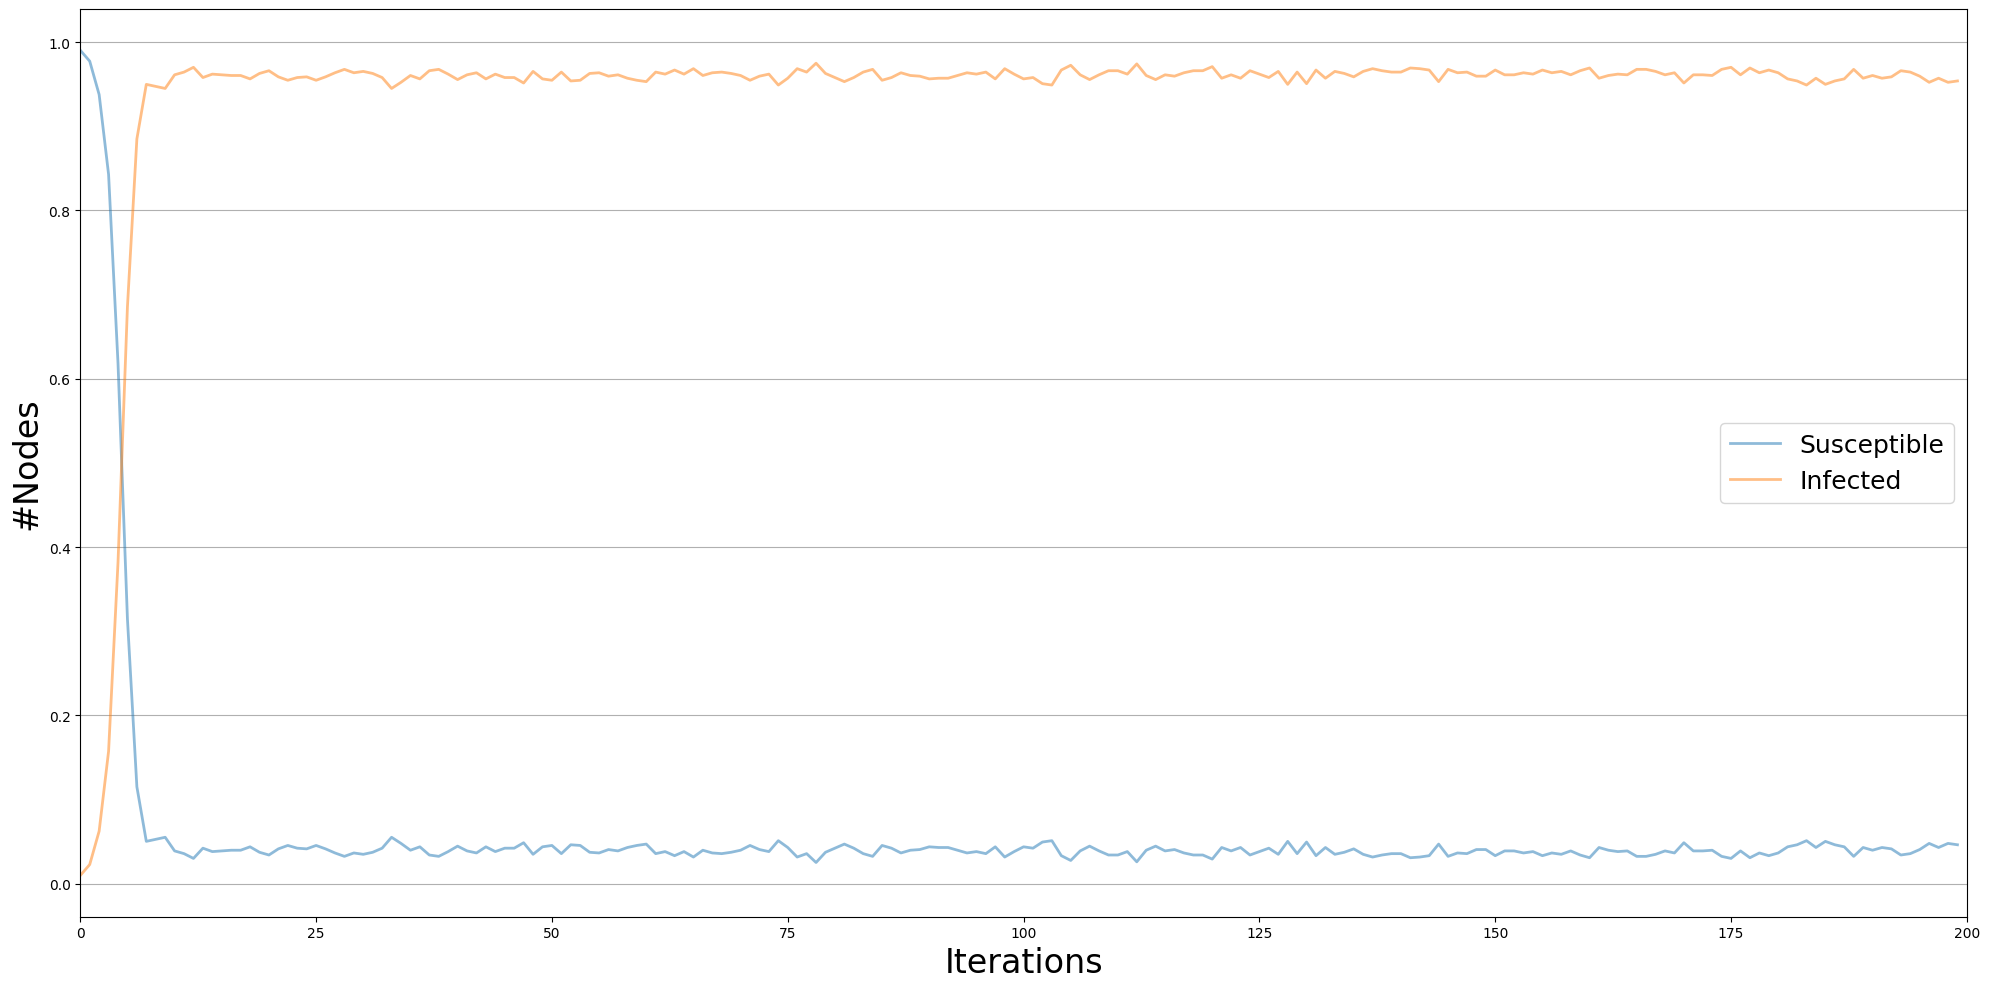

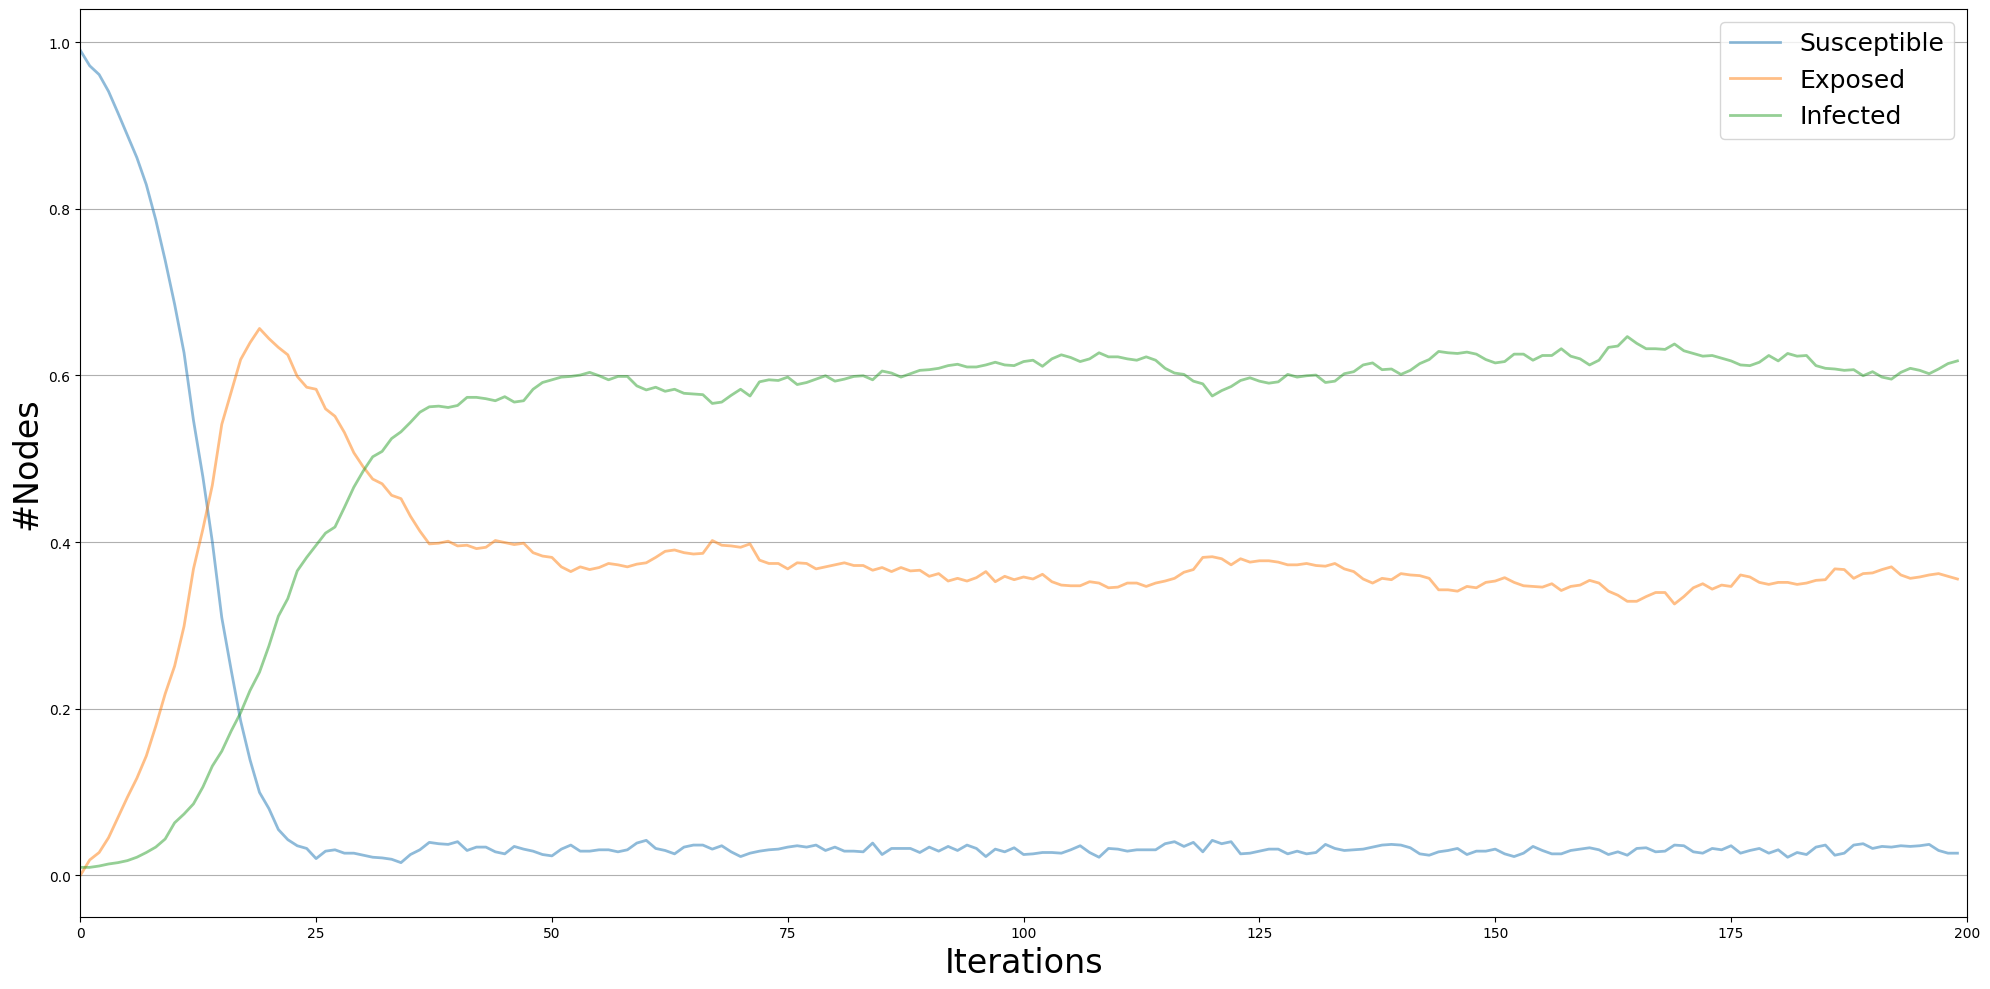

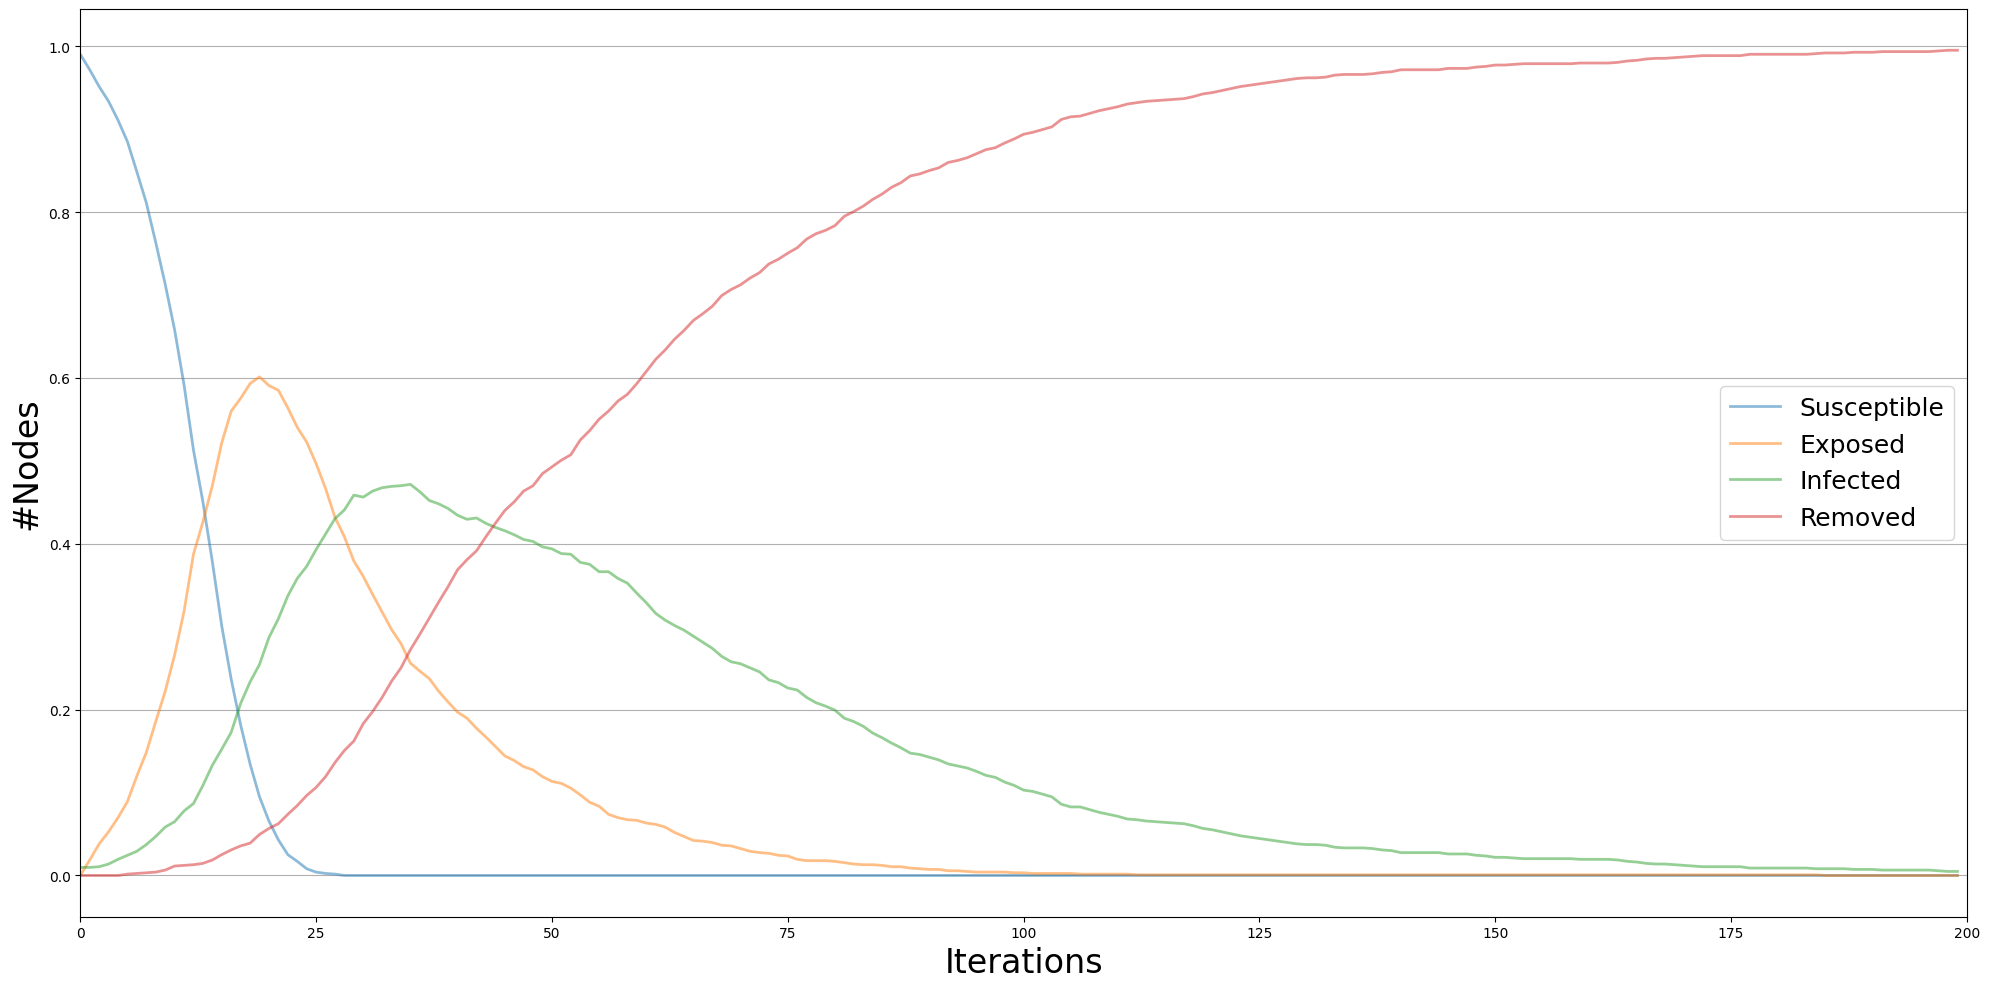

In [128]:
for model in models:
  set_model_initial_status(model, 0.01)

  iterations = model.iteration_bunch(200)
  trends = model.build_trends(iterations)

  viz = DiffusionTrend(model, trends)
  p = viz.plot()

In [130]:
models = create_models('ep')

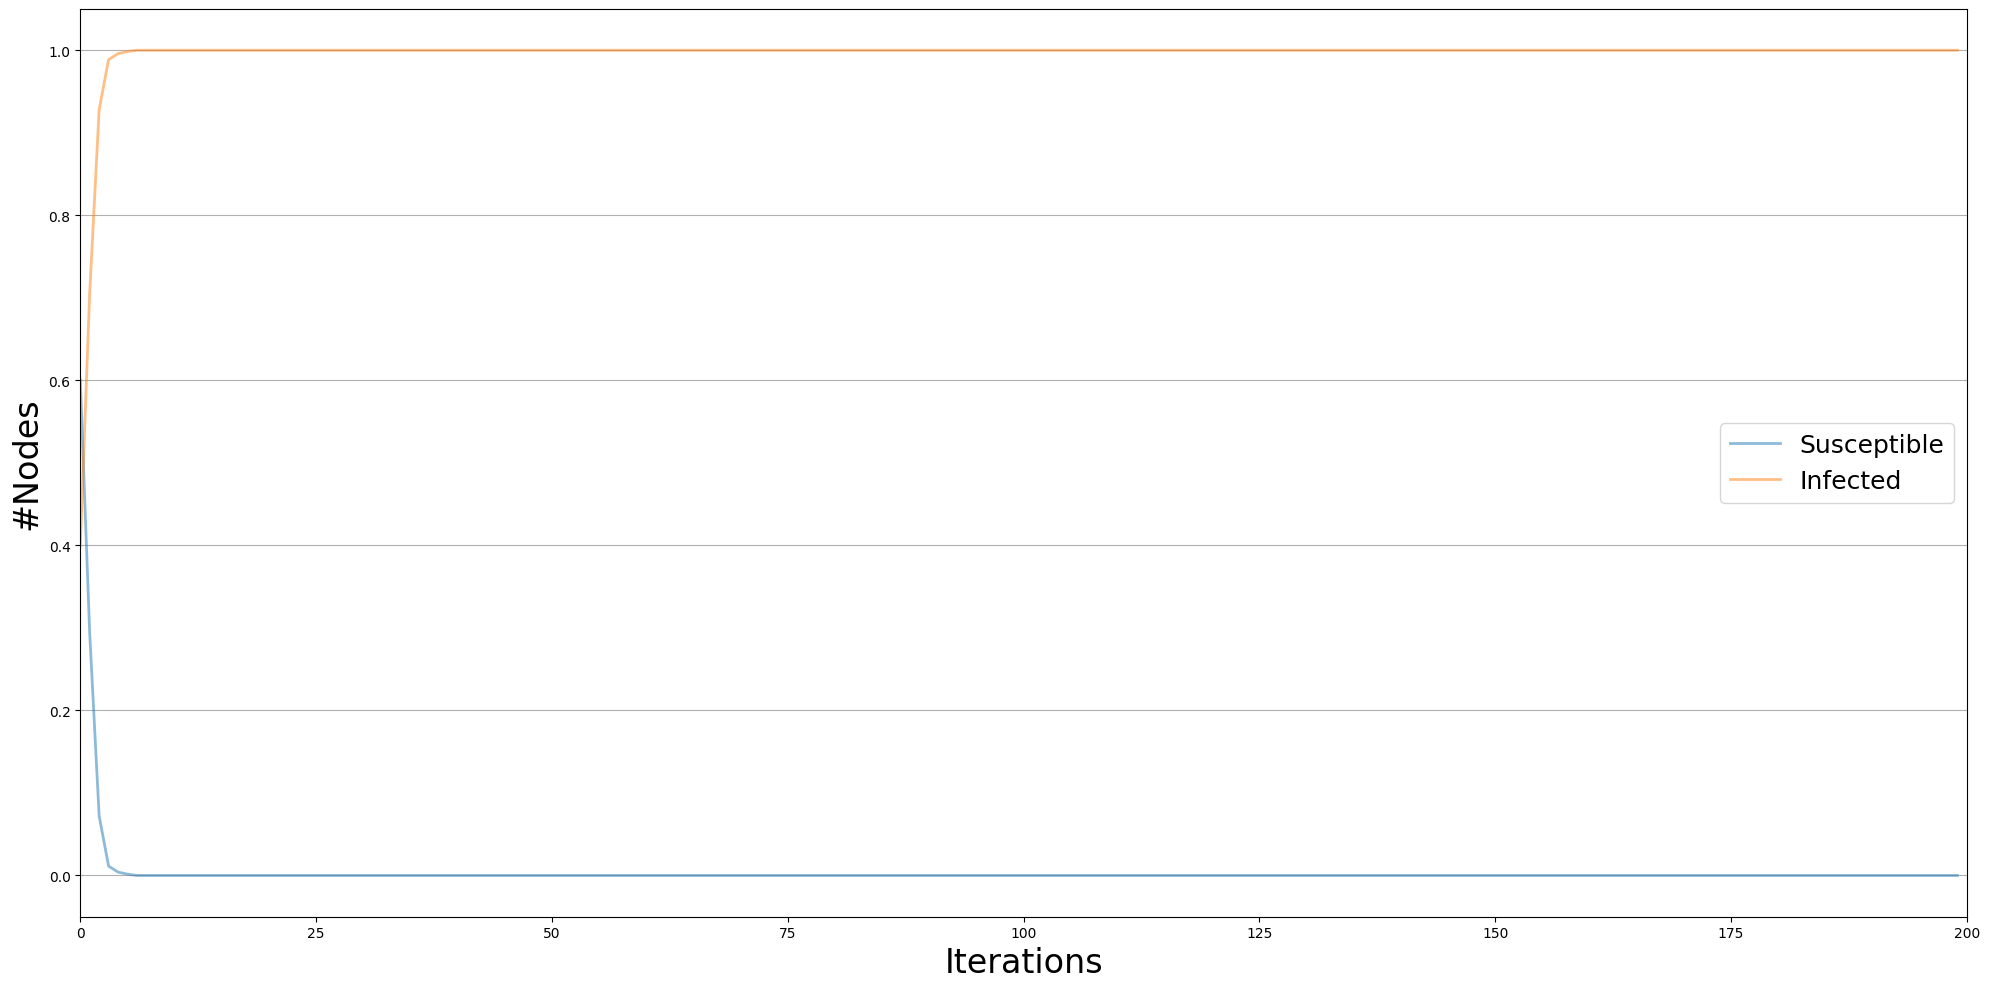

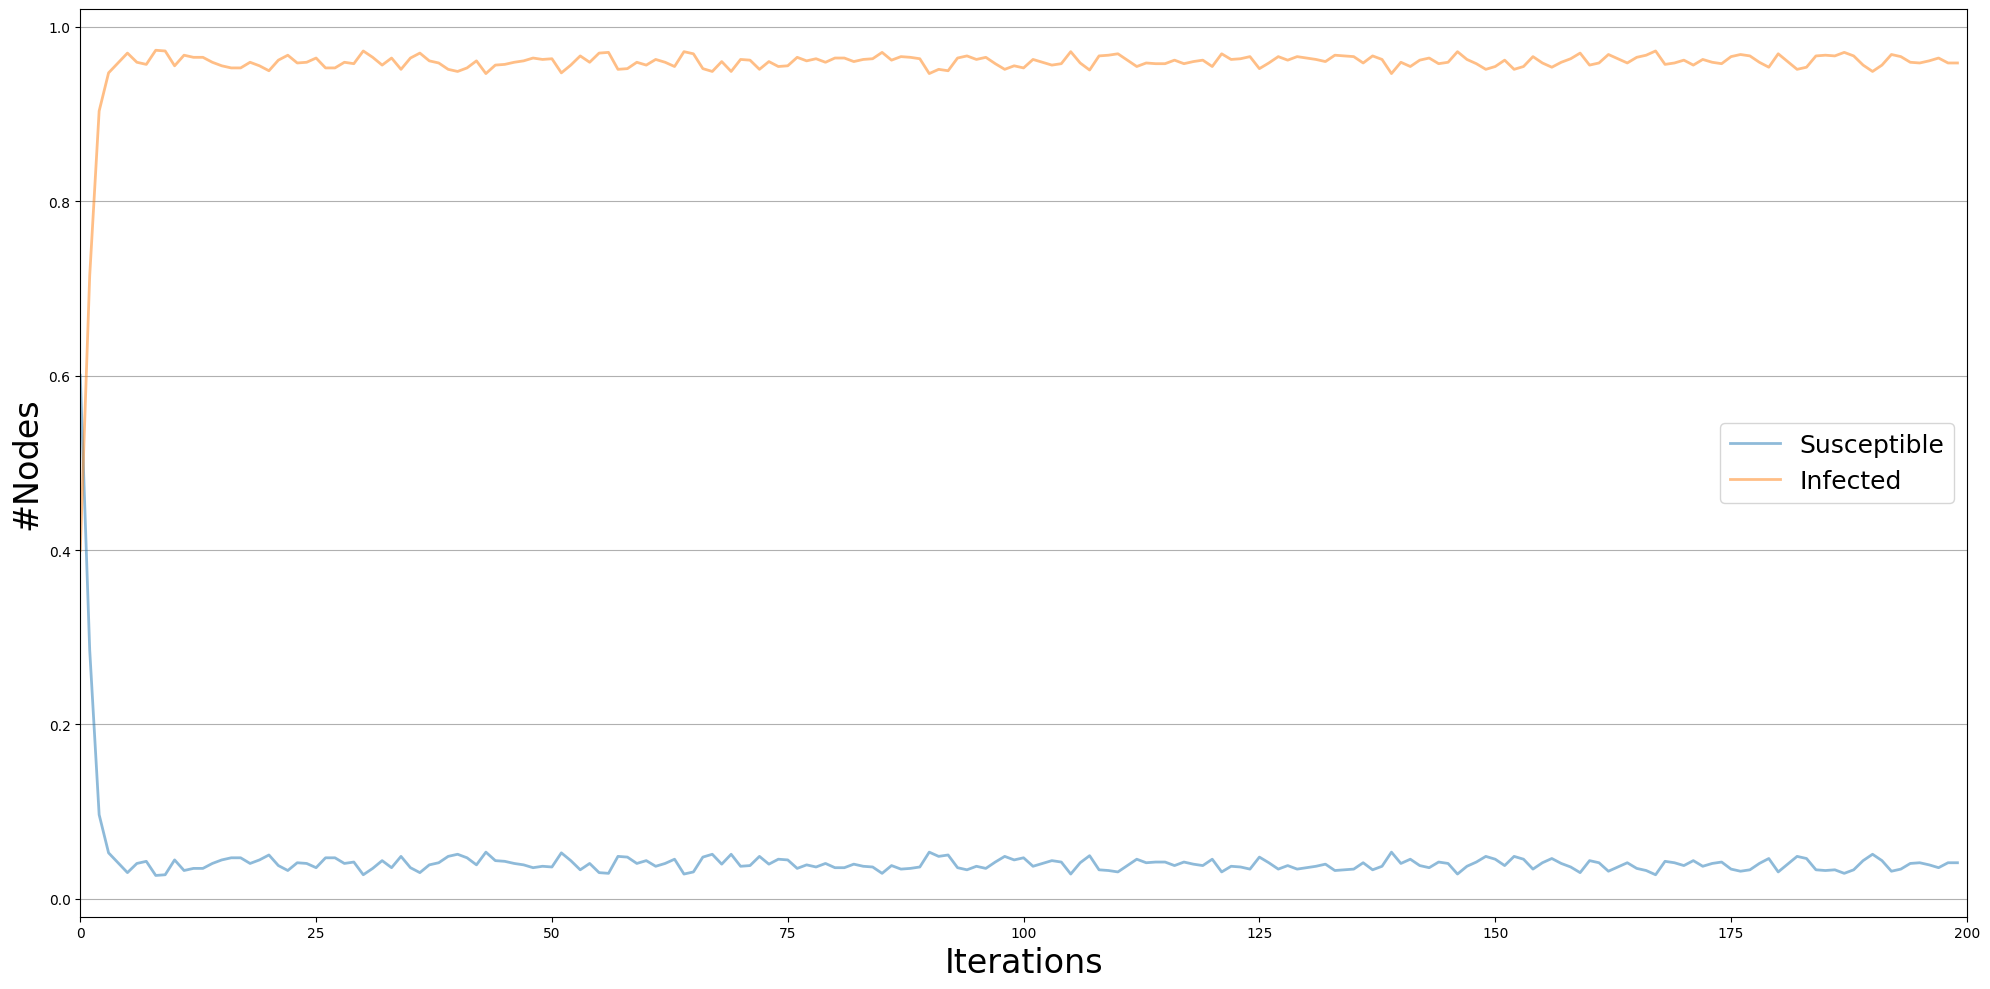

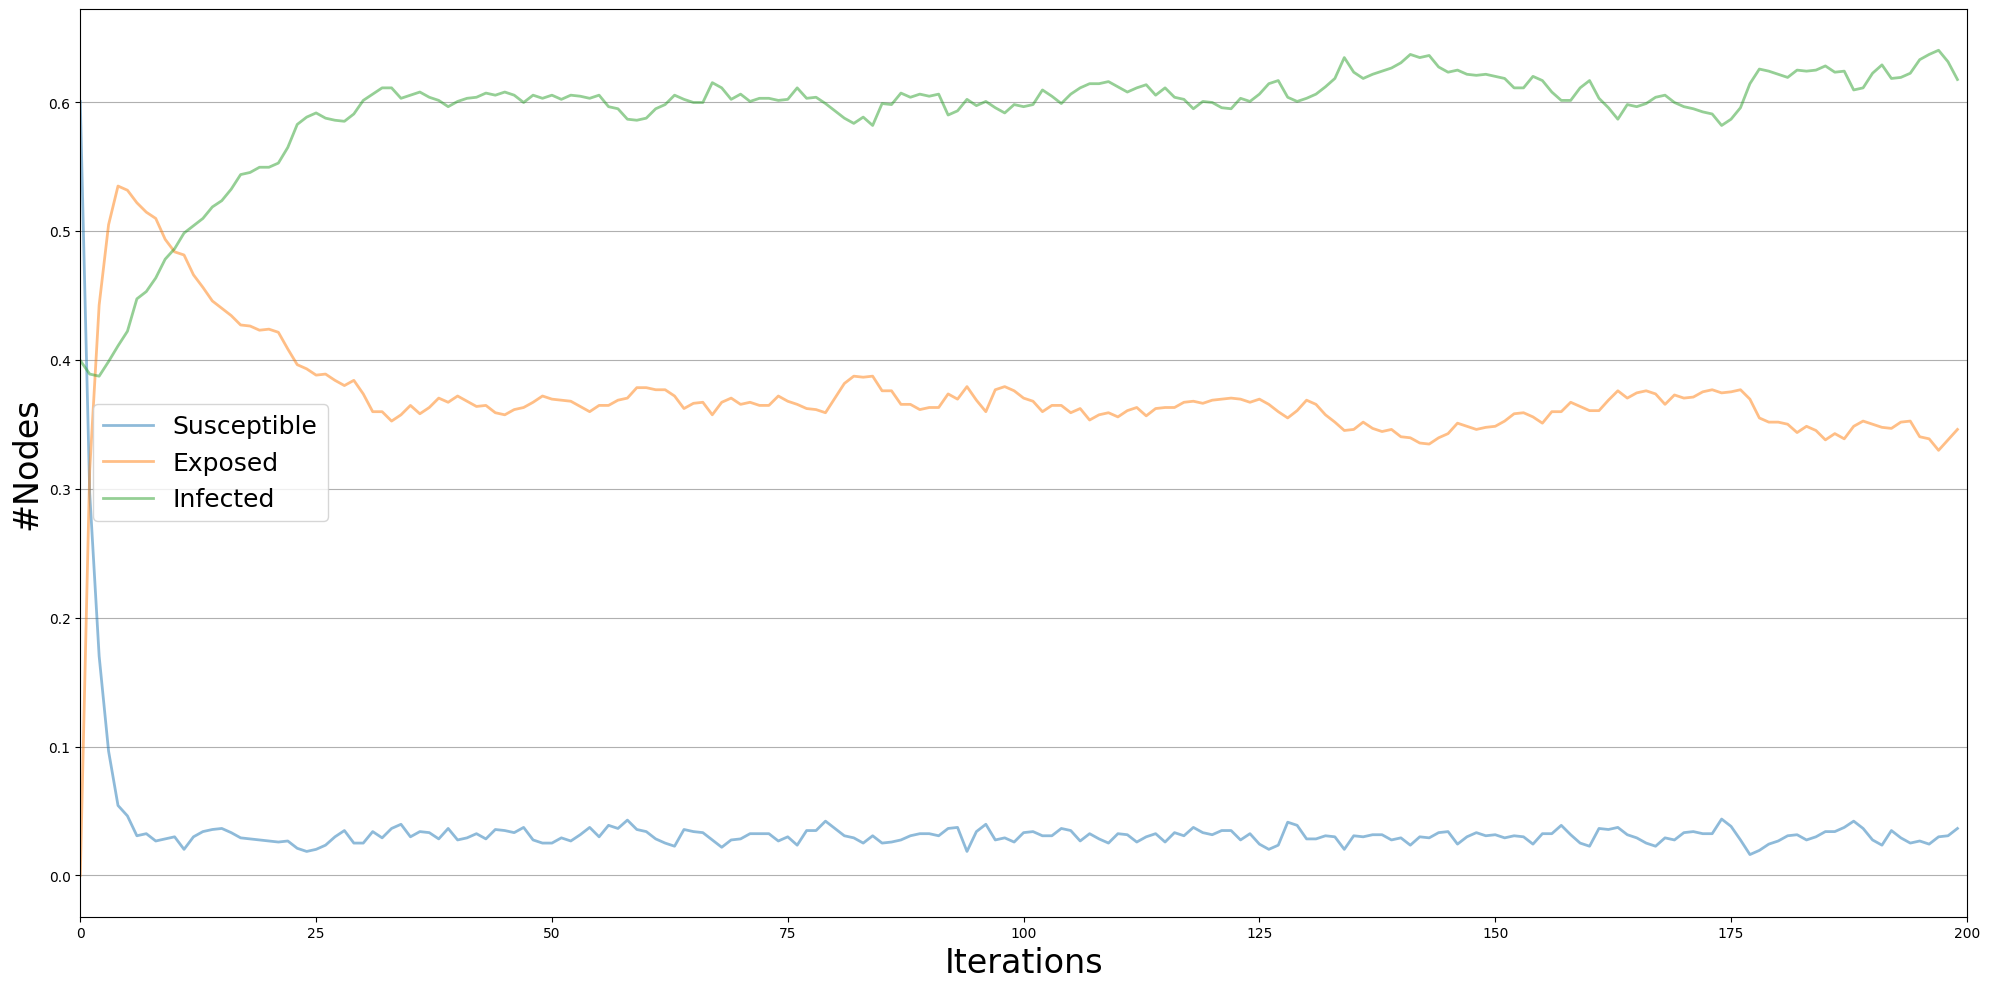

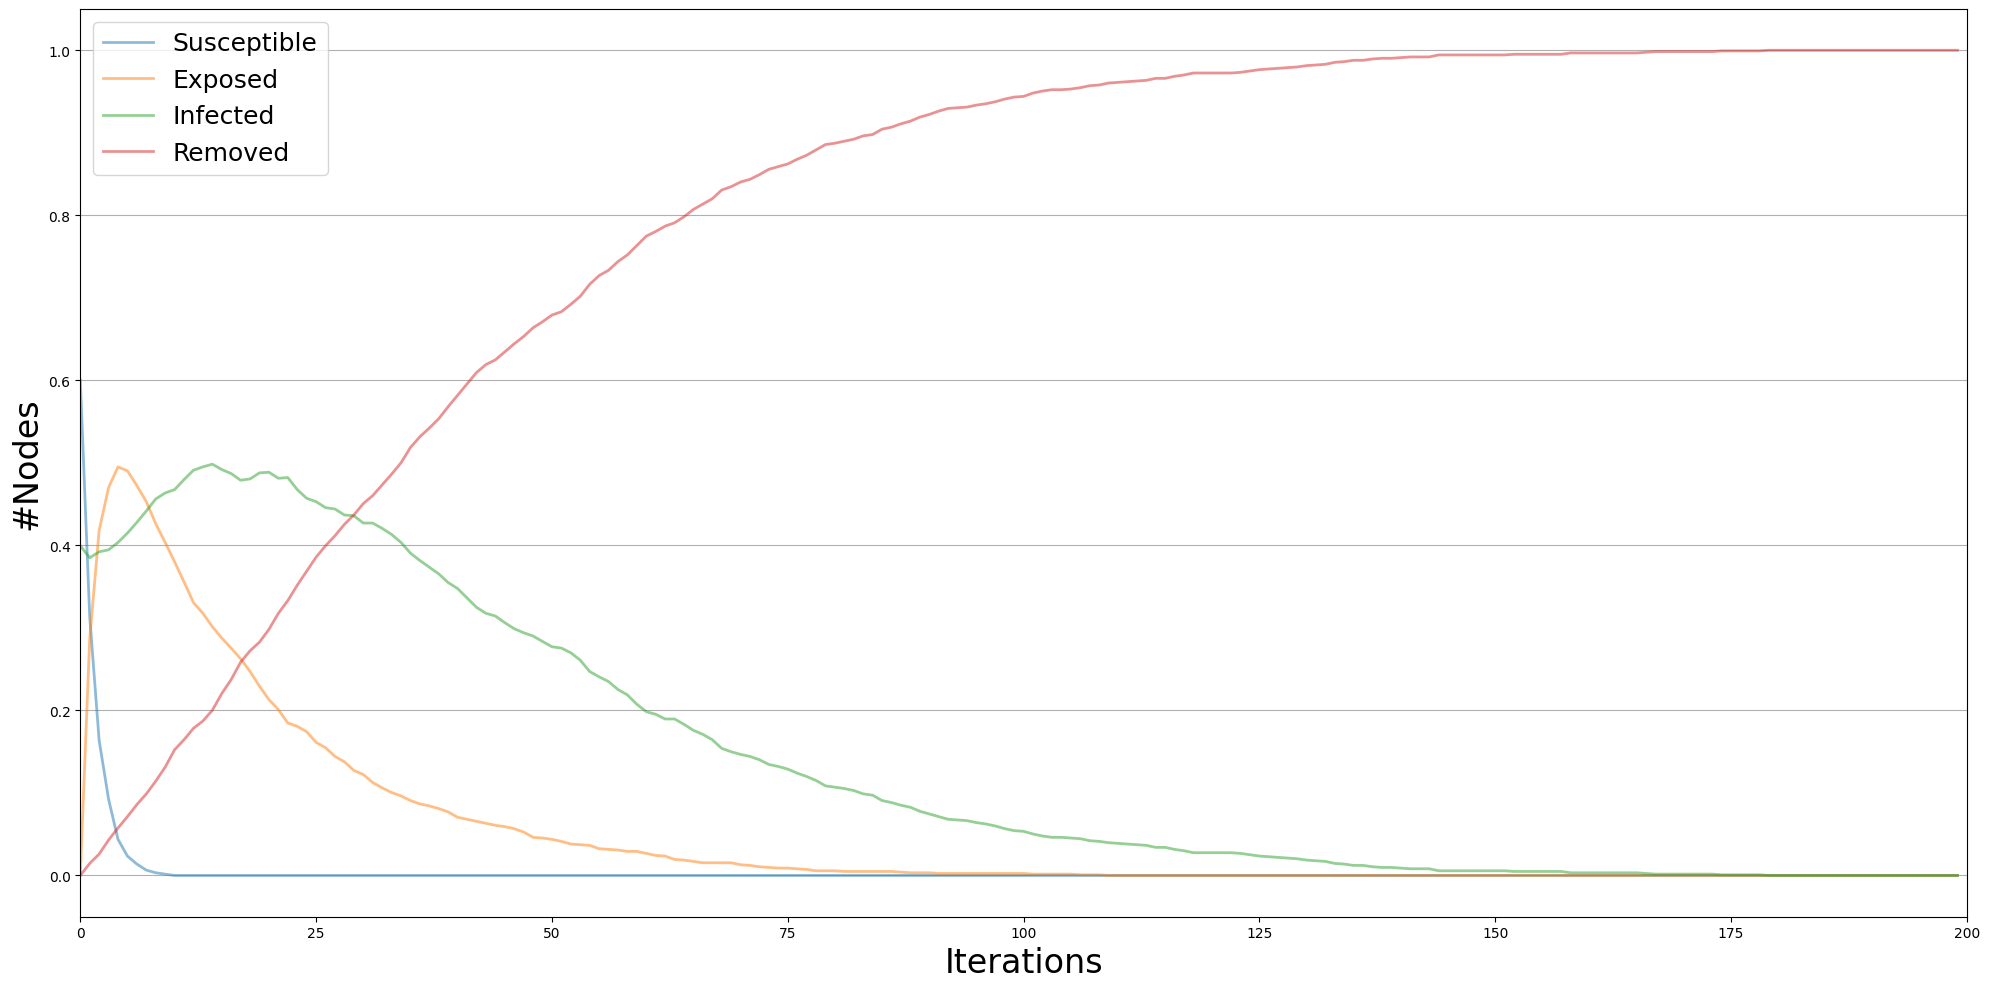

In [131]:
for model in models:
  set_model_initial_status(model, 0.4)

  iterations = model.iteration_bunch(200)
  trends = model.build_trends(iterations)

  viz = DiffusionTrend(model, trends)
  p = viz.plot()

Не сите модели постигнуваат целосен еквилибриум, но со сите се добива барем скоро целосен еквилибриум

# Задача 2

In [132]:
models = create_models('op')

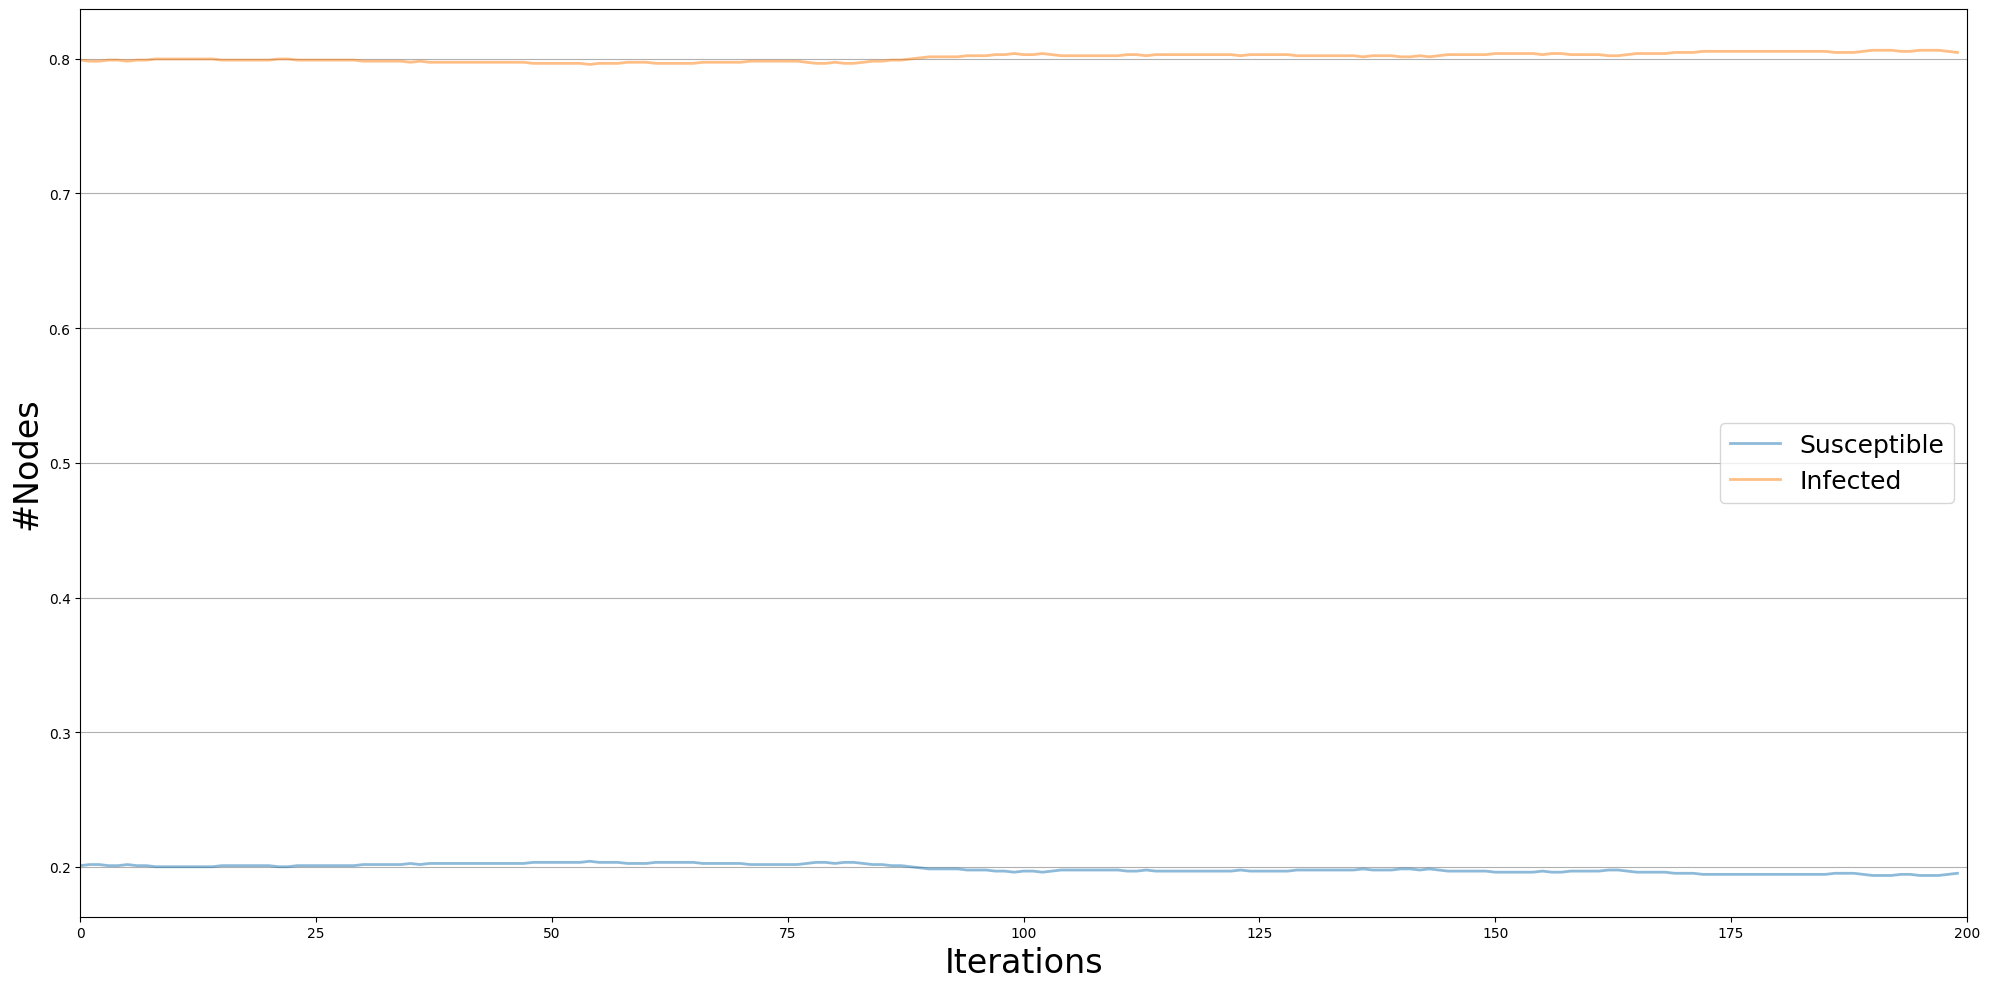

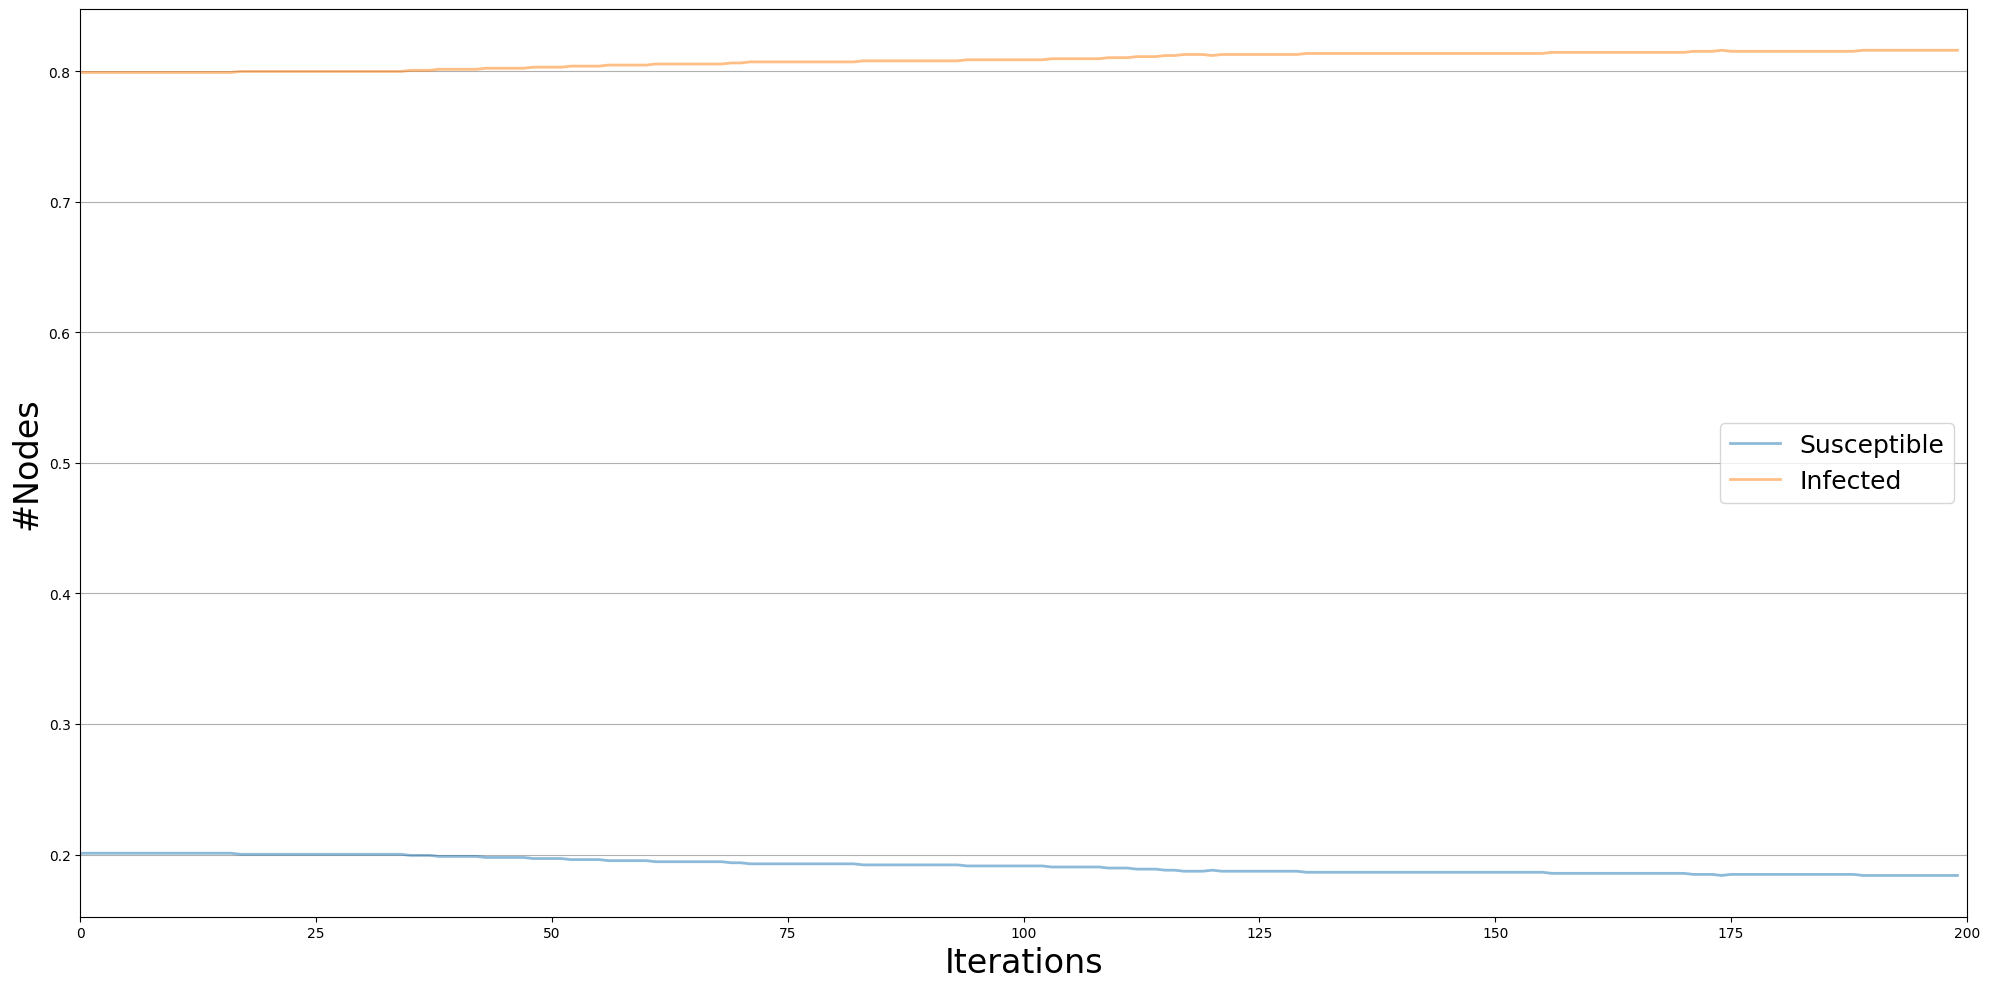

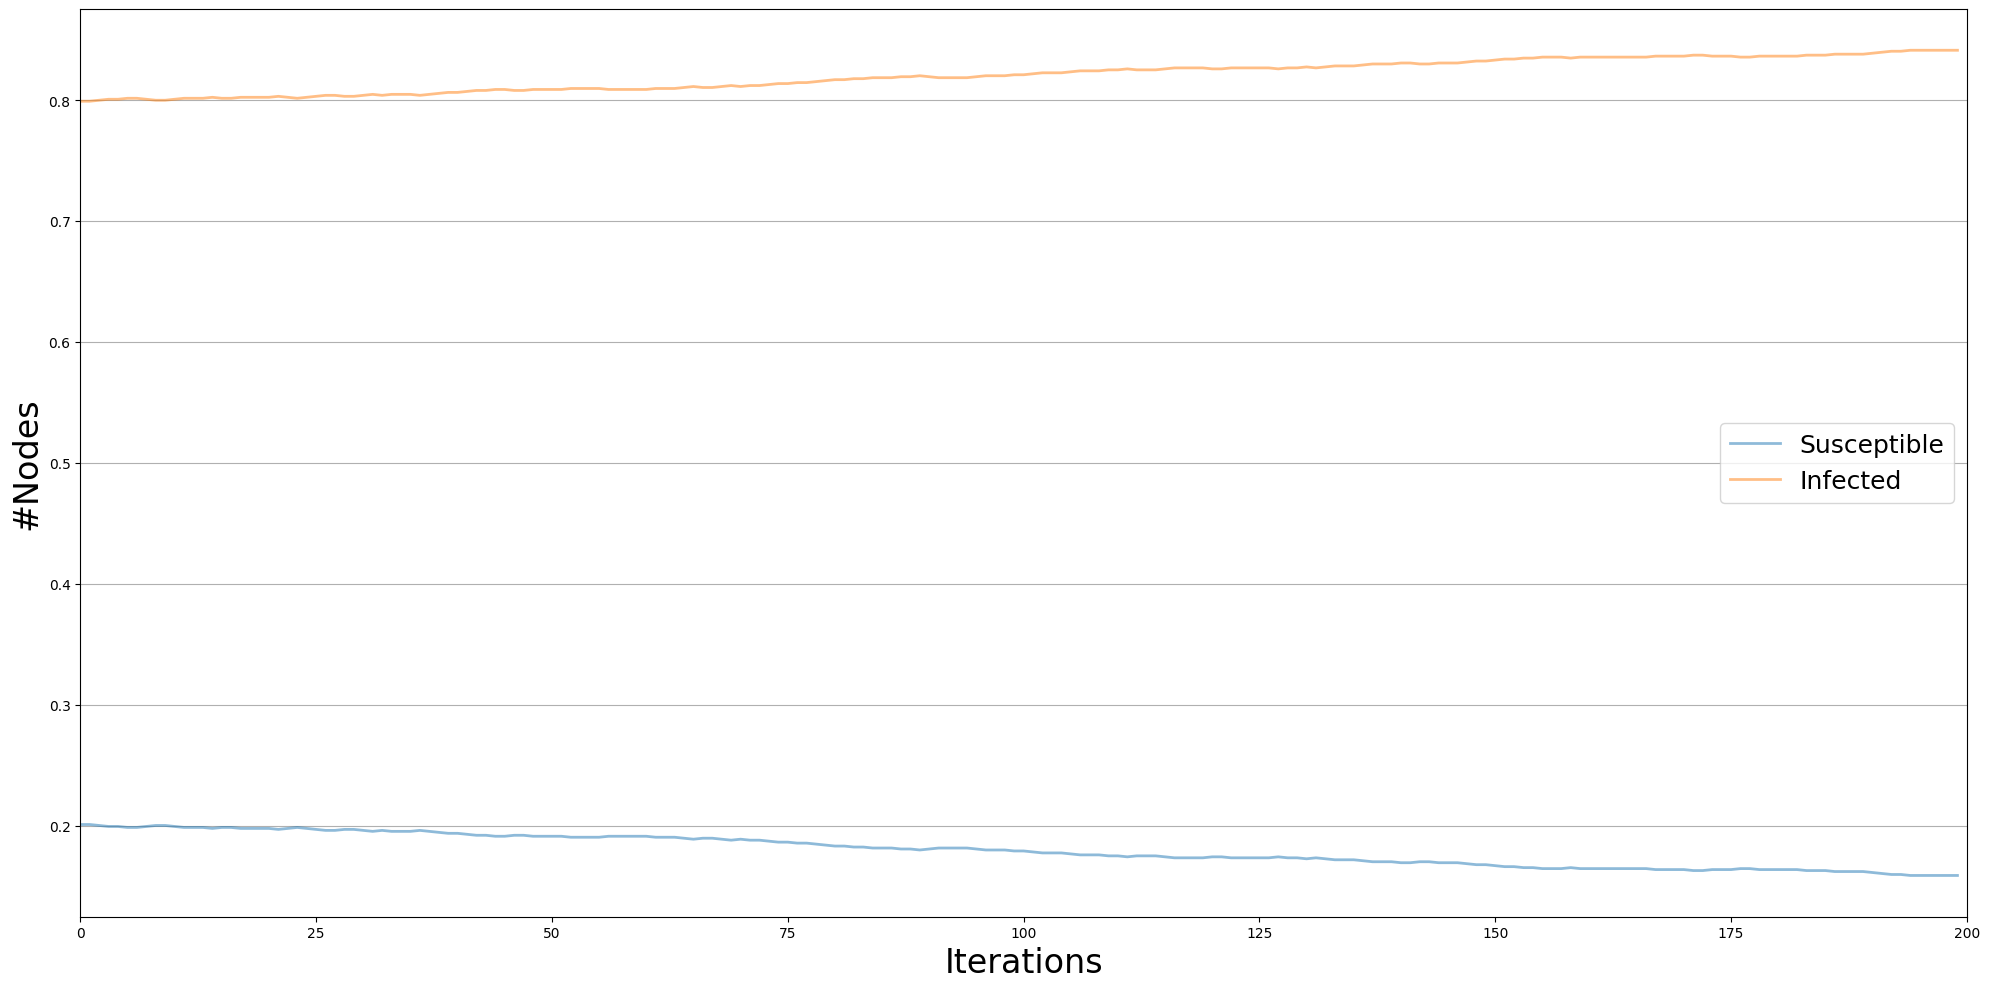

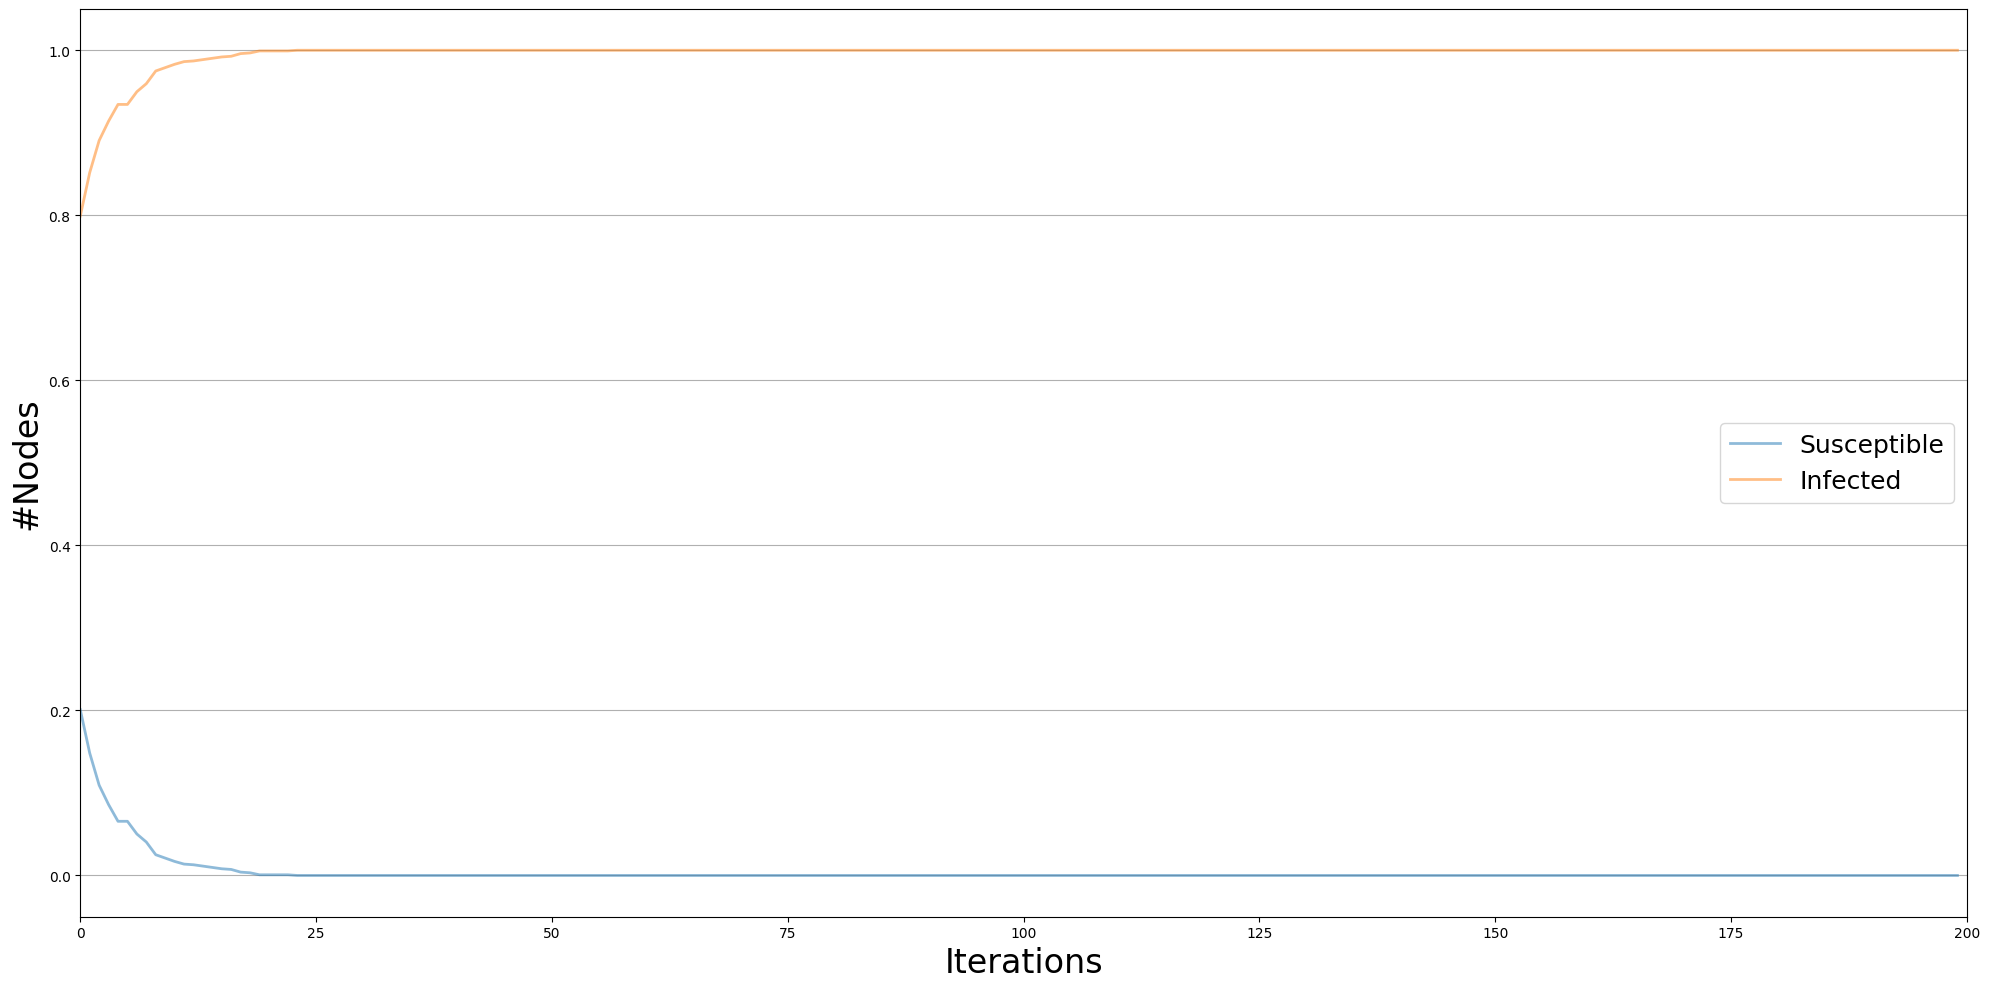

In [135]:
for model in models:
  set_model_initial_status(model, 0.4)
  iterations = model.iteration_bunch(200)
  trends = model.build_trends(iterations)

  viz = DiffusionTrend(model, trends)
  p = viz.plot()

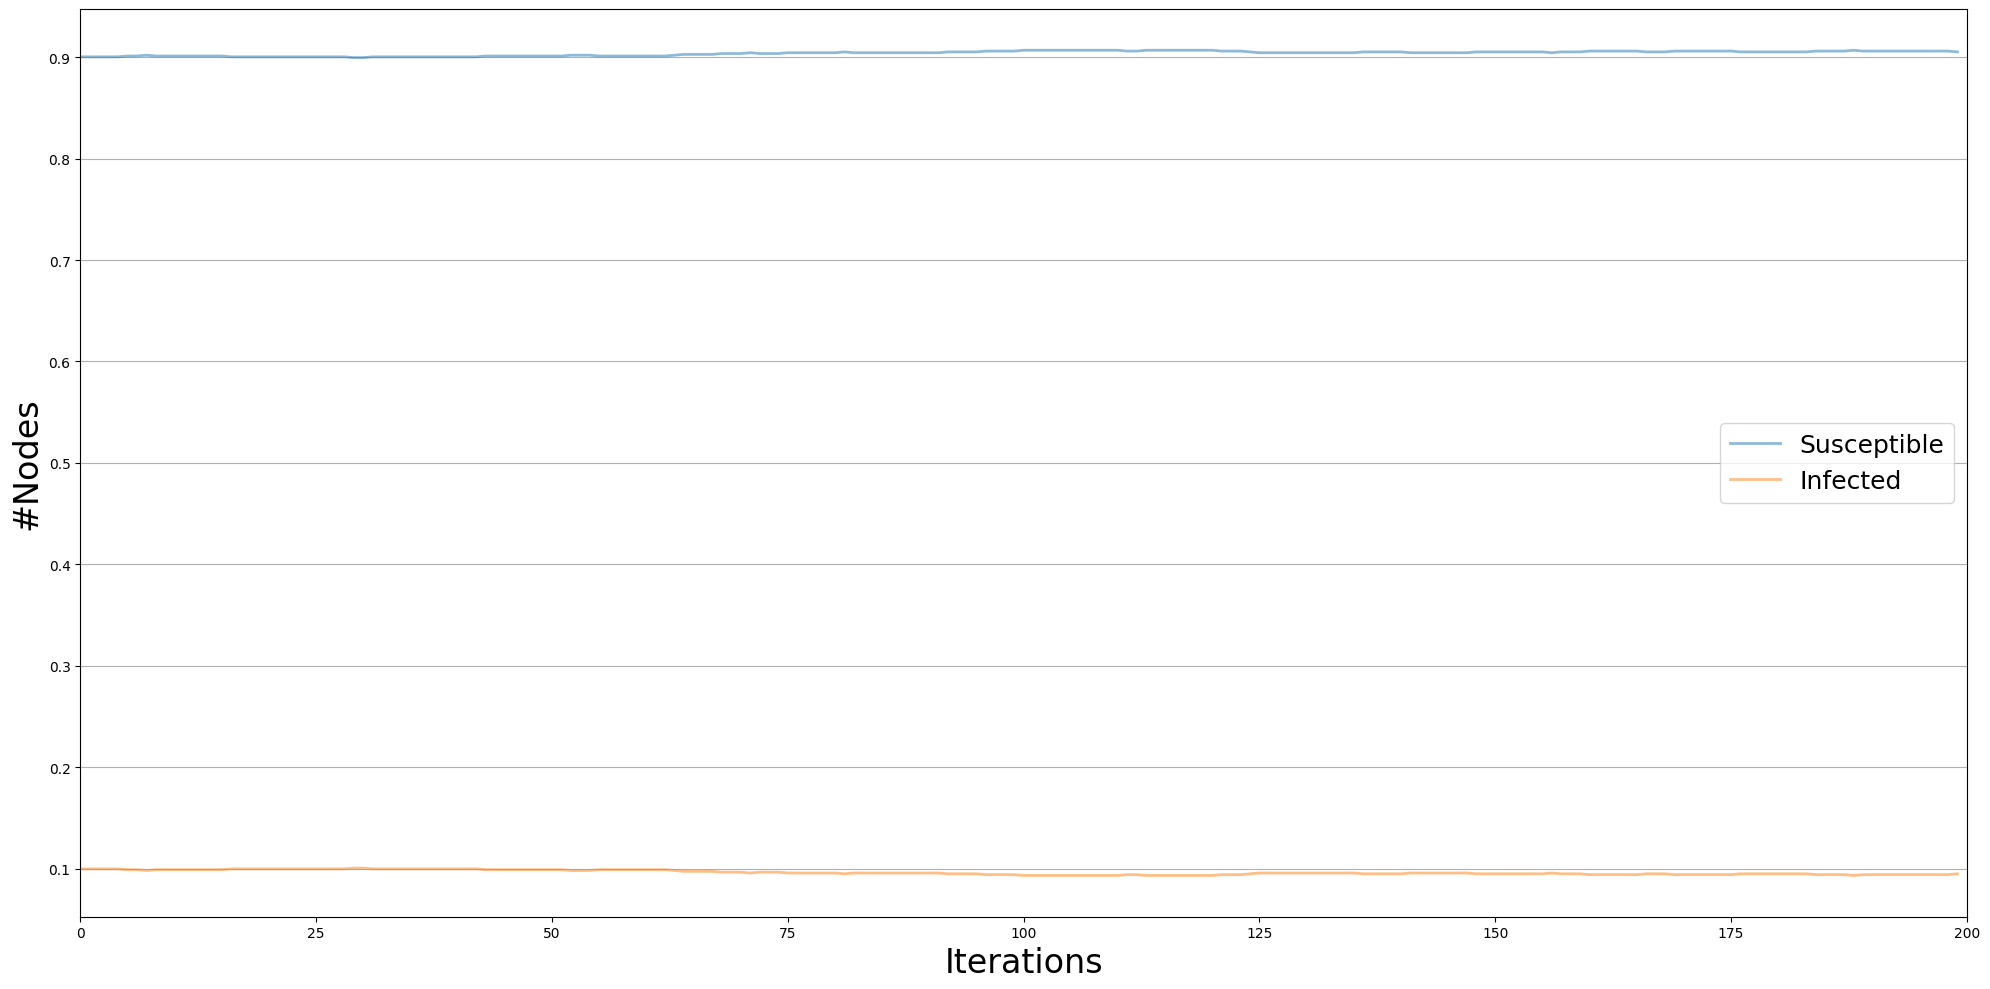

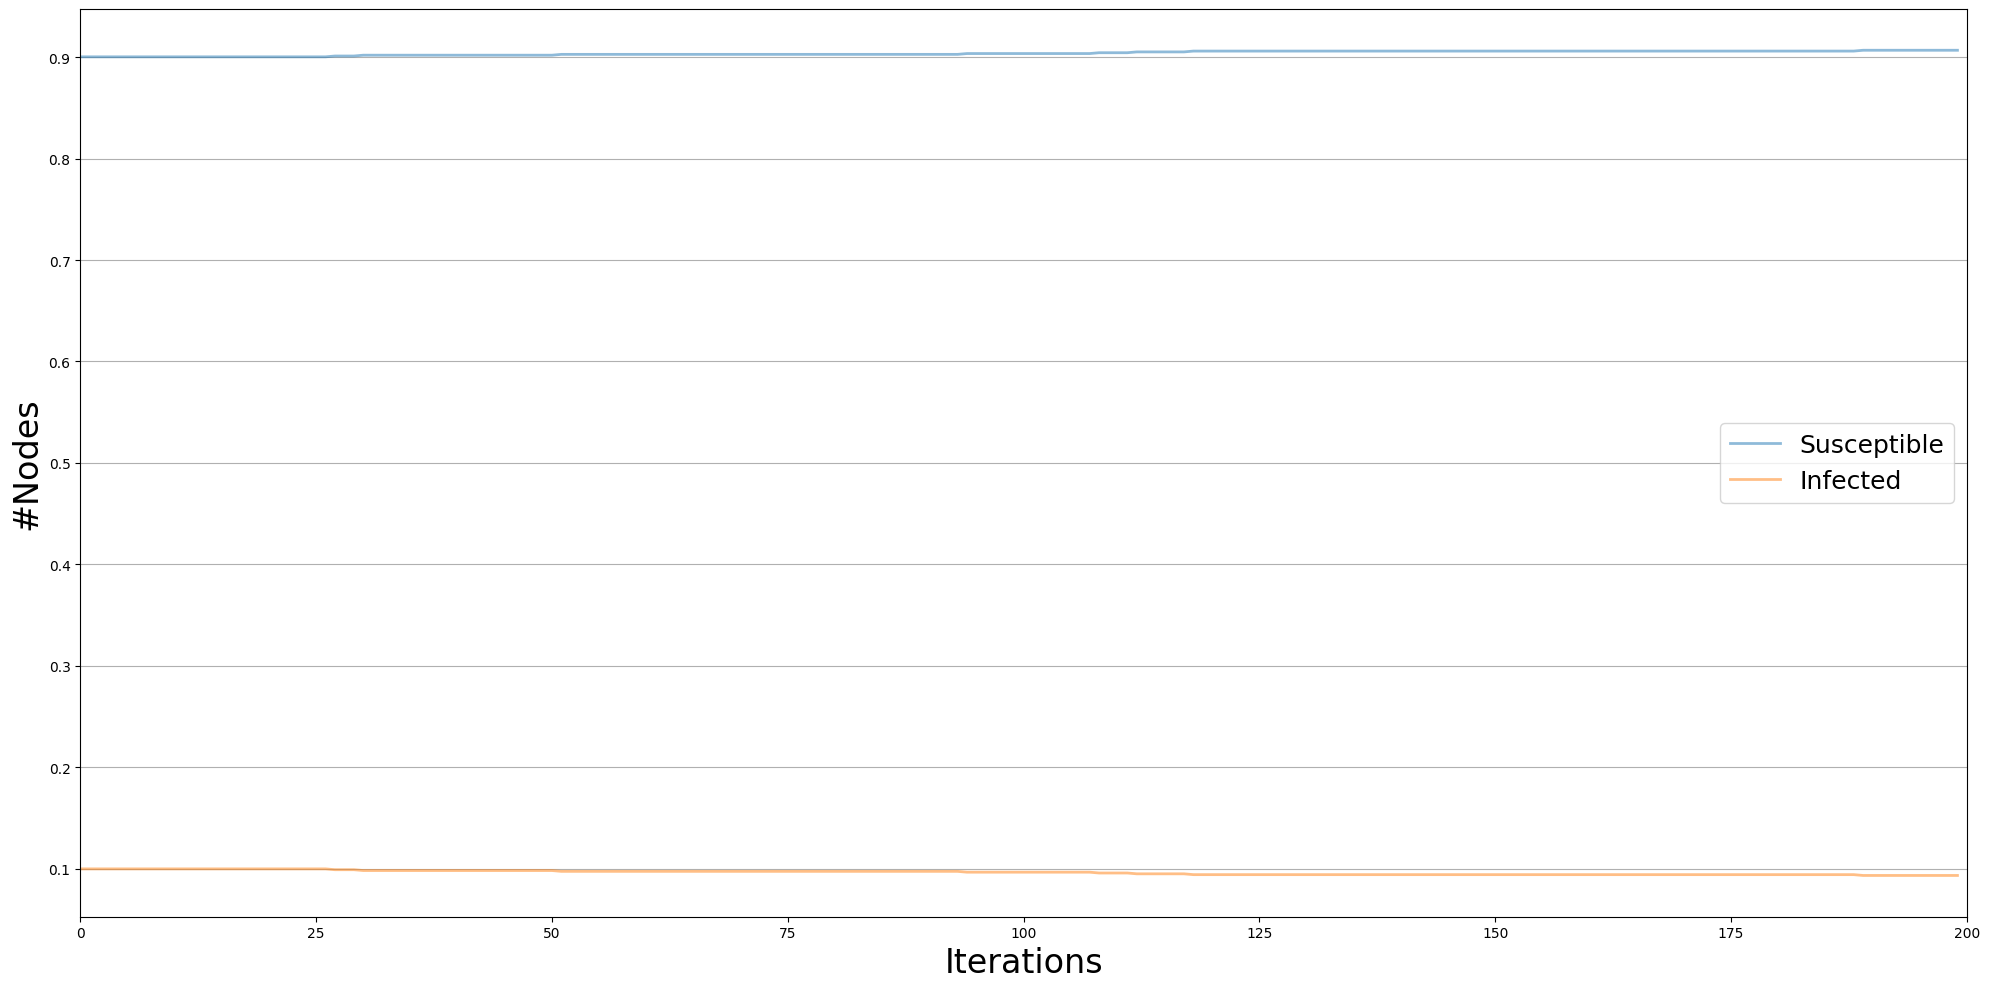

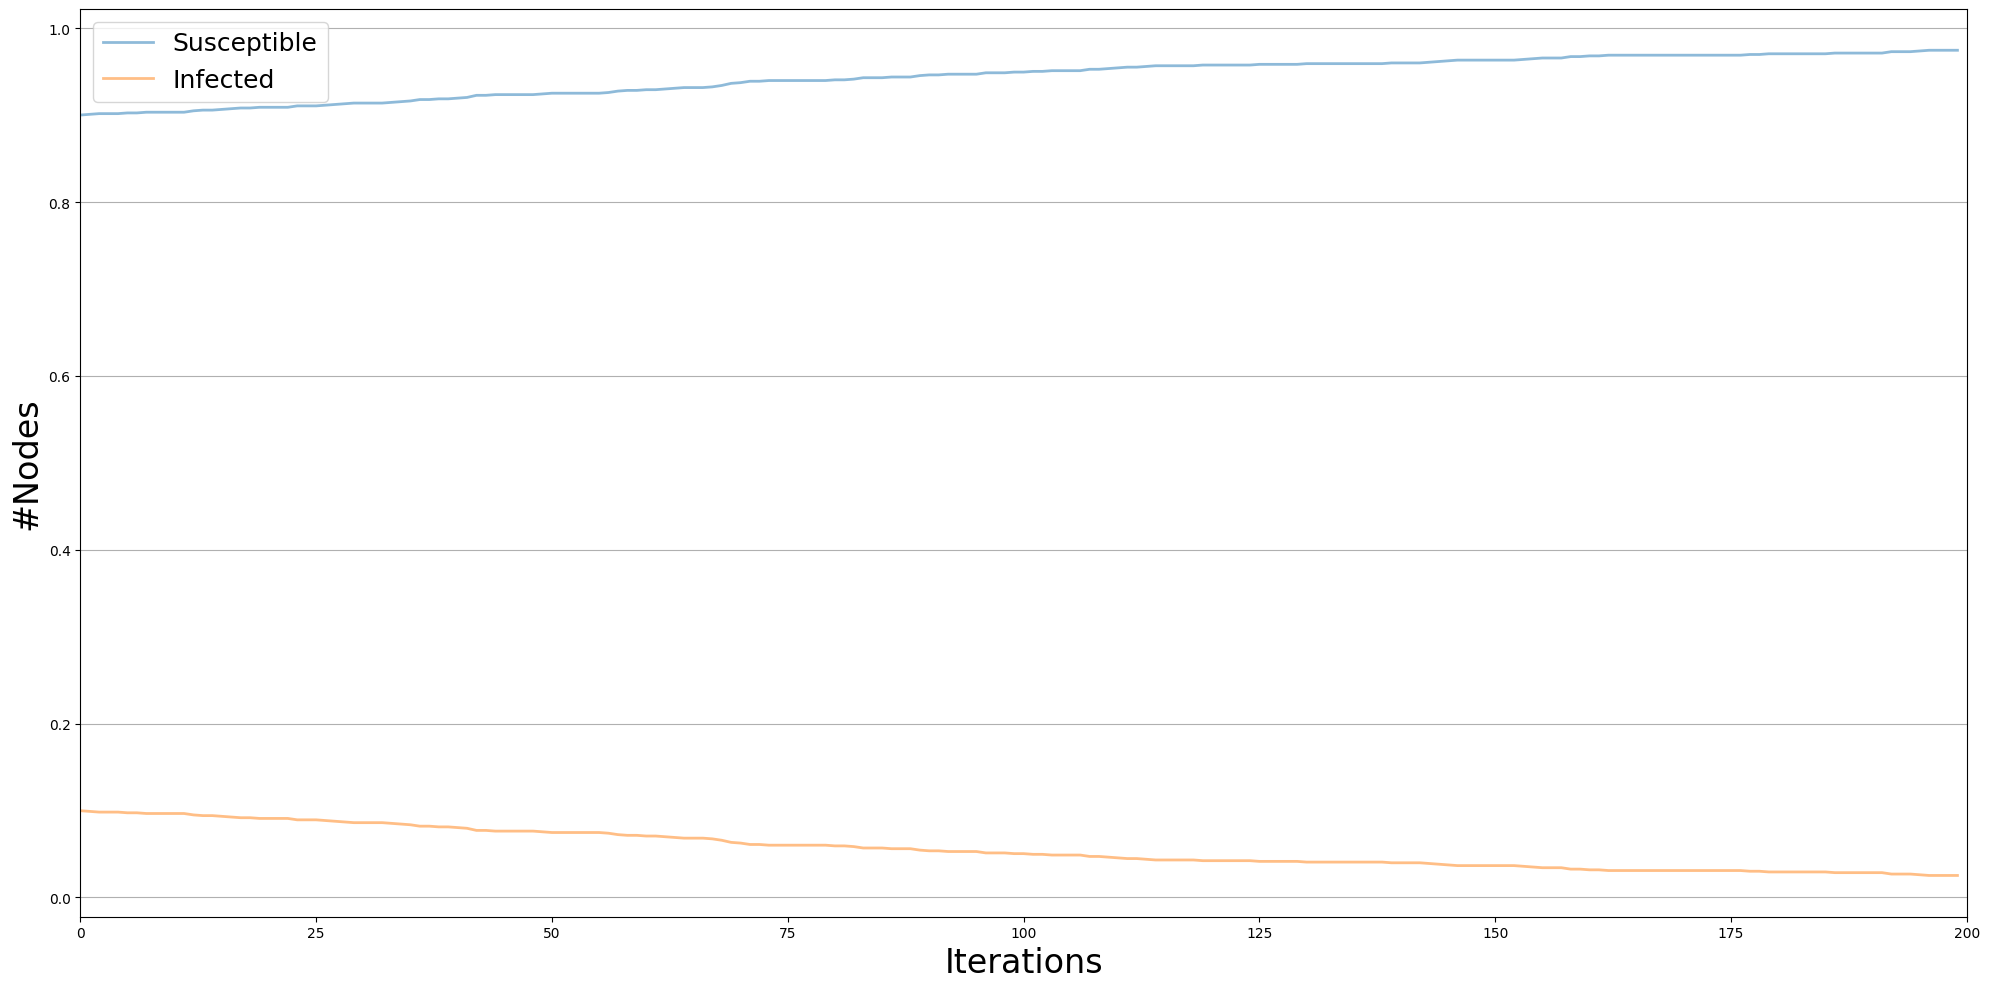

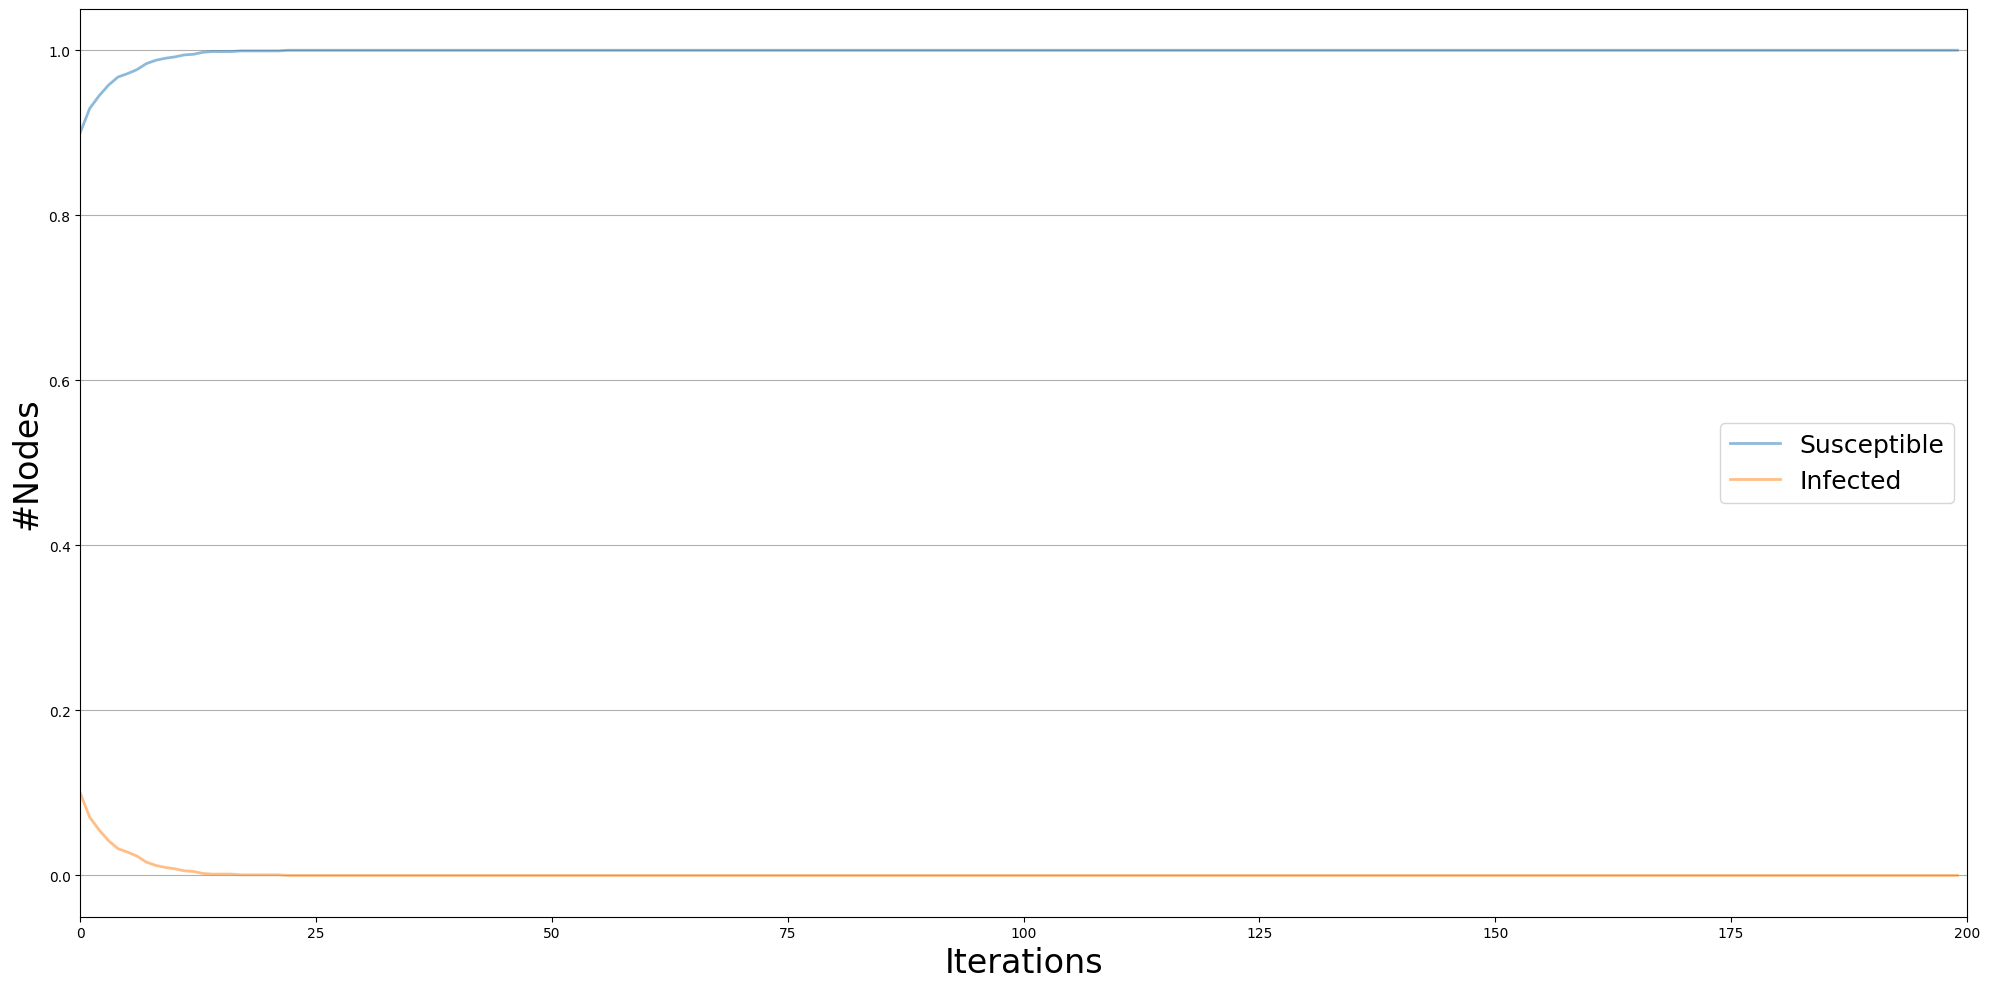

In [140]:
models = create_models('op')

for model in models:
  set_model_initial_status(model, percentage_blocked=0.4, q=10)
  iterations = model.iteration_bunch(200)
  trends = model.build_trends(iterations)

  viz = DiffusionTrend(model, trends)
  p = viz.plot()

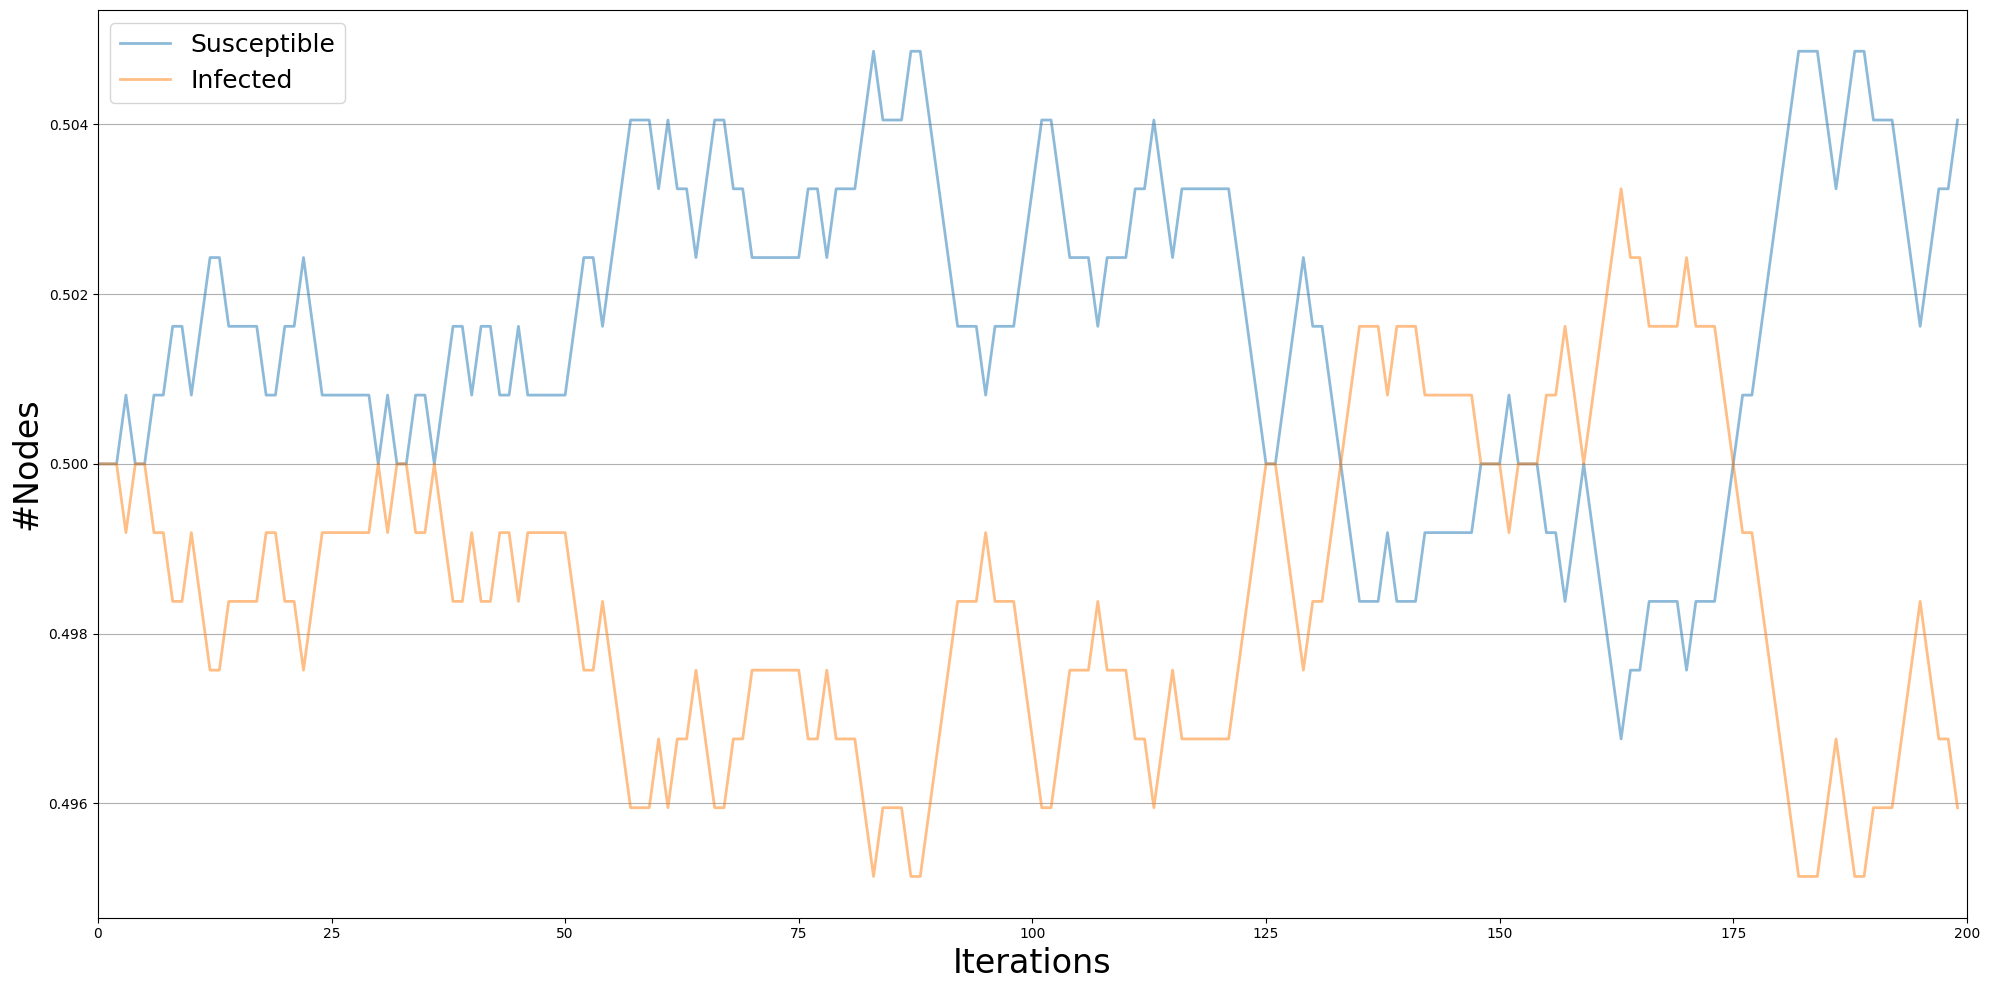

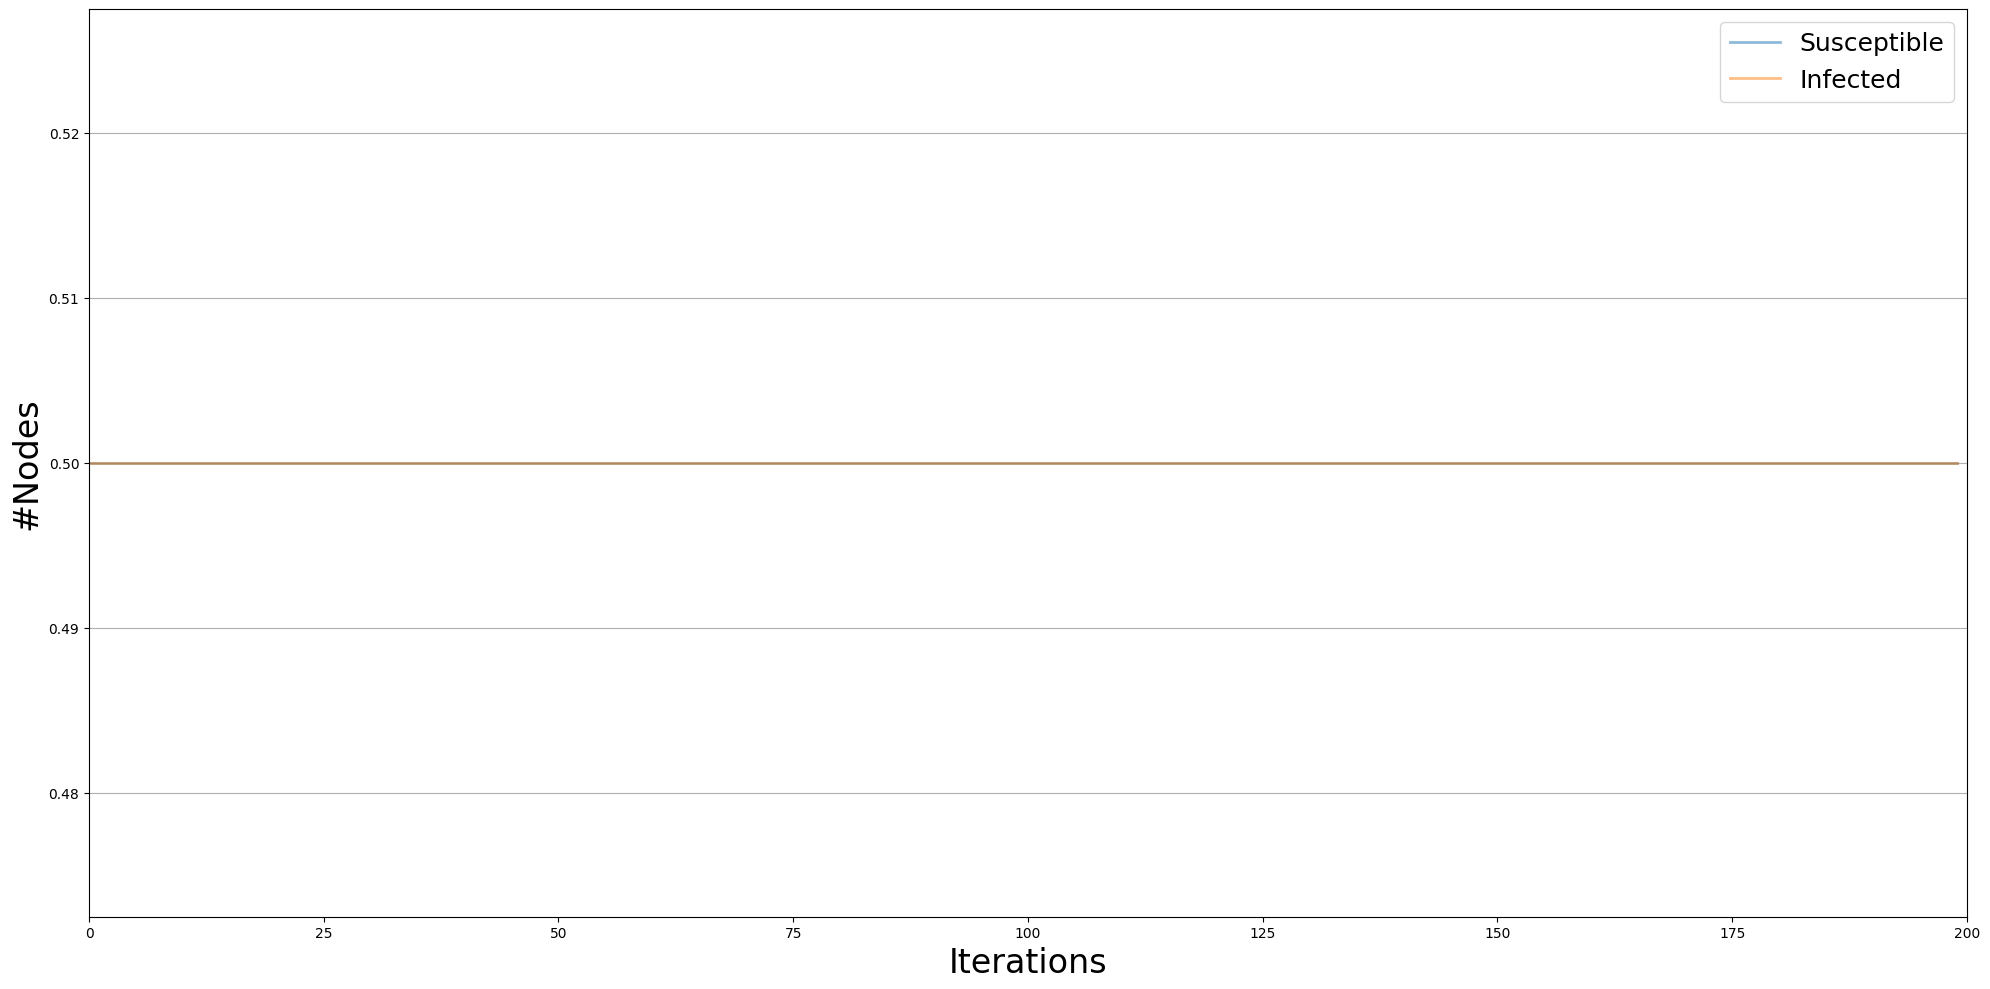

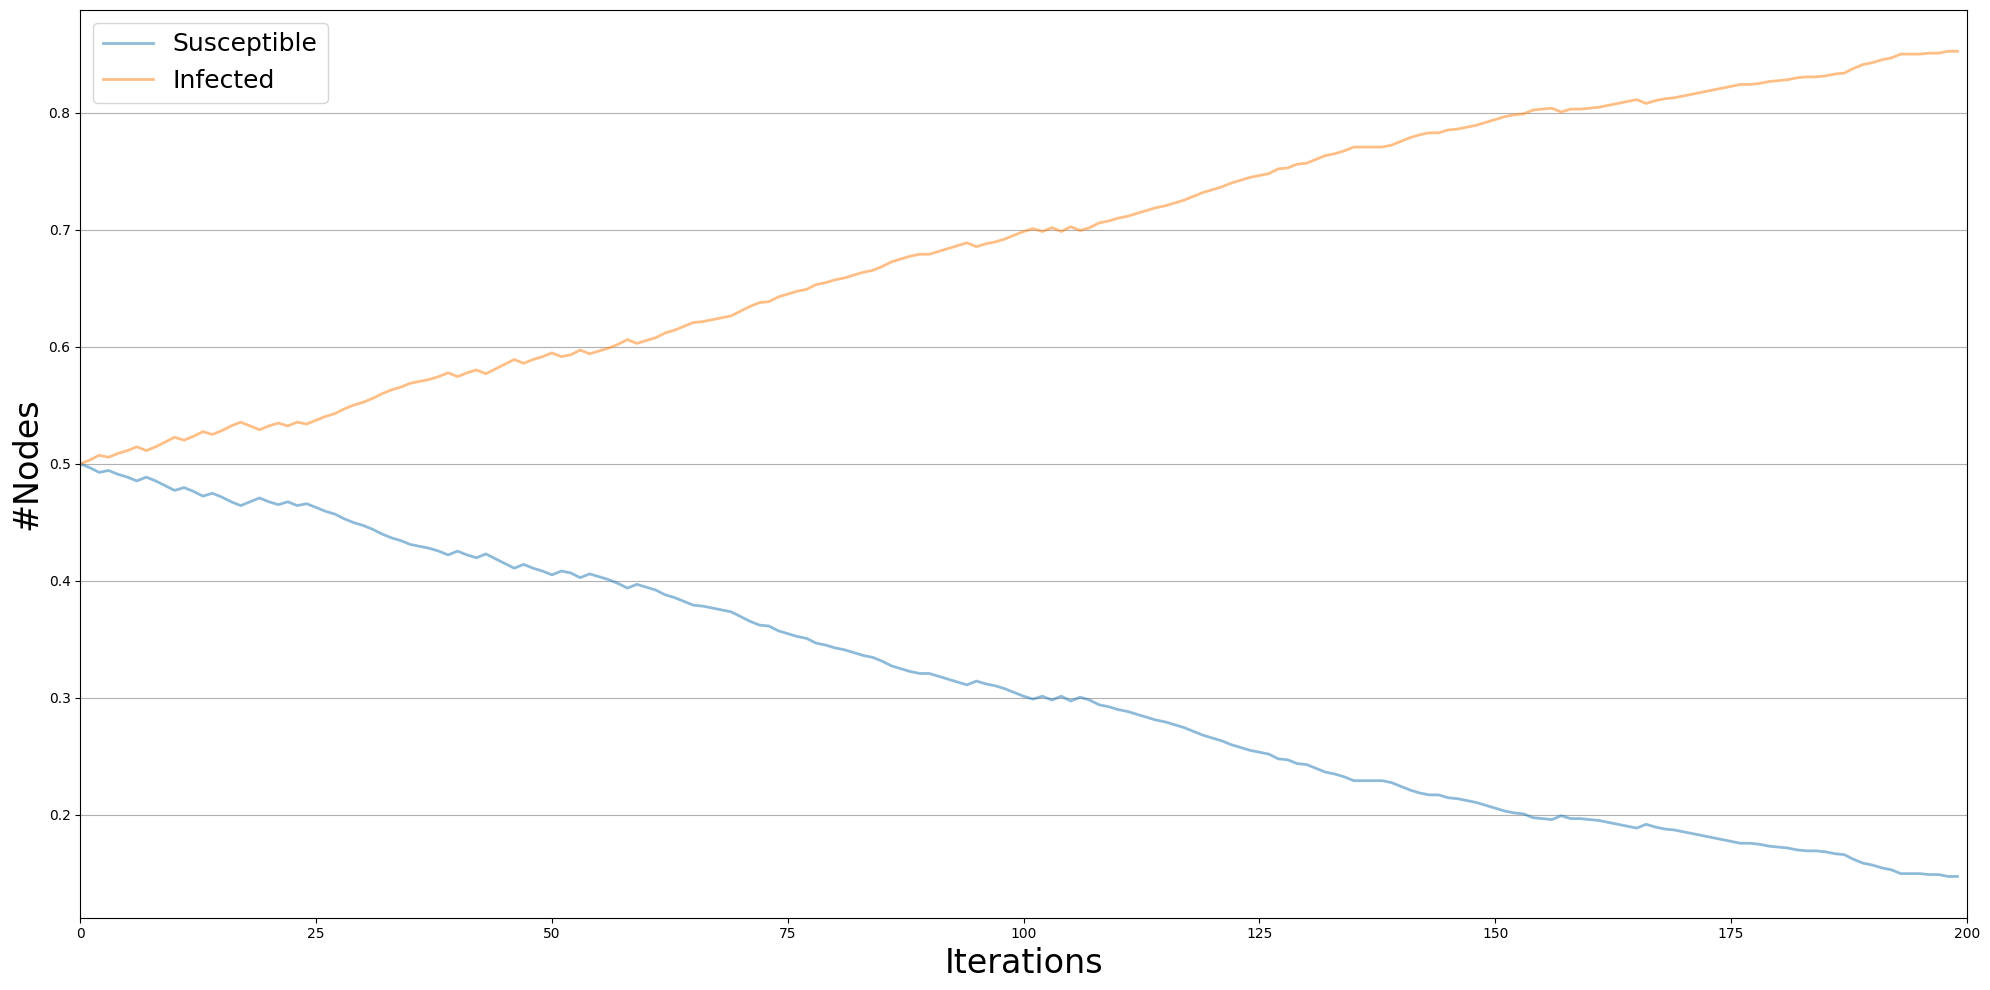

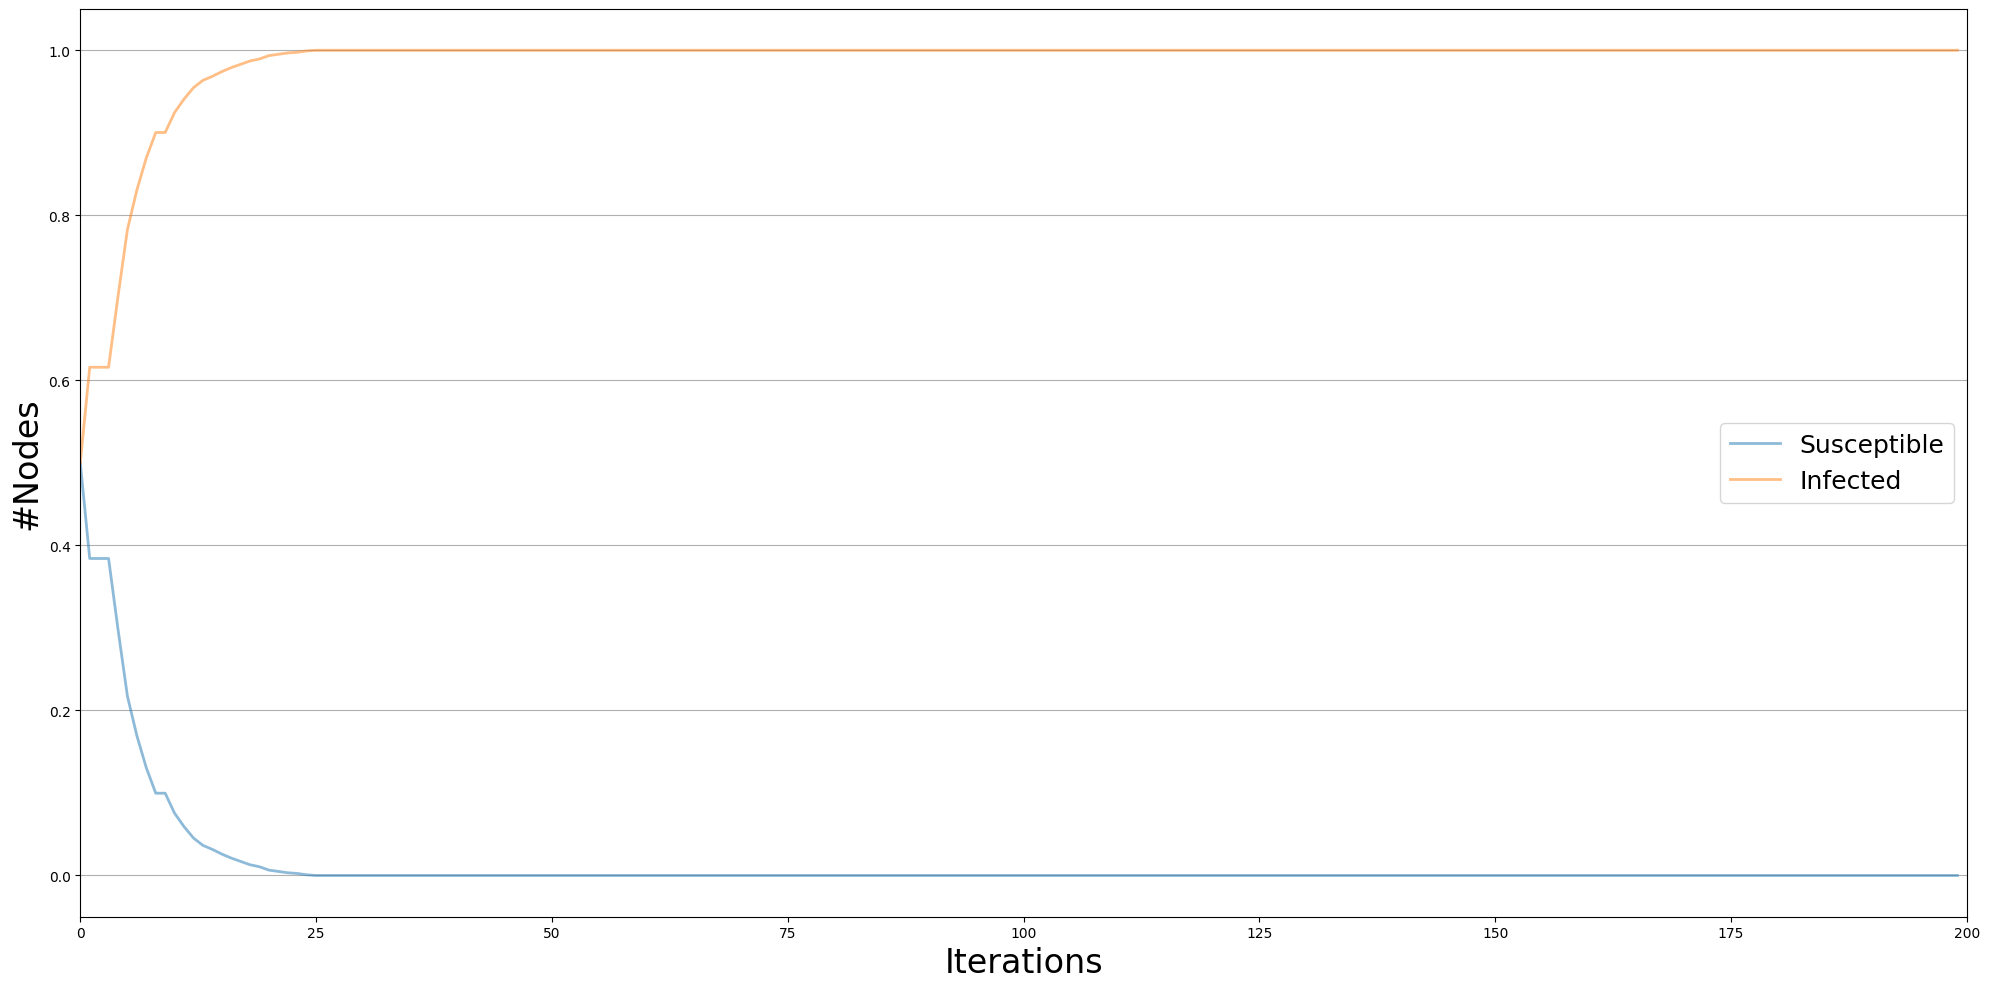

In [141]:
models = create_models('op')

for model in models:
  set_model_initial_status(model, fraction_infected=0.5, percentage_blocked=0.4, q=10)
  iterations = model.iteration_bunch(200)
  trends = model.build_trends(iterations)

  viz = DiffusionTrend(model, trends)
  p = viz.plot()

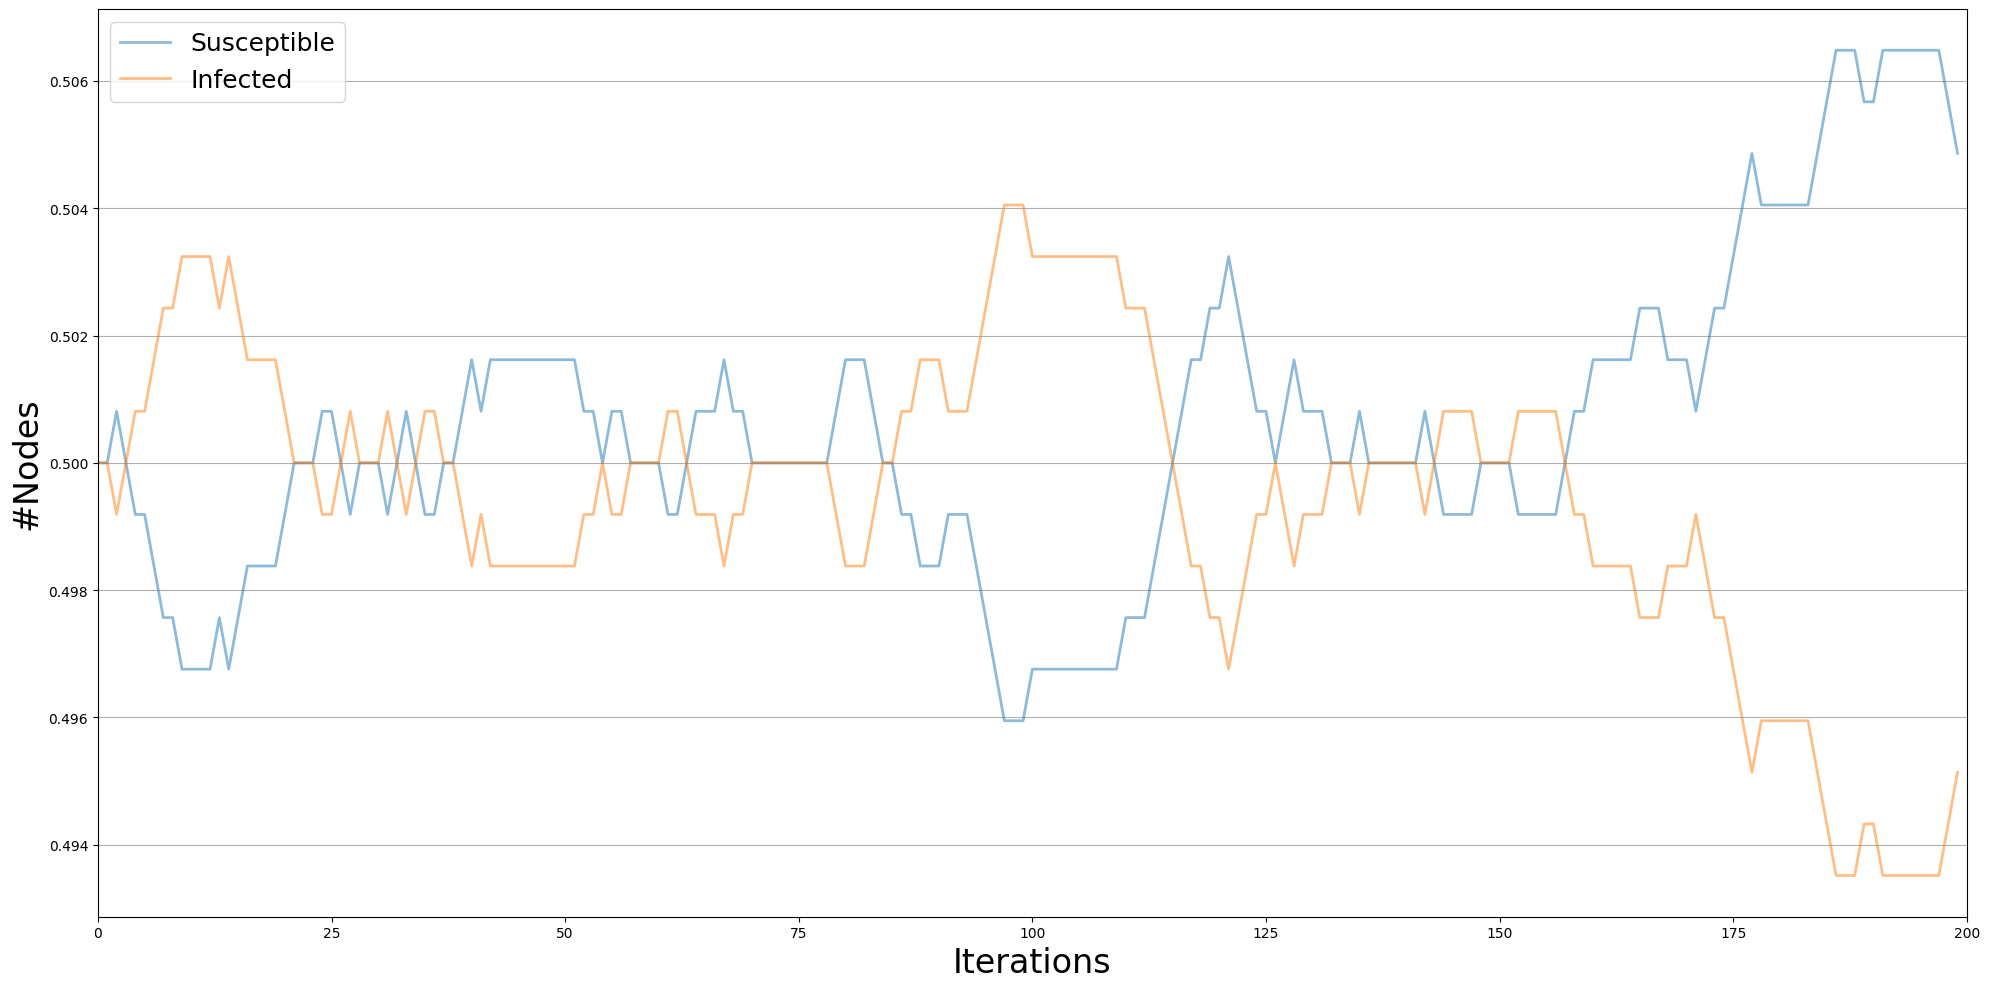

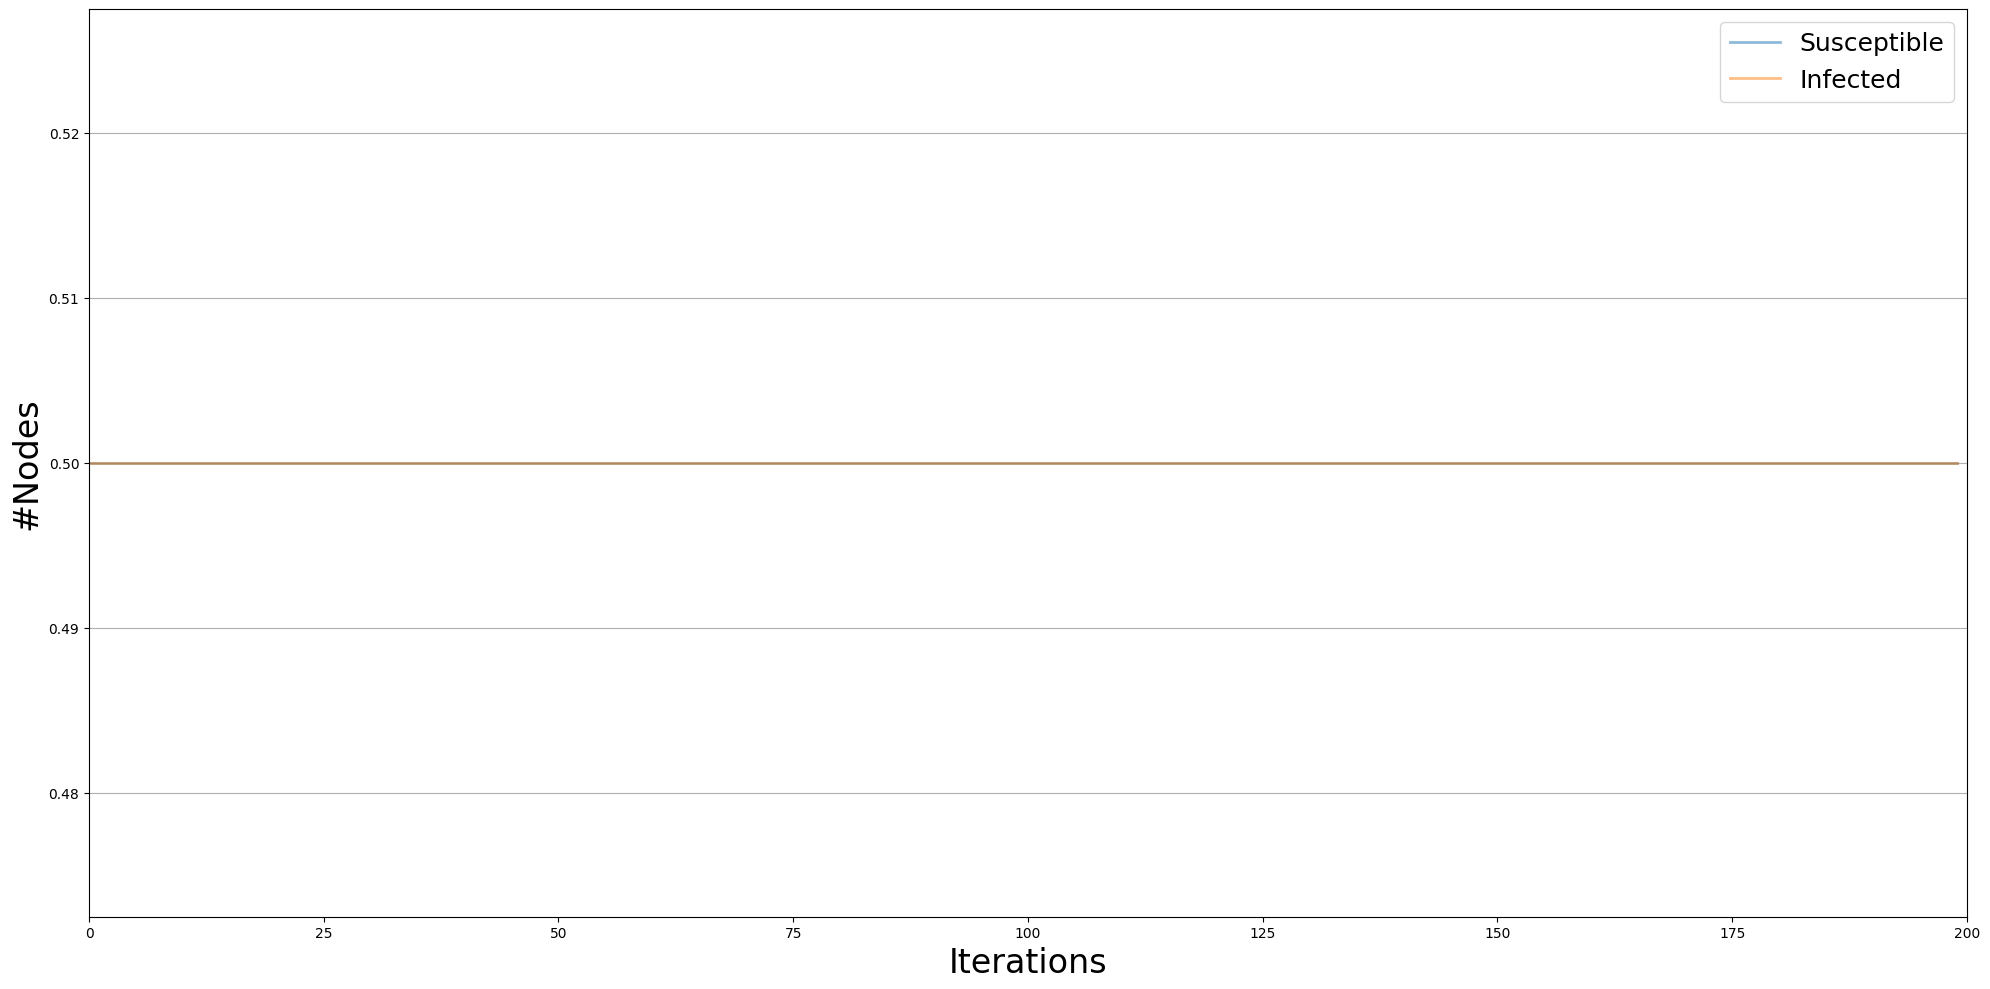

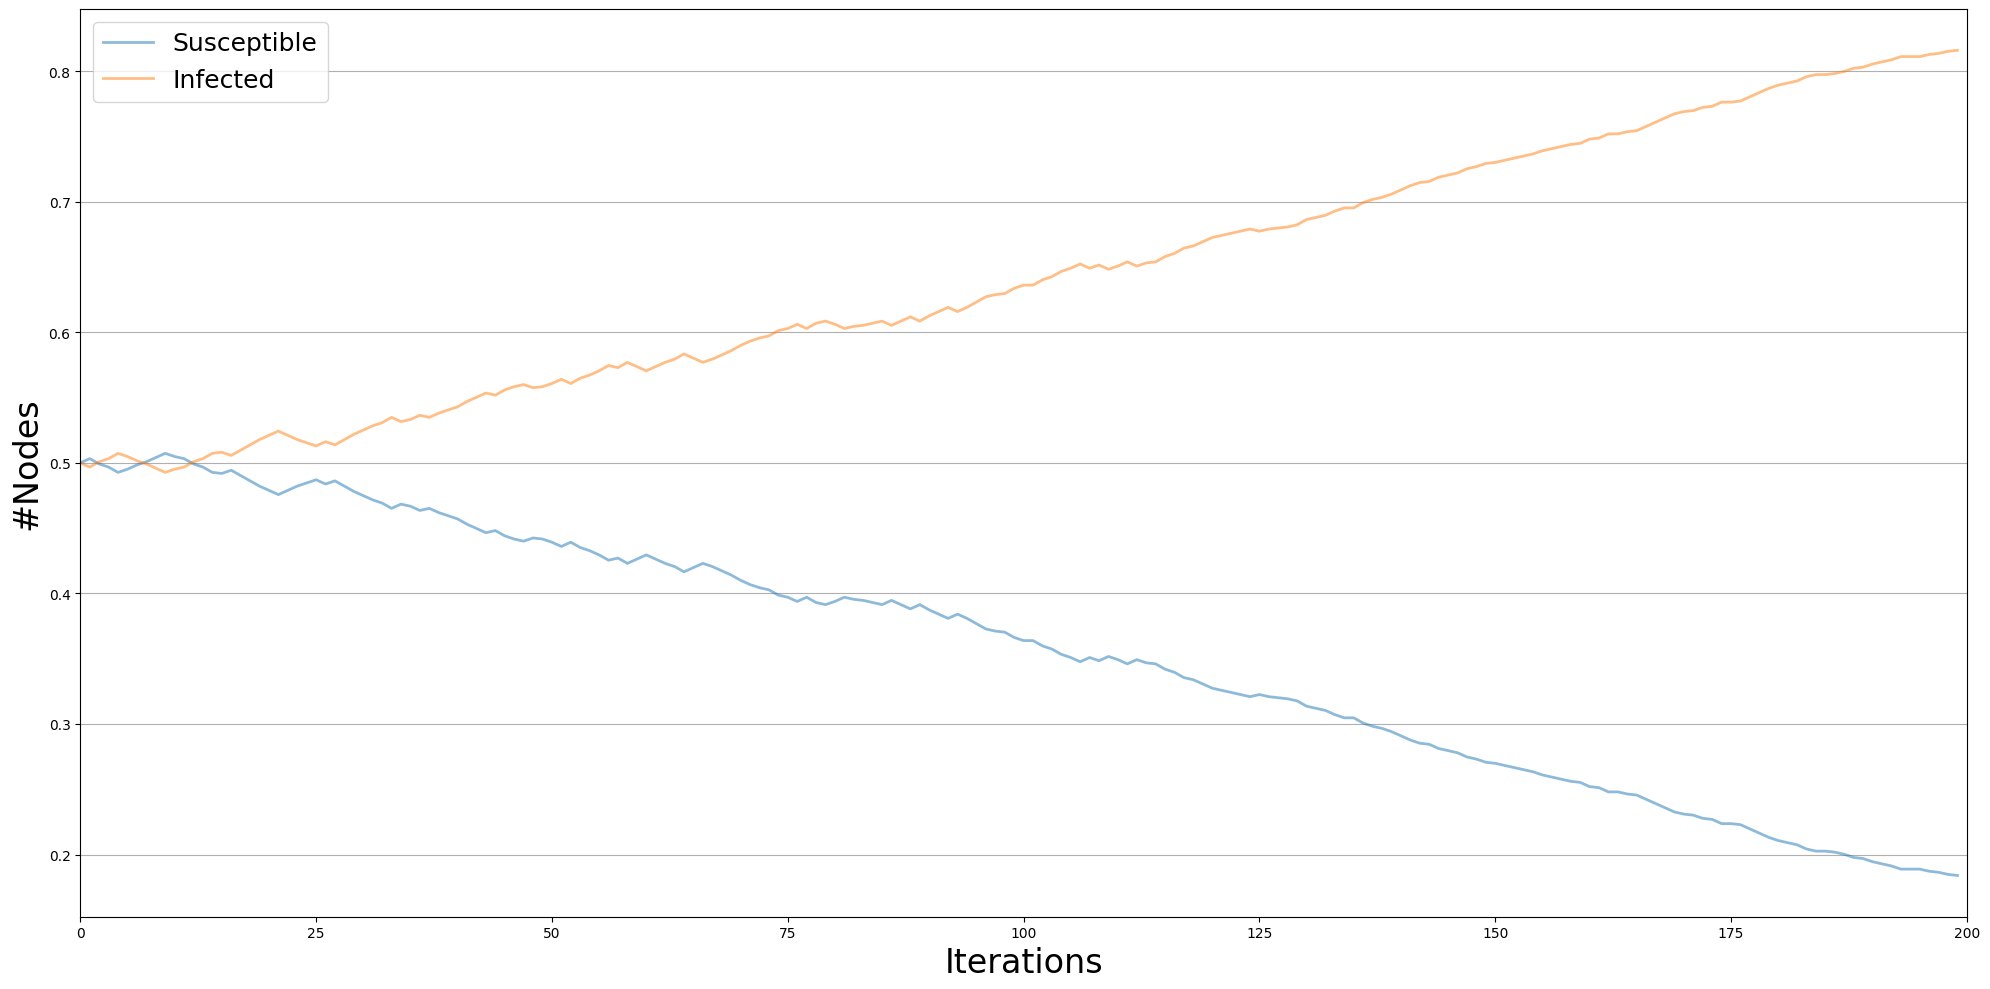

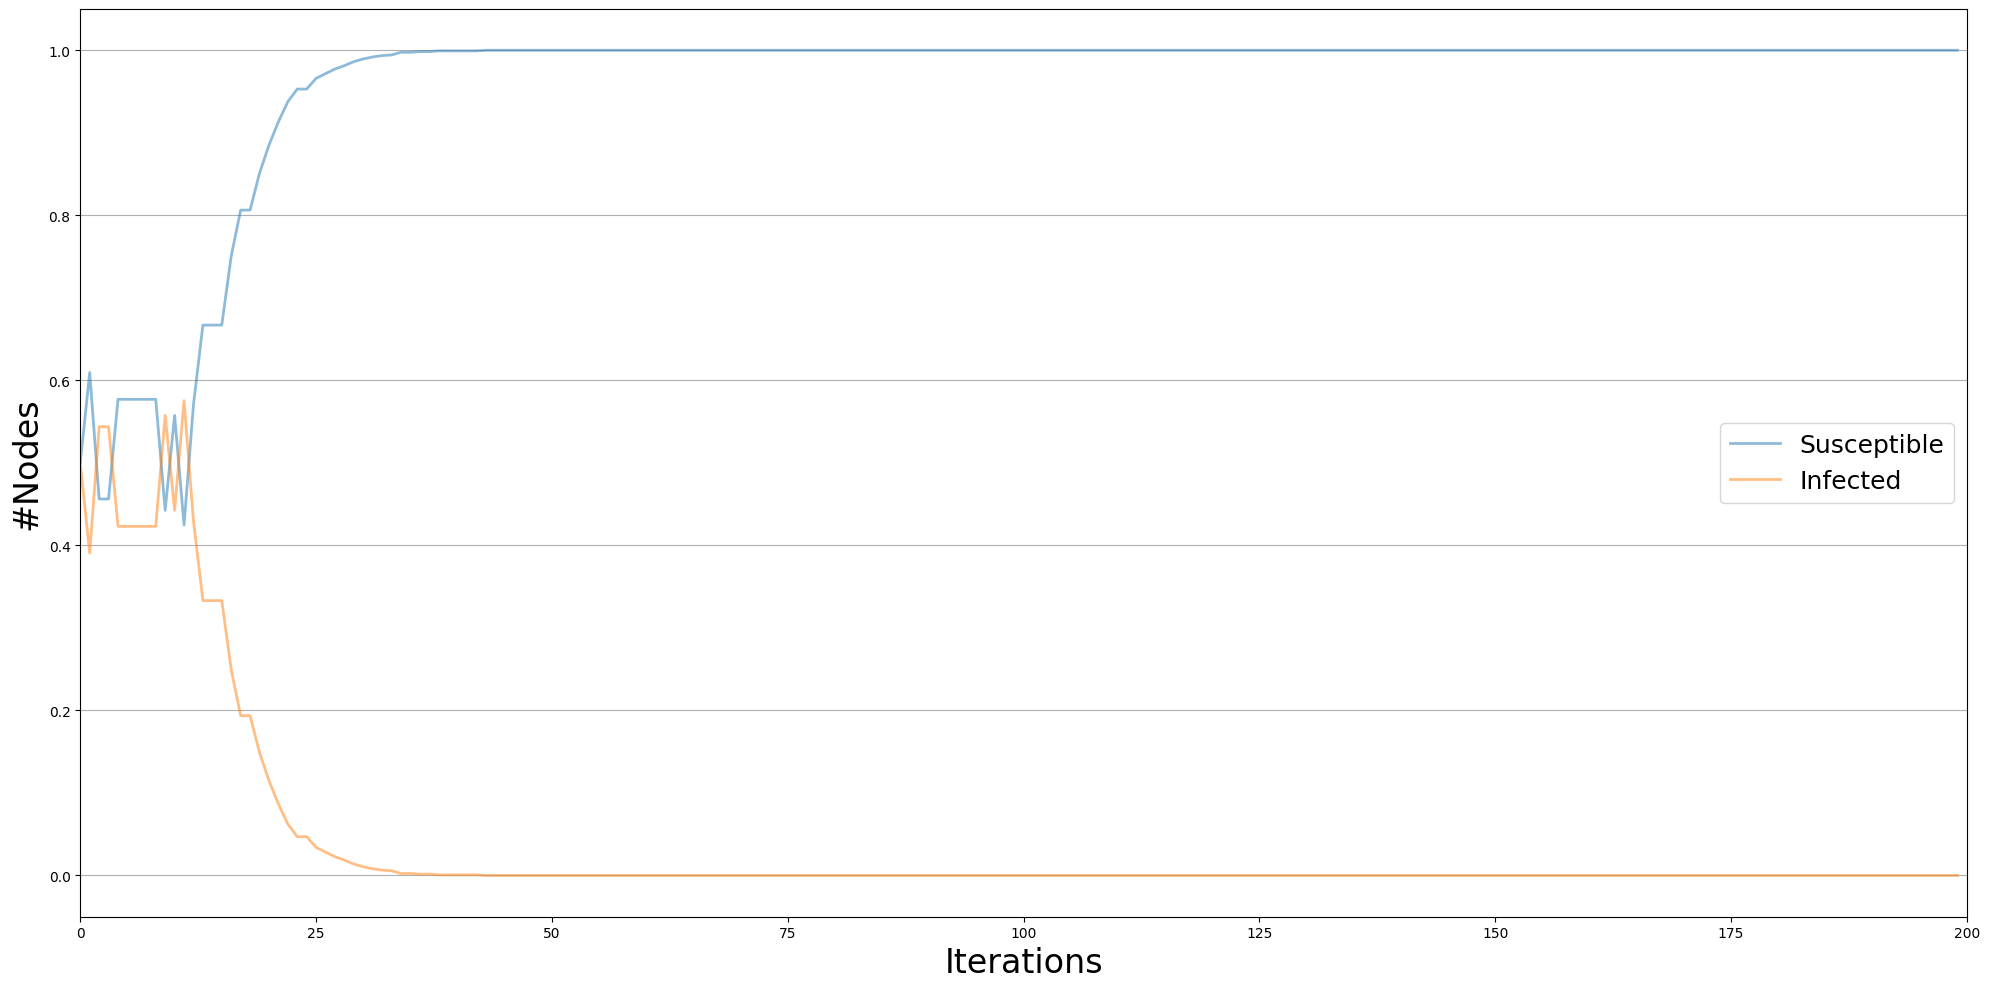

In [142]:
models = create_models('op')

for model in models:
  set_model_initial_status(model, fraction_infected=0.5, q=10)
  iterations = model.iteration_bunch(200)
  trends = model.build_trends(iterations)

  viz = DiffusionTrend(model, trends)
  p = viz.plot()

Според добиените графици, изгледа дека моделите полесно постигнуваат еквилибриум со пониски стапки на инцијално инфицирани јазли, но во глобала секогаш постигнуваат целосен или скоро целосен еквилибриум, со исклучок на VoterModel со fraction_infected=0.5, кој не постигна еквилибриум

# Задача 3

In [143]:
graph = nx.read_edgelist('facebook_combined.txt')

In [144]:
models = create_models('op')

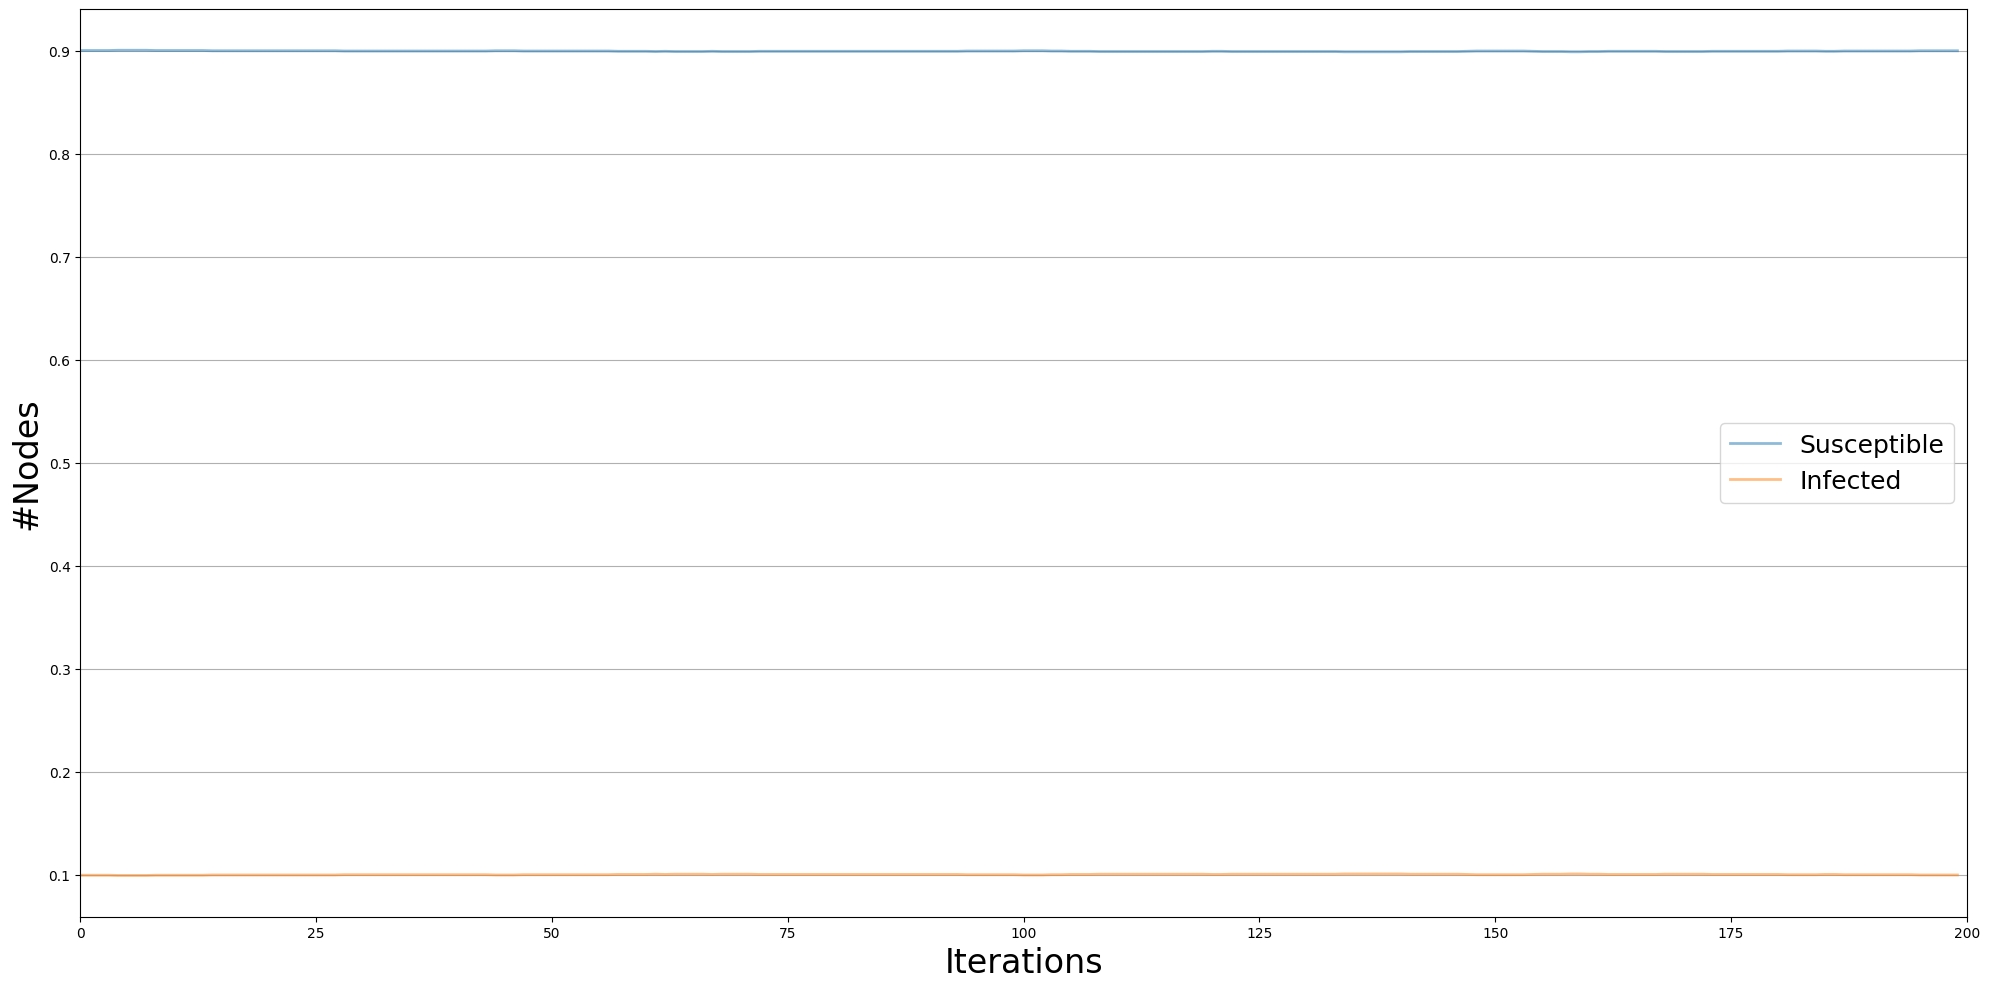

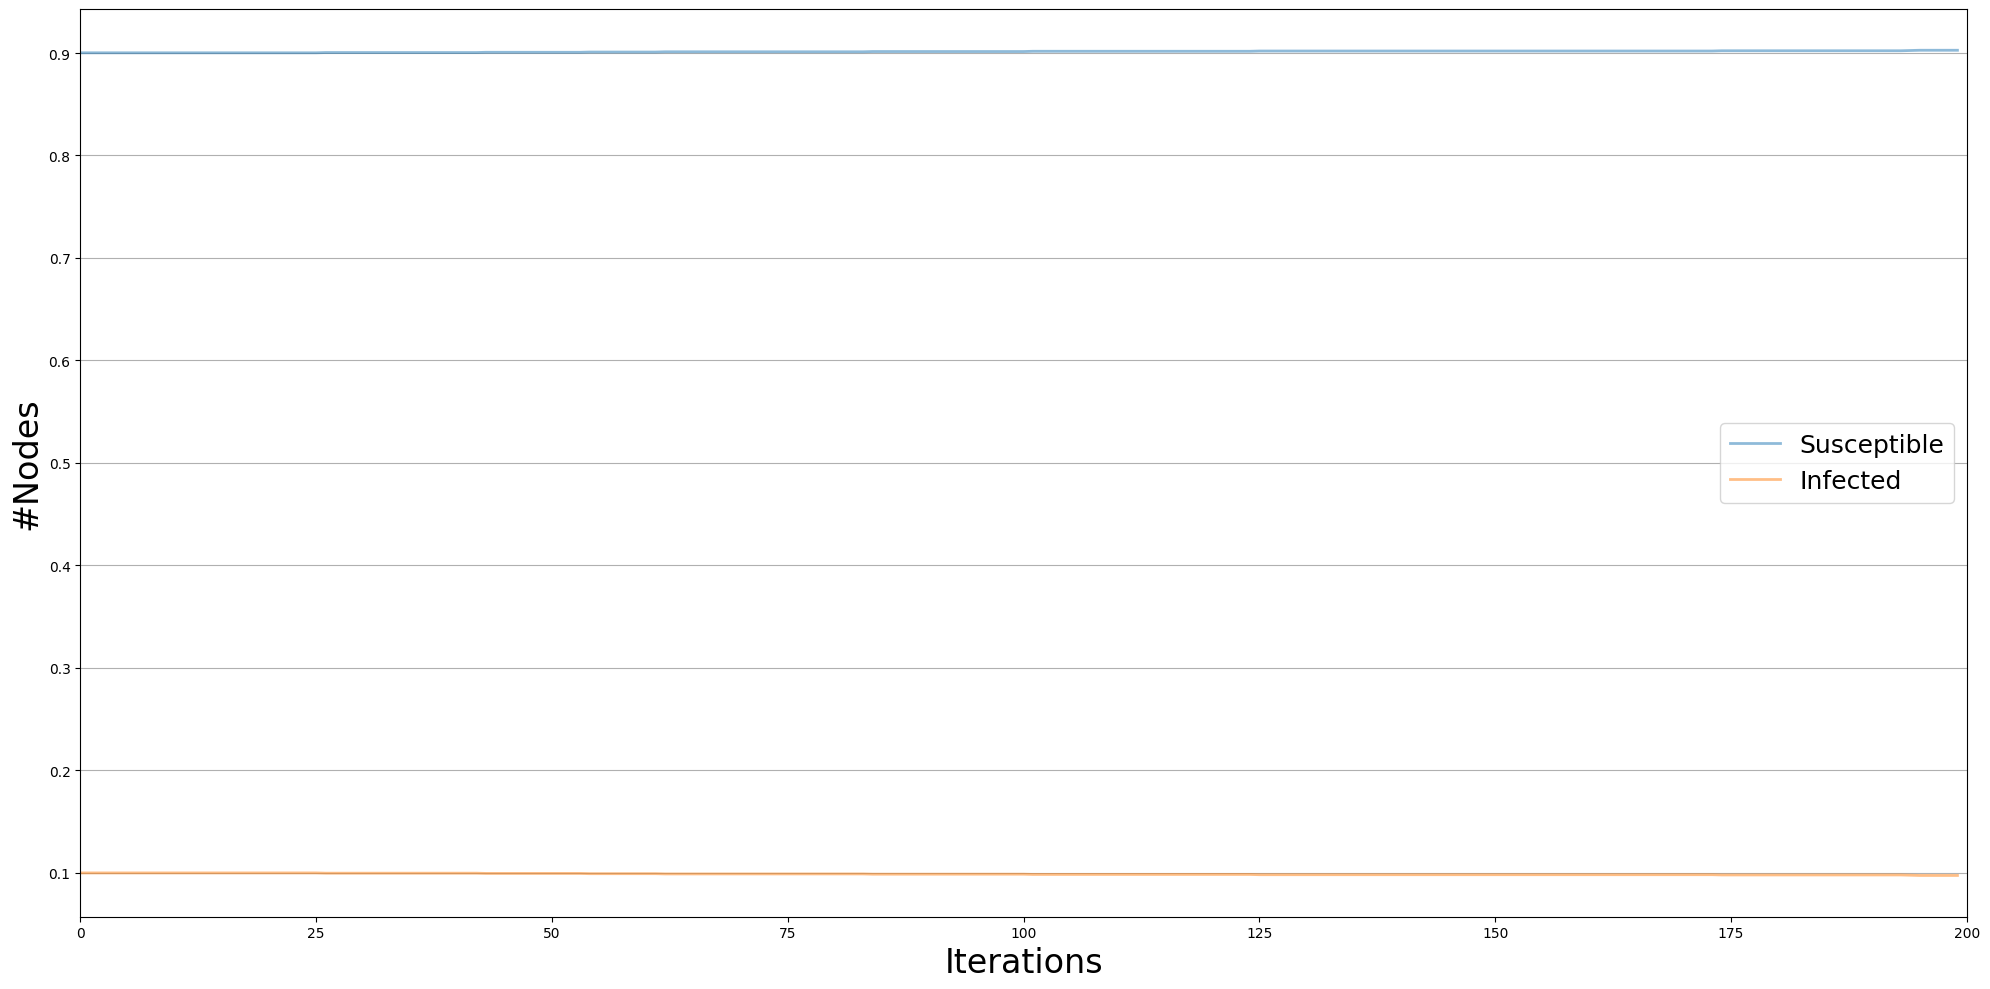

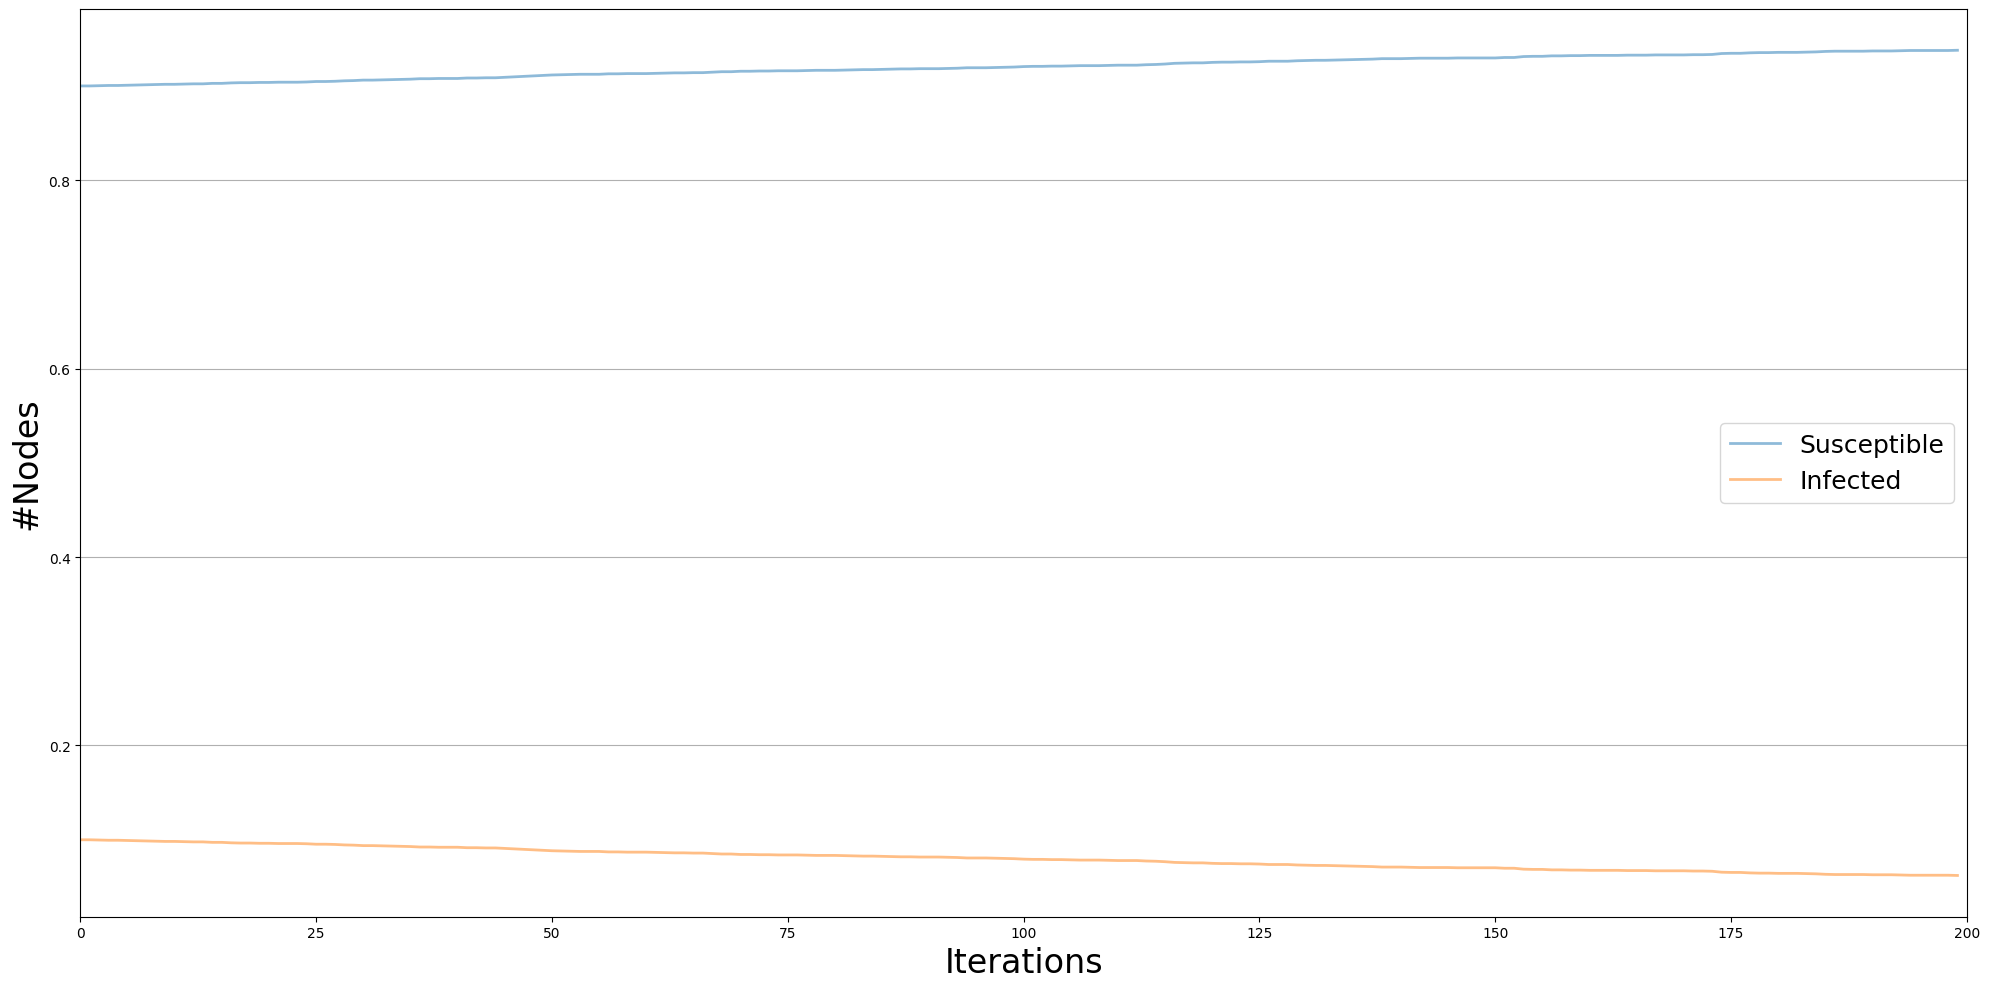

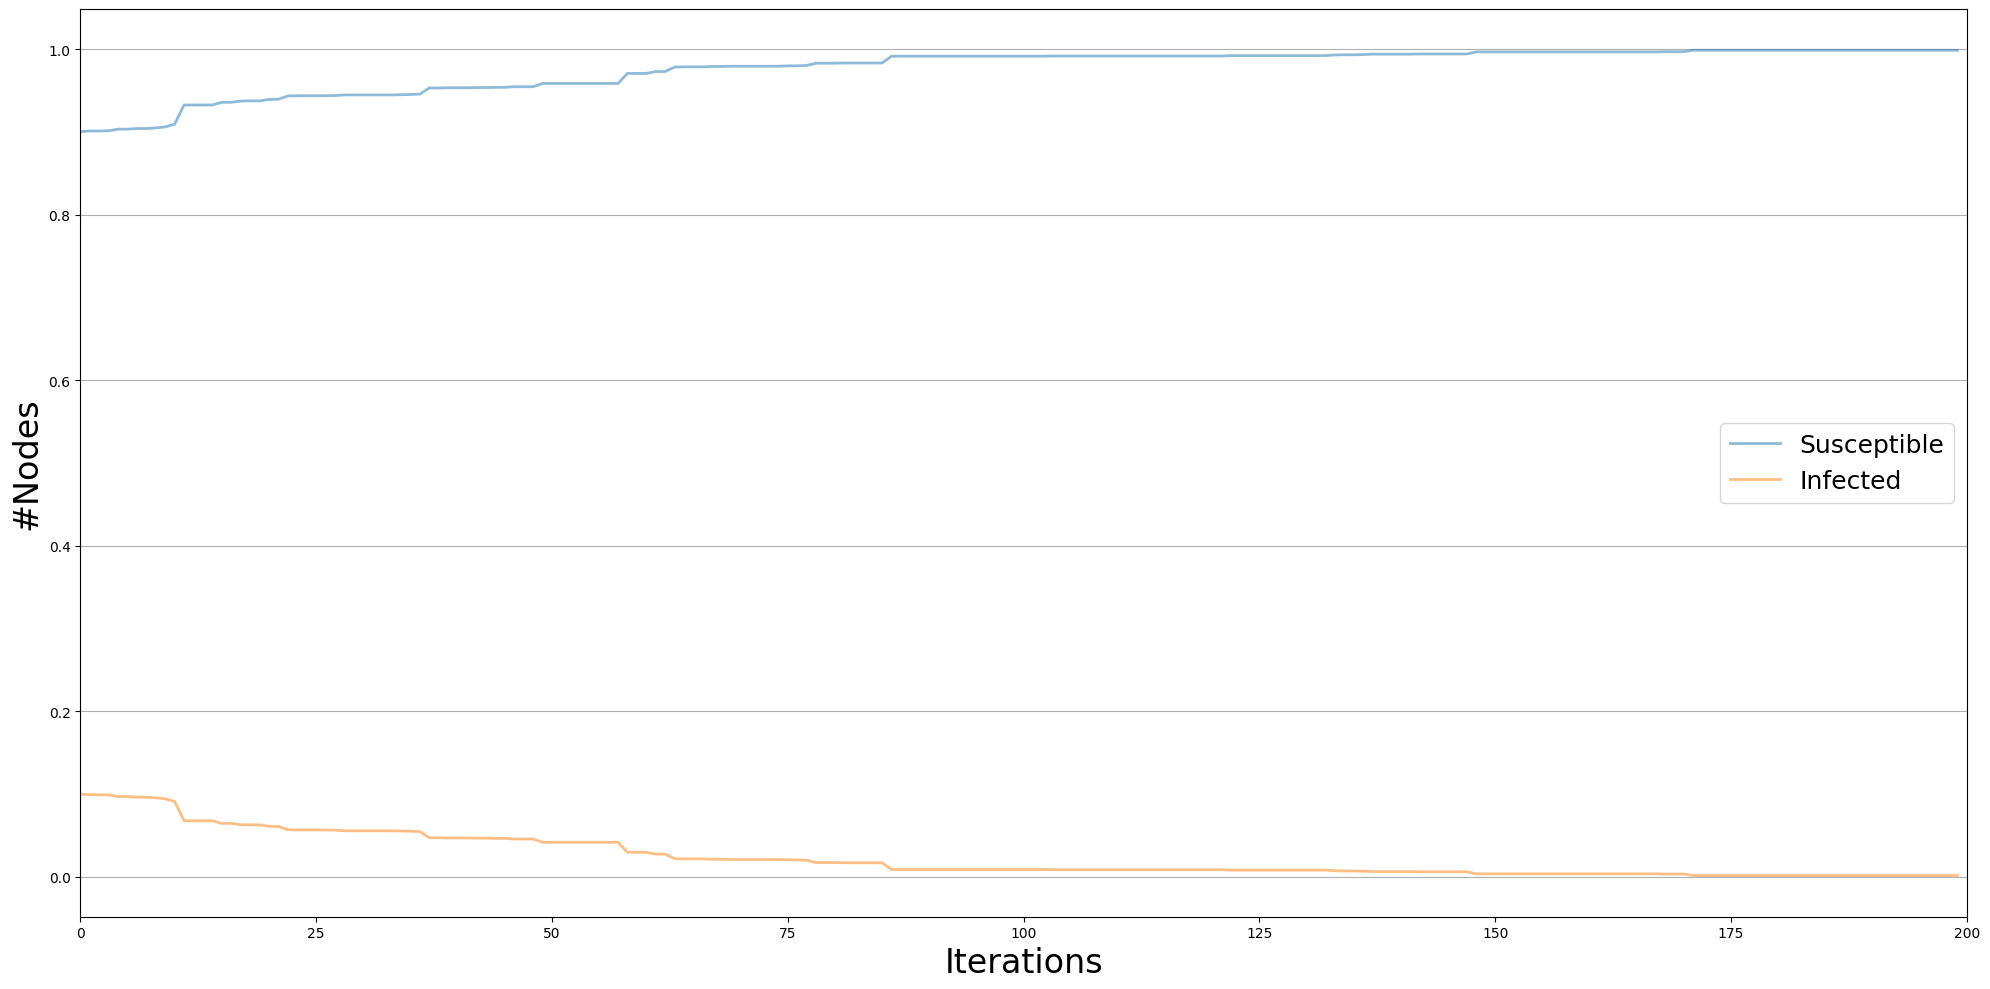

In [145]:
models = create_models('op')

for model in models:
  set_model_initial_status(model, percentage_blocked=0.4, q=10)
  iterations = model.iteration_bunch(200)
  trends = model.build_trends(iterations)

  viz = DiffusionTrend(model, trends)
  p = viz.plot()

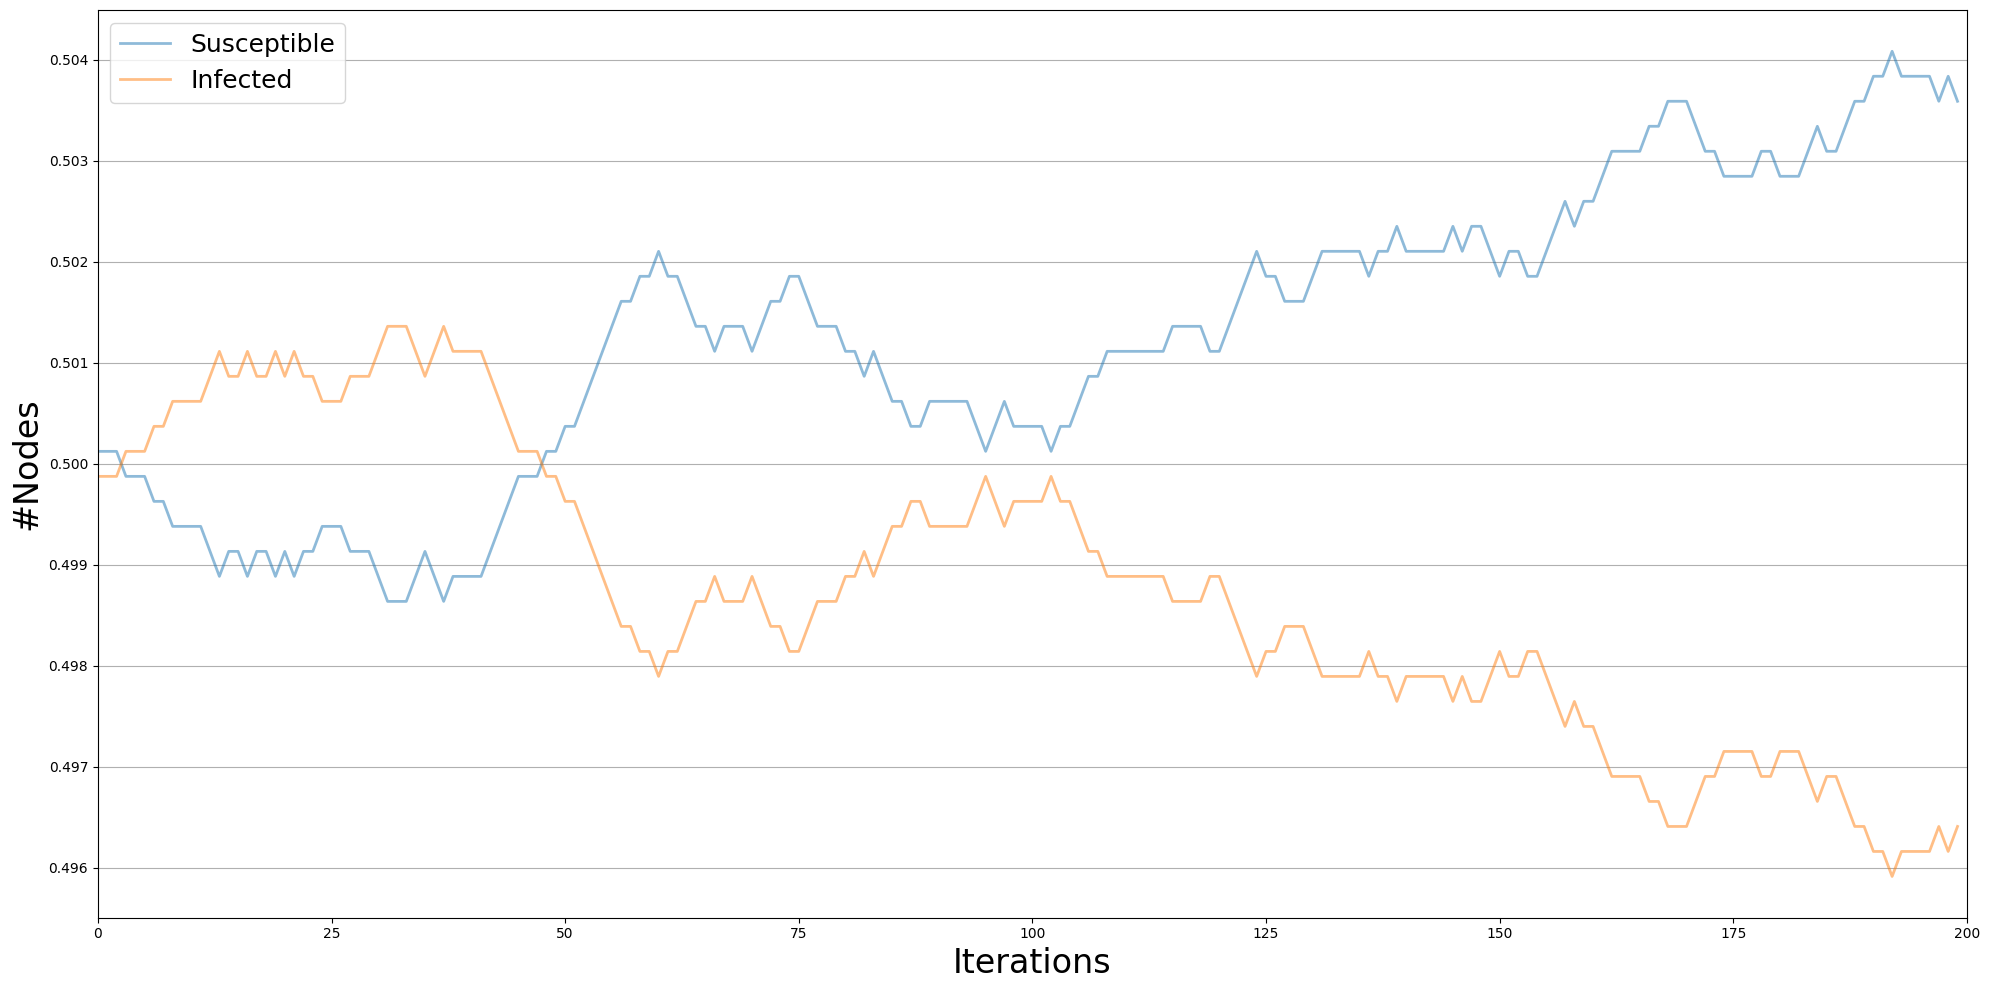

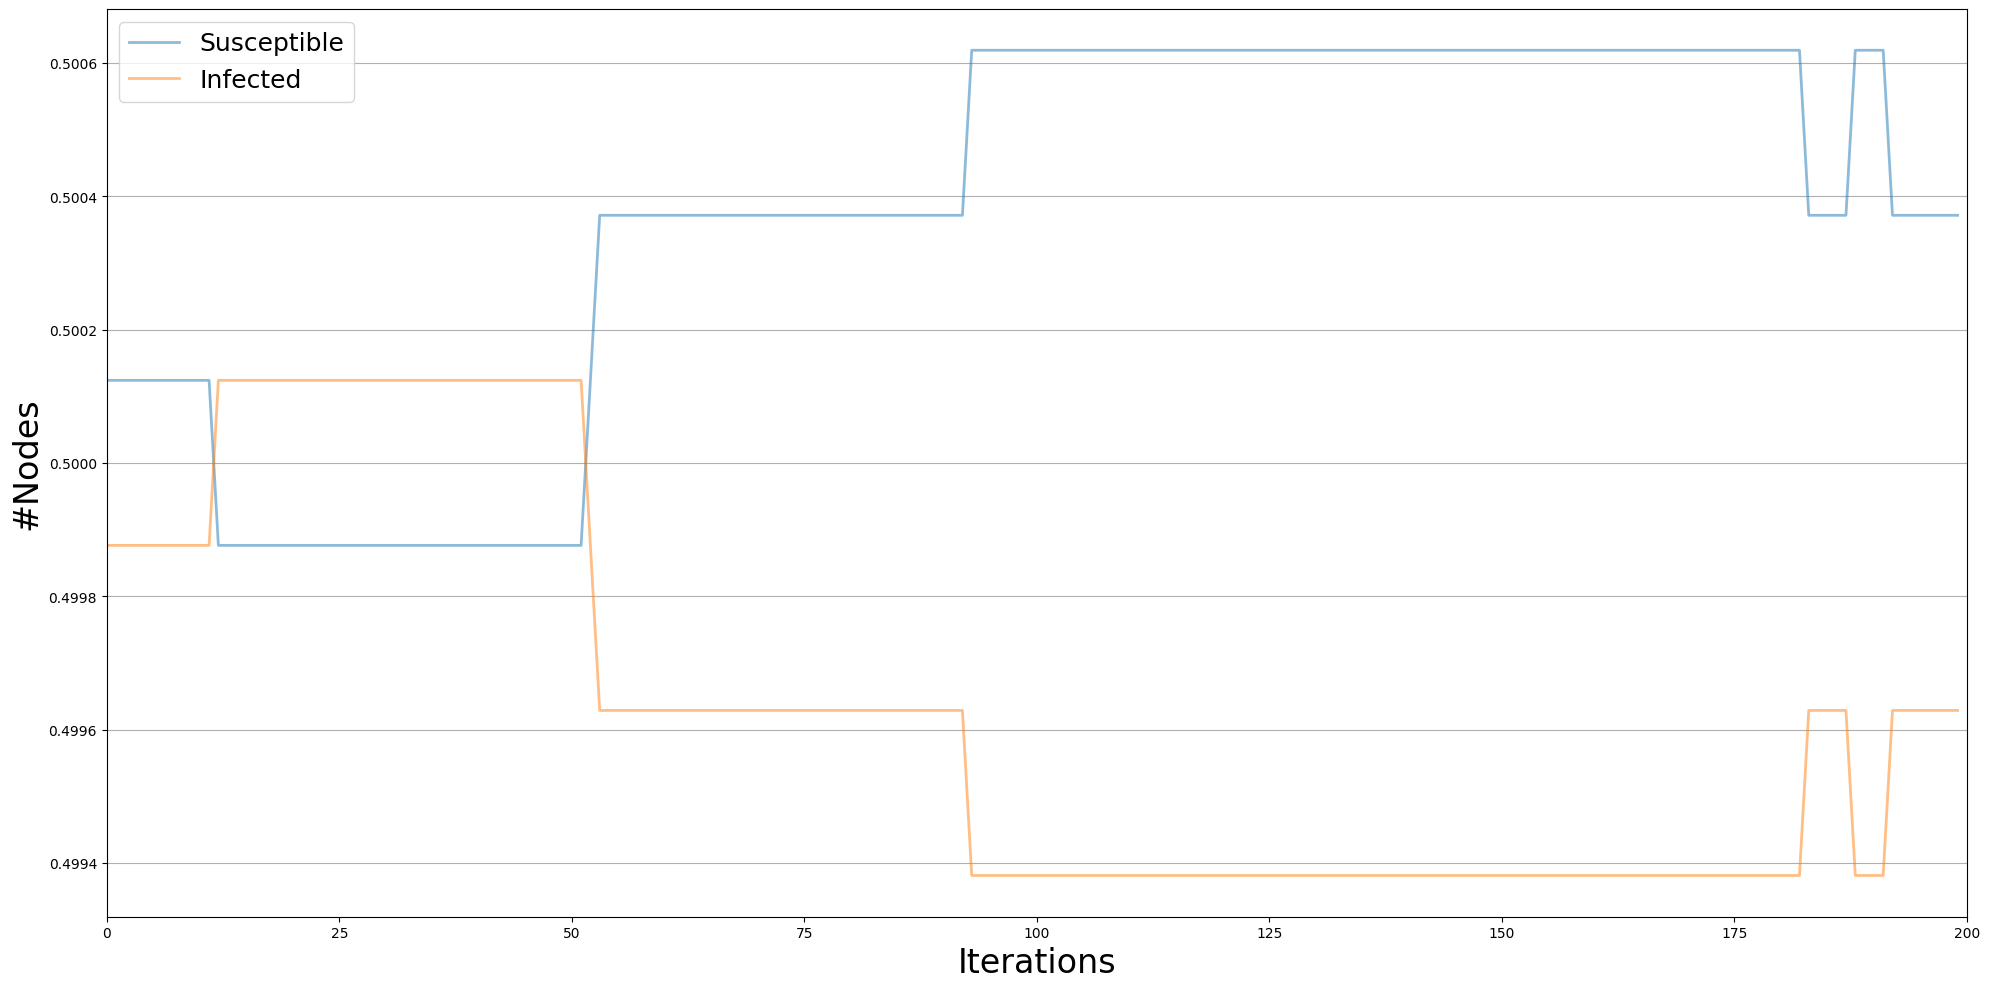

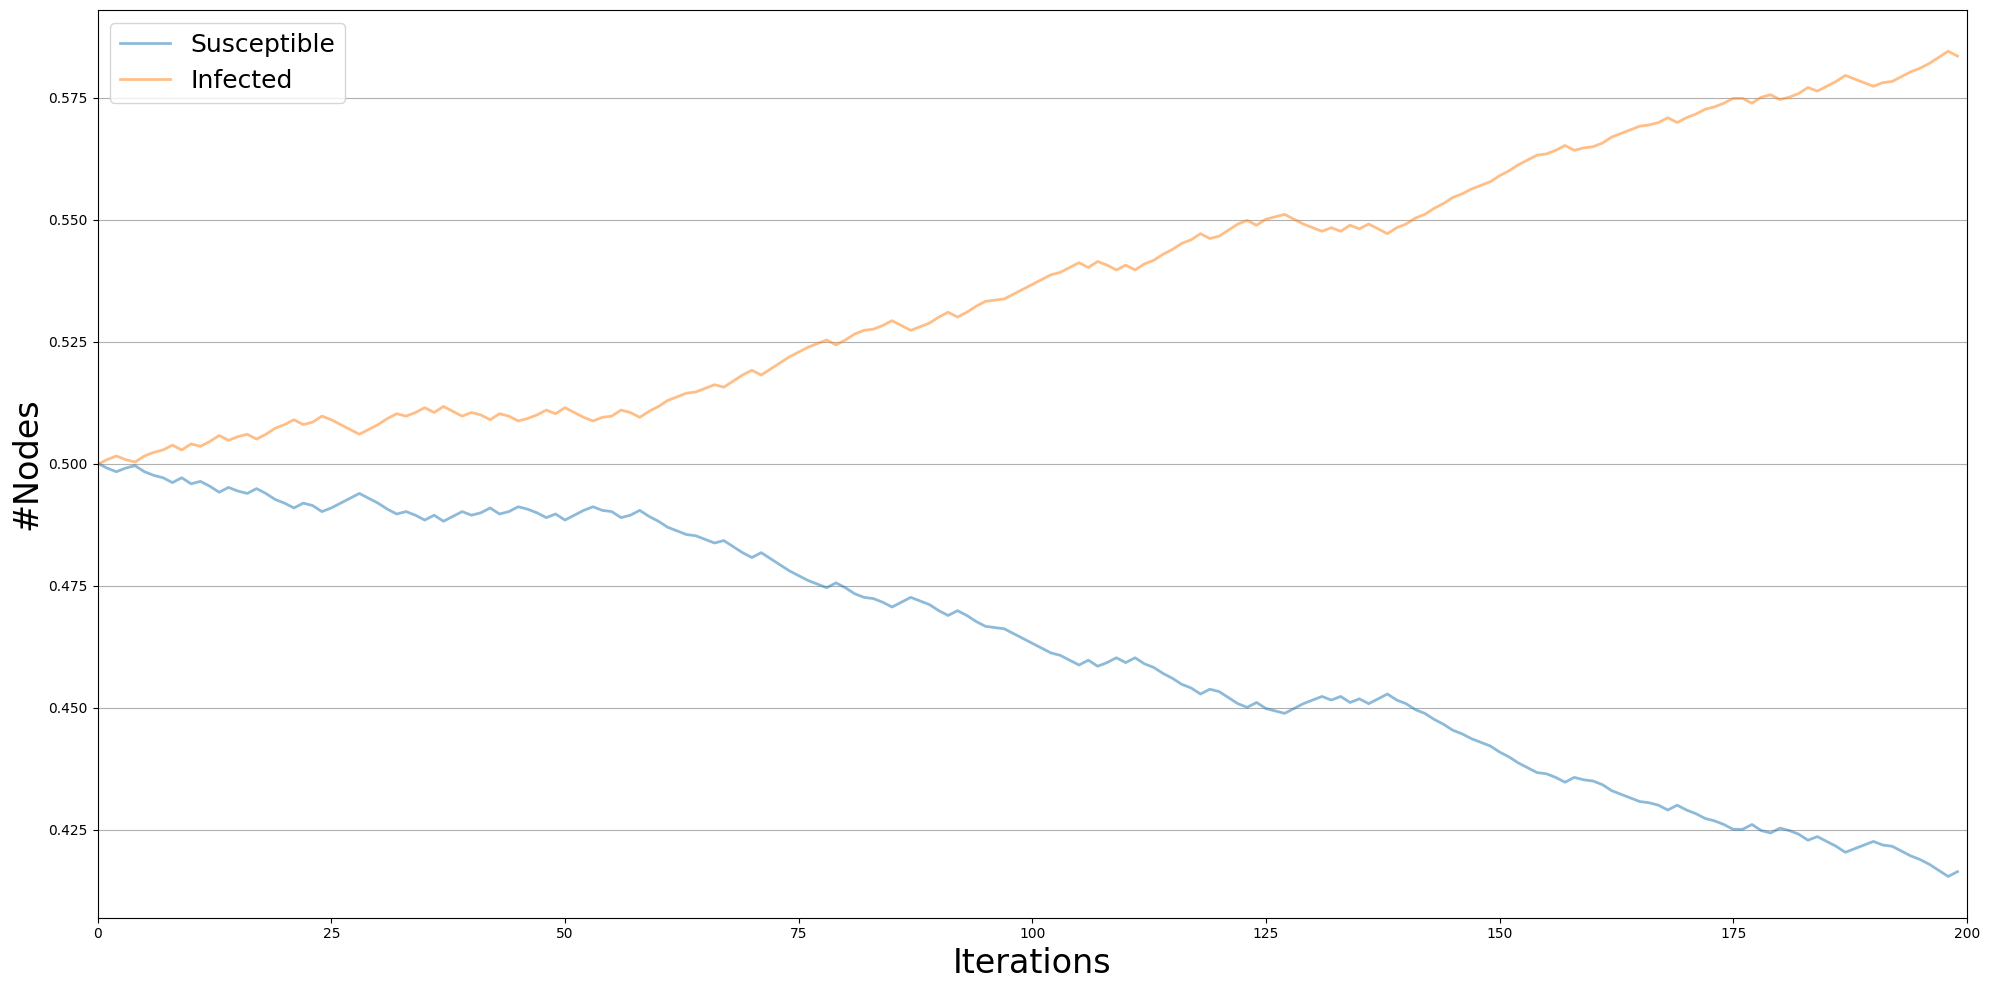

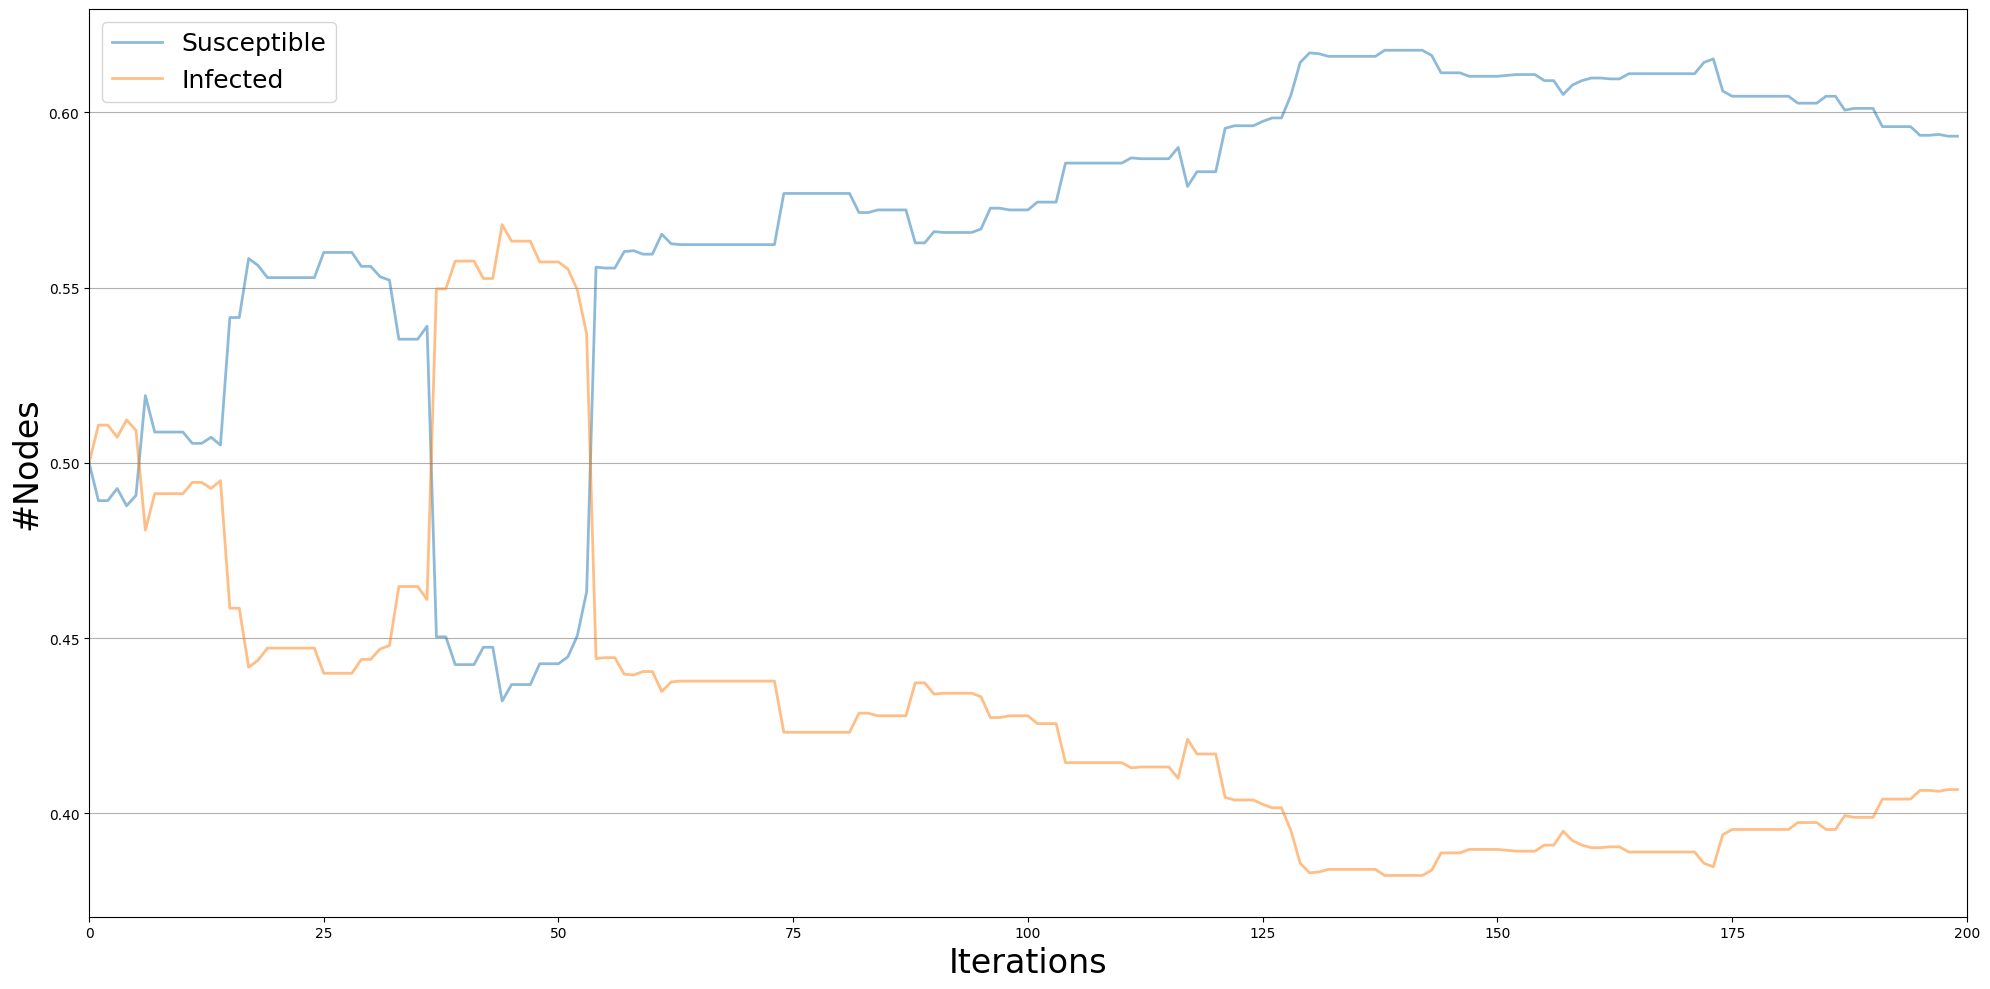

In [146]:
models = create_models('op')

for model in models:
  set_model_initial_status(model, fraction_infected=0.5, percentage_blocked=0.4, q=10)
  iterations = model.iteration_bunch(200)
  trends = model.build_trends(iterations)

  viz = DiffusionTrend(model, trends)
  p = viz.plot()

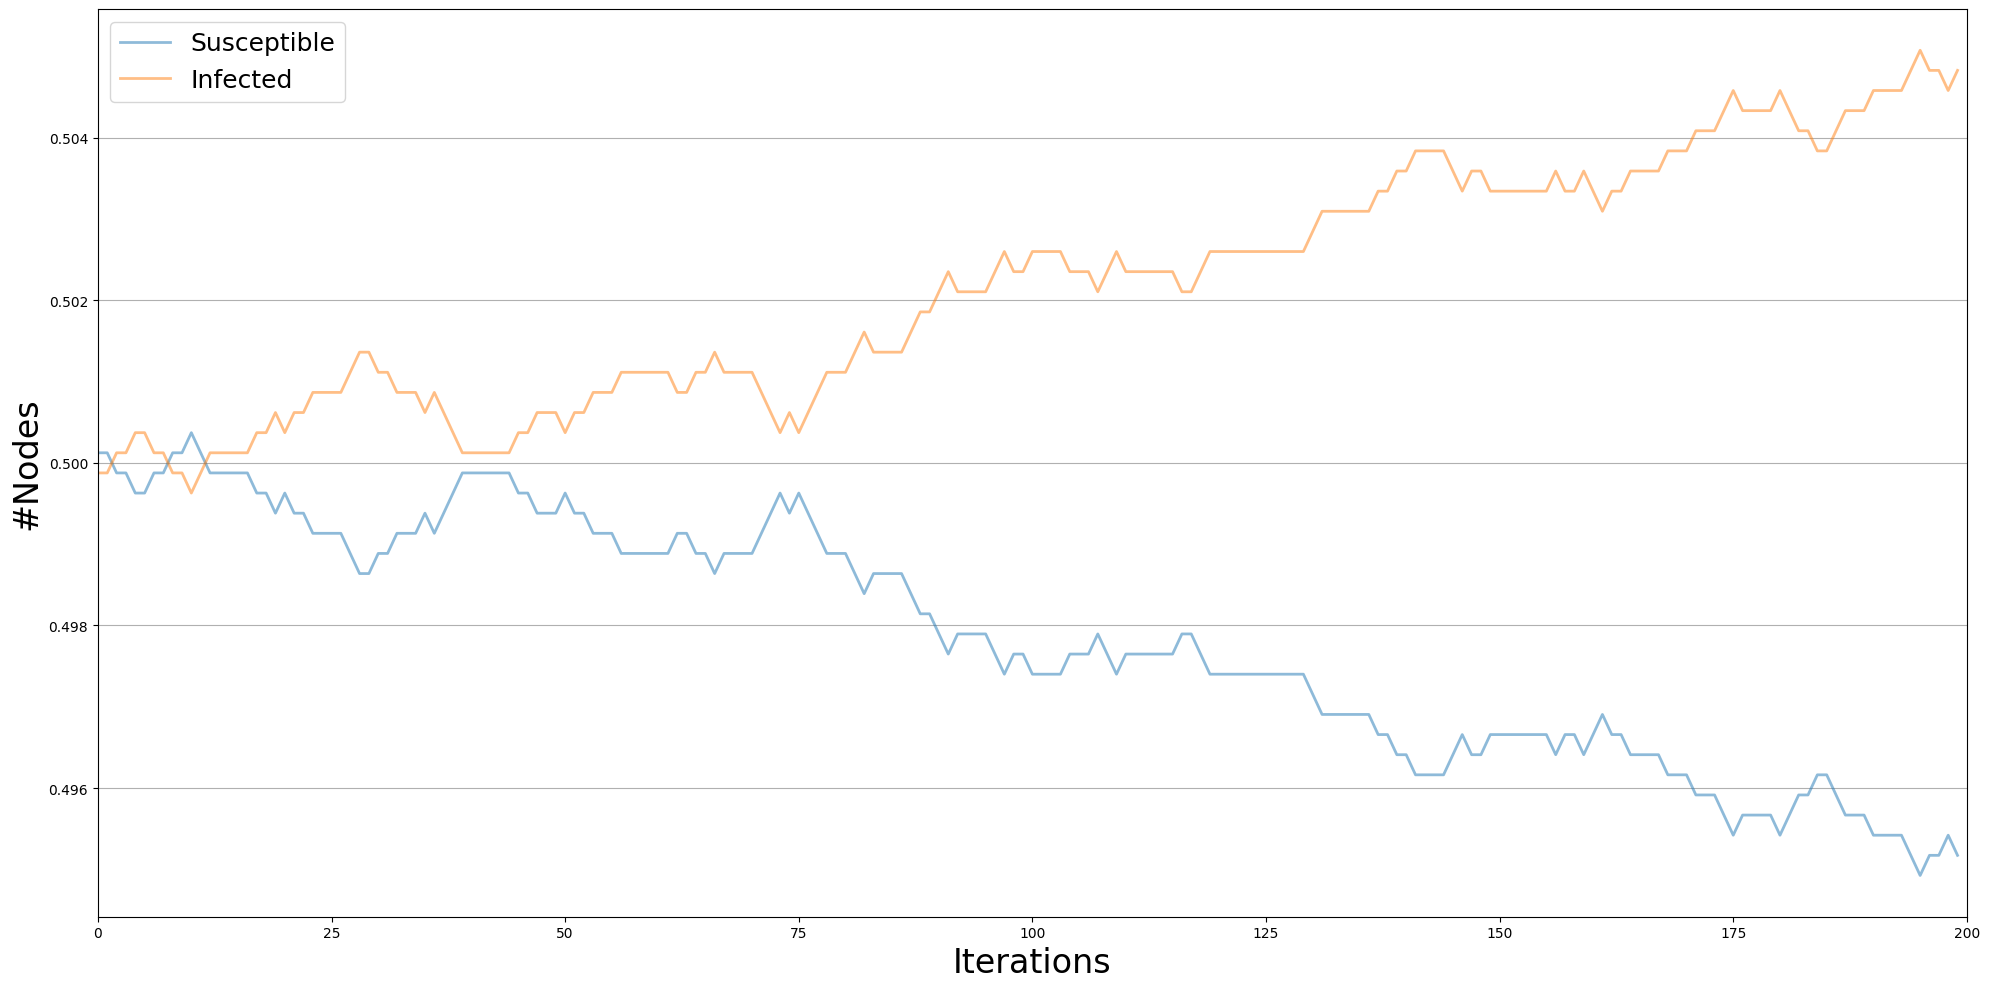

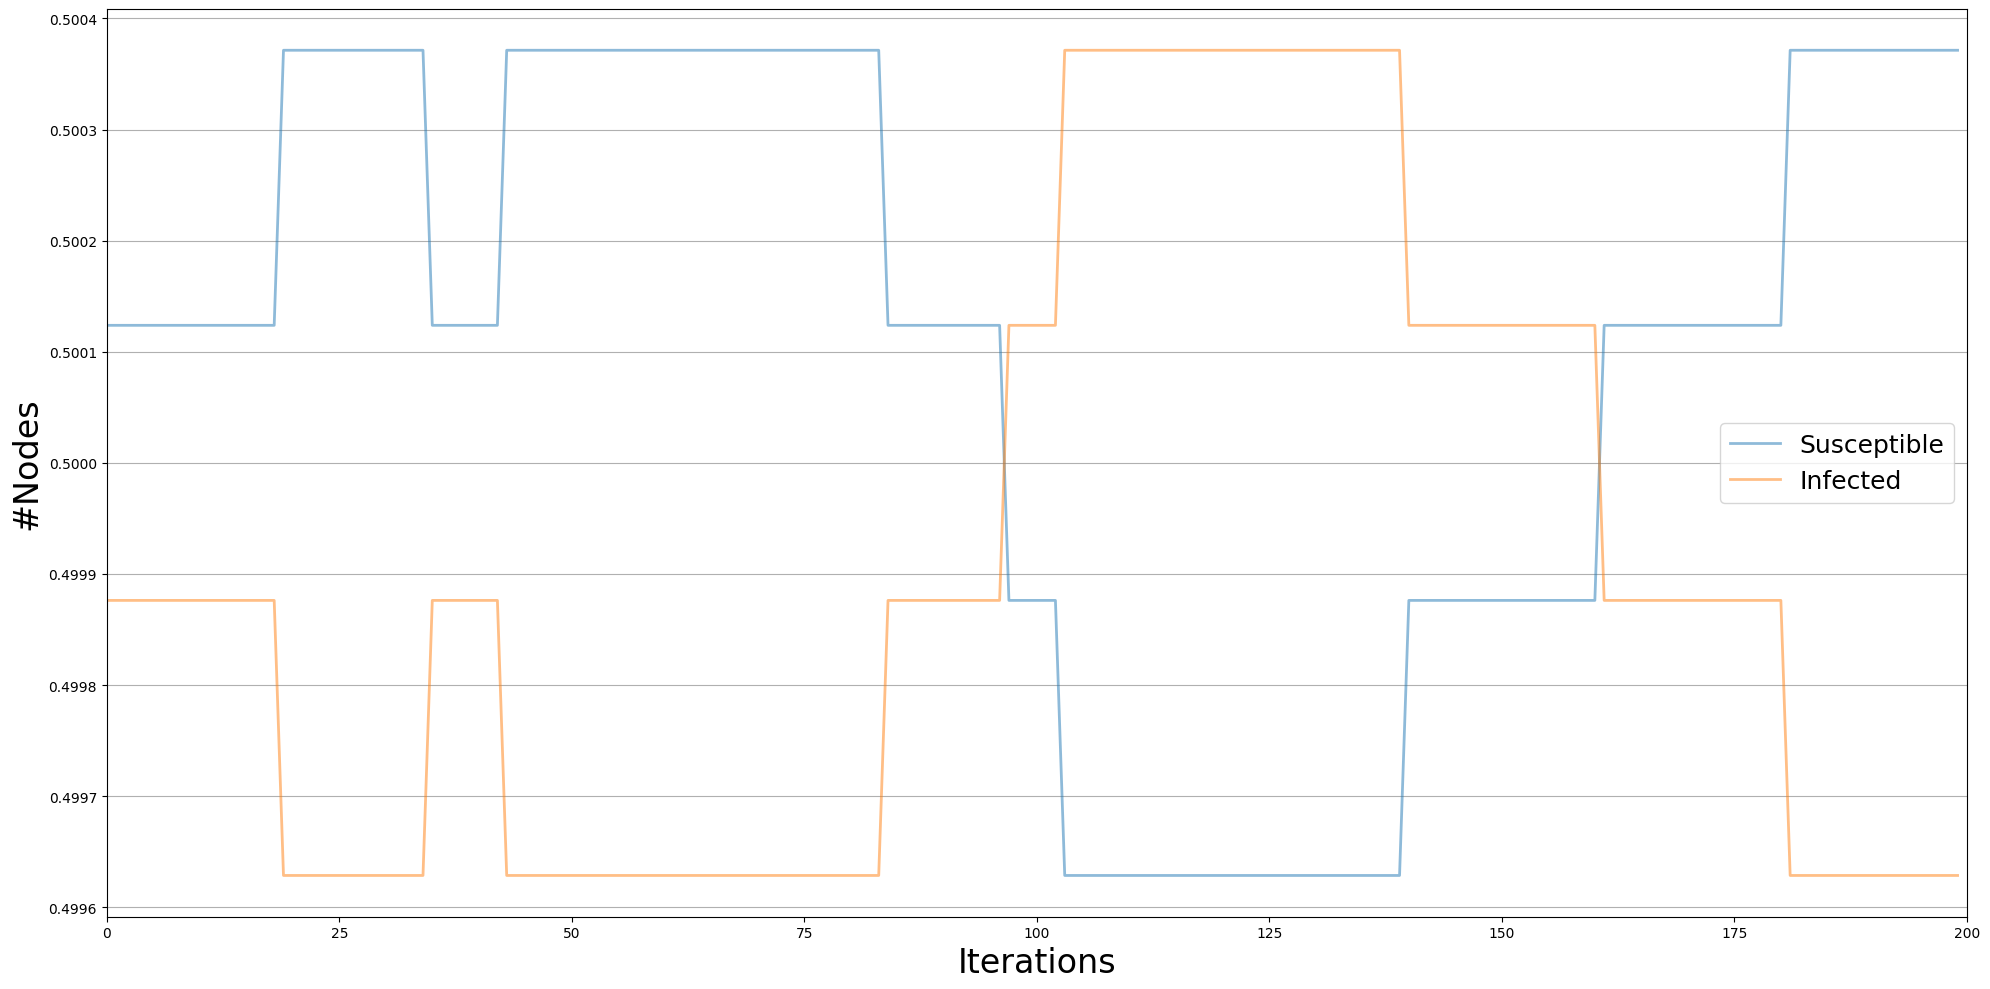

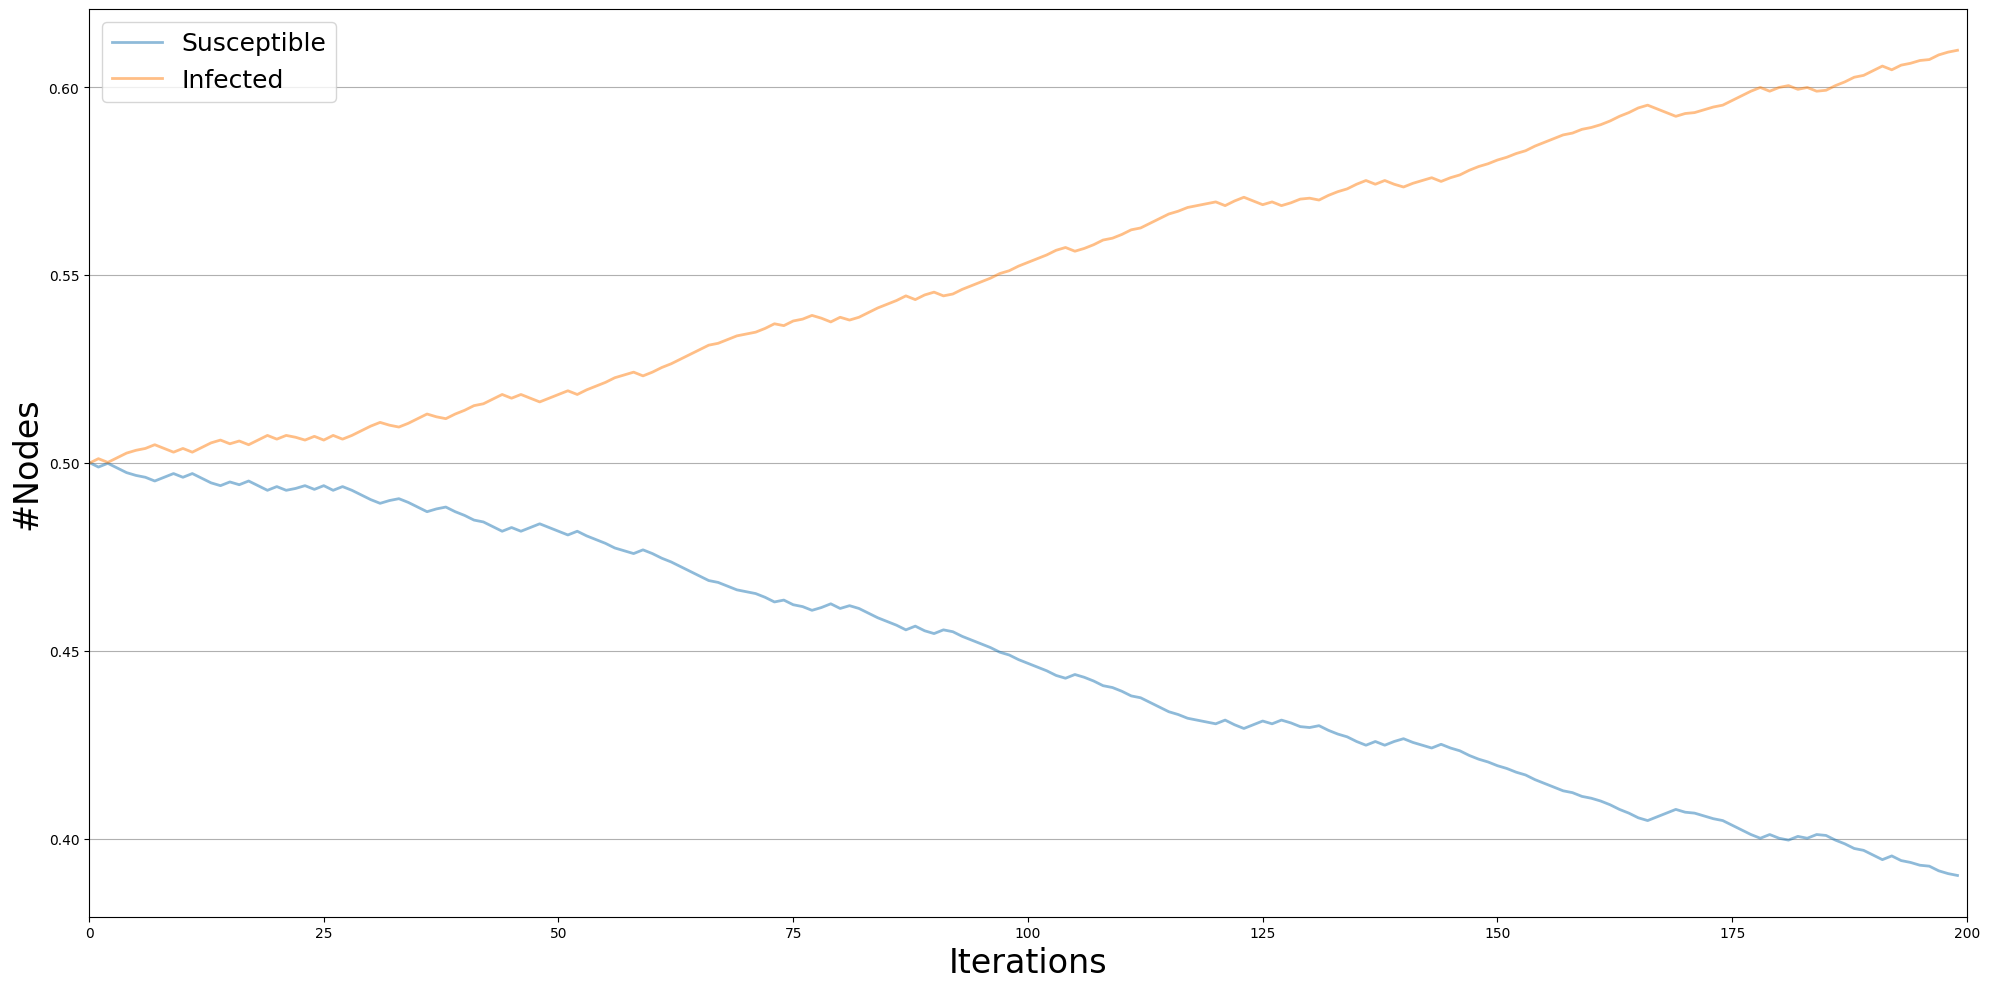

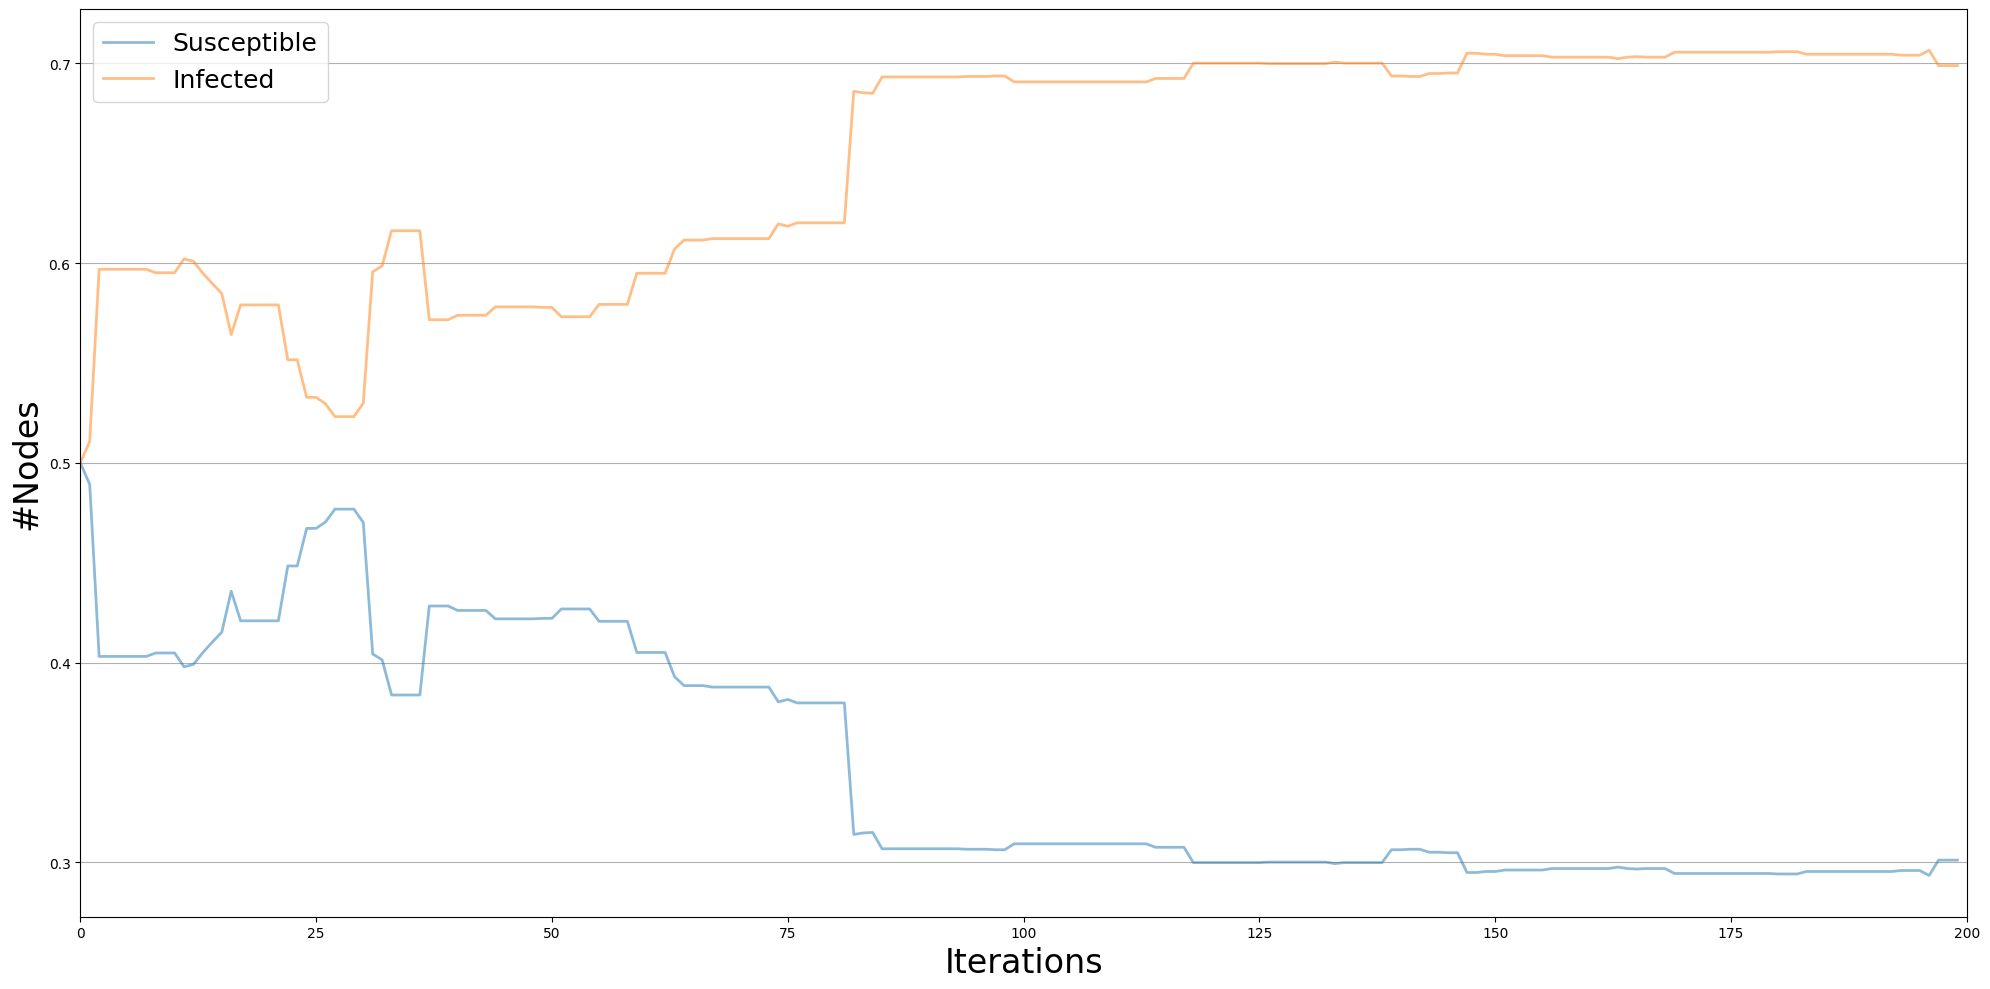

In [147]:
models = create_models('op')

for model in models:
  set_model_initial_status(model, fraction_infected=0.5, q=10)
  iterations = model.iteration_bunch(200)
  trends = model.build_trends(iterations)

  viz = DiffusionTrend(model, trends)
  p = viz.plot()

Заклучокот е сличен како и кај претходната задача. Но овојпат не сите модели успешно реализираа еквилибриум(сепак зависно од параметрите). На пример, со fraction_infected=0.5, QVoter осцилираше помеѓу двата екстреми на еквилибриумот